# Problem Statement – “Hotel Booking Cancellation Prediction”

# Objective:

##  • The objective of this project is to develop a predictive model that forecasts the likelihood of hotel booking cancellations. This    model will leverage various features related to both the booking details and customer characteristics to make accurate predictions.


##  •  By analyzing historical booking data, the model aims to identify patterns and factors that contribute to cancellations.



##  • This information can help hotel management to better understand customer behavior, optimize their booking strategies, and improve  operational efficiency.

## Dataset Link -  https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

# Assumptions


## •   Sufficient Historical Data: The historical booking data is assumed to be representative enough to generalize patterns to future bookings.

## •   Independent Observations: The observations which are made are independent of each other.


## •   Customer Behavior Stability: Customer behavior patterns are assumed to remain consistent over time, allowing past data to inform future predictions.


## •  Removal of Personally Identifying Data: All personally identifying information have been removed from the data.


## •   We have assumed that there are many overlapping values between the features distribution_channel and market_segment from the heatmap that we have plotted and so we have dropped the distribution_channel column.

## •   We have assumed that reservation_status and reservation_status_date columns are cases of data leakage as they are highly correlated with the target variable(is-cancelled) with a value of -0.91.


## •   We have assumed that the unimportant features can induce complexity in the model and also lead to lower model performance, so we have dropped these columns.

# Limitations Of the dataset


## •   The dataset is unbalanced - is_cancelled feature is unbalanced because 75166 values are not cancelled and 44224 values are cancelled.

## •   Company column has too many missing values.


# Design Decisions


## •   Data ingestion: Fetching data from Amazon S3 bucket.

## •   Libraries Used: Pandas, numpy, matplotlib, scikit-learn, seaborn.


## •   Exploratory Data Analysis: Sweet Viz Profiling, Y-data Profiling, Correlation of features with the Target variable, Pair-plot , Analysis of the features.

## •   Data Preprocessing: Separating numerical and categorical features, Encoding Categorical features- Label Encoder, Handling of missing values, Feature Selection.


## •   Model Selection: Logistic Regression, Random Forest, XGBoost Classifier, Neural Networks(ANN).

## •   Deployment: AWS Sagemaker - It is a fully managed service that provides tools to build,train and deploy ML models at a scale. It simplifies the process of developing ML models by handling infrastructure, making it easier to focus on model deployment.











# Installing required modules and libraries

In [ ]:
!pip install scipy>=1.9.0
!pip install scikit-learn==1.5.1

In [ ]:
pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 80.5 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.0
    Uninstalling numpy-2.1.0:
      Successfully uninstalled numpy-2.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mkl-fft 1.3.10 requires mkl, which is not installed.
hdijupyterutils 0.21.0 requires pandas<2.0.0,>=0.17.1, but you have pandas 2.2.2 which is incompatible.
sparkmagic 0.21.0 requires pandas<2.0.0,>=0.17.1, but you have pandas 2.2.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import scipy
import sklearn
print(scipy.__version__)
print(sklearn.__version__)

1.14.0
1.5.1


In [ ]:
import numpy
import scipy
print(numpy.__version__)
print(scipy.__version__)

1.23.5
1.14.0


In [ ]:
pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 109.2 MB/s eta 0:00:0000:010:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 92.3 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 99.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 61.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 49.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 103.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 113.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 19.1 MB/s eta 0:00:00
Note: you




# Importing All the Required libraries

In [ ]:
import os
import pandas as pd
#from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
import sagemaker
import boto3 #can read our s3 bucket from local env if it is public
from sagemaker.amazon.amazon_estimator import get_image_uri
from sagemaker.session import s3_input, Session
from sagemaker import get_execution_role
from sagemaker.inputs import TrainingInput
from sagemaker.estimator import Estimator

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


## S3 setup

In [ ]:
my_region = boto3.session.Session().region_name
print(my_region)

ap-south-1


In [ ]:
from botocore.exceptions import ClientError

bucket_name = 'hotel-cancellation-prediction'
region = 'ap-south-1'

s3 = boto3.client('s3', region_name=region)

try:
    s3.create_bucket(
        Bucket=bucket_name,
        CreateBucketConfiguration={
            'LocationConstraint': region
        }
    )
    print('S3 bucket created successfully')
except ClientError as e:
    print('Something went wrong:', e)


Something went wrong: An error occurred (BucketAlreadyOwnedByYou) when calling the CreateBucket operation: Your previous request to create the named bucket succeeded and you already own it.


# Fetching data through amazon s3 bucket

**Getting the data stored in the amazon s3 bucket.**





In [ ]:
s3_client = boto3.client('s3')
s3_client.download_file('hotel-cancellation-prediction', 'original_dataset/hotel_bookings.csv', 'working_dataset.csv')

In [ ]:
import pandas as pd
df = pd.read_csv('working_dataset.csv')
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

# Y-data profiling
**YData Profiling is an open-source tool (formerly known as Pandas Profiling) that automates data profiling in Python.It helps to explore and understand the dataset before proceeding with any machine learning tasks. Typically, used to generate a report on the dataset, which would help to identify any issues or patterns before splitting the data, building models, or performing any other operations.**

In [ ]:
profile = ProfileReport(df, title="Hotel Booking Dataset Profiling Report", explorative=True)

profile.to_notebook_iframe()

profile.to_file("hotel_booking_profiling_report.html")

NameError: name 'ProfileReport' is not defined

**Through report we can see that children has 4, Country has 488, Agent has 16340 and company has 112593 missing values.**

**booking_changes and total_no_special_request has too many zeros.**

**is_cancelled feature is unbalanced- 75166 values are not cancelled and 44224 values are cancelled.**

## Sweetviz Profiling

**Sweetviz is a Python library used for data exploration and visualization. It generates a comprehensive, interactive HTML report that helps users understand their data by providing visualizations, summary statistics, and comparisons.**


In [ ]:
import sweetviz as sv
report = sv.analyze(df, pairwise_analysis='on',
                    target_feat='is_canceled',
                    #target_comb="all",
                    #timefeat="reservation_status_date",
                    #target_pairs=True
                    )

# Show the report
report.show_html("hotel_bookings_report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report hotel_bookings_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



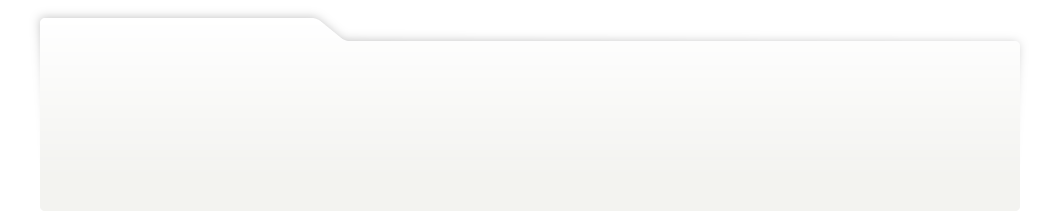
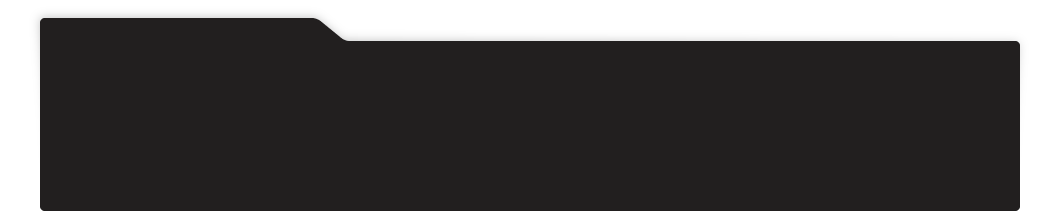
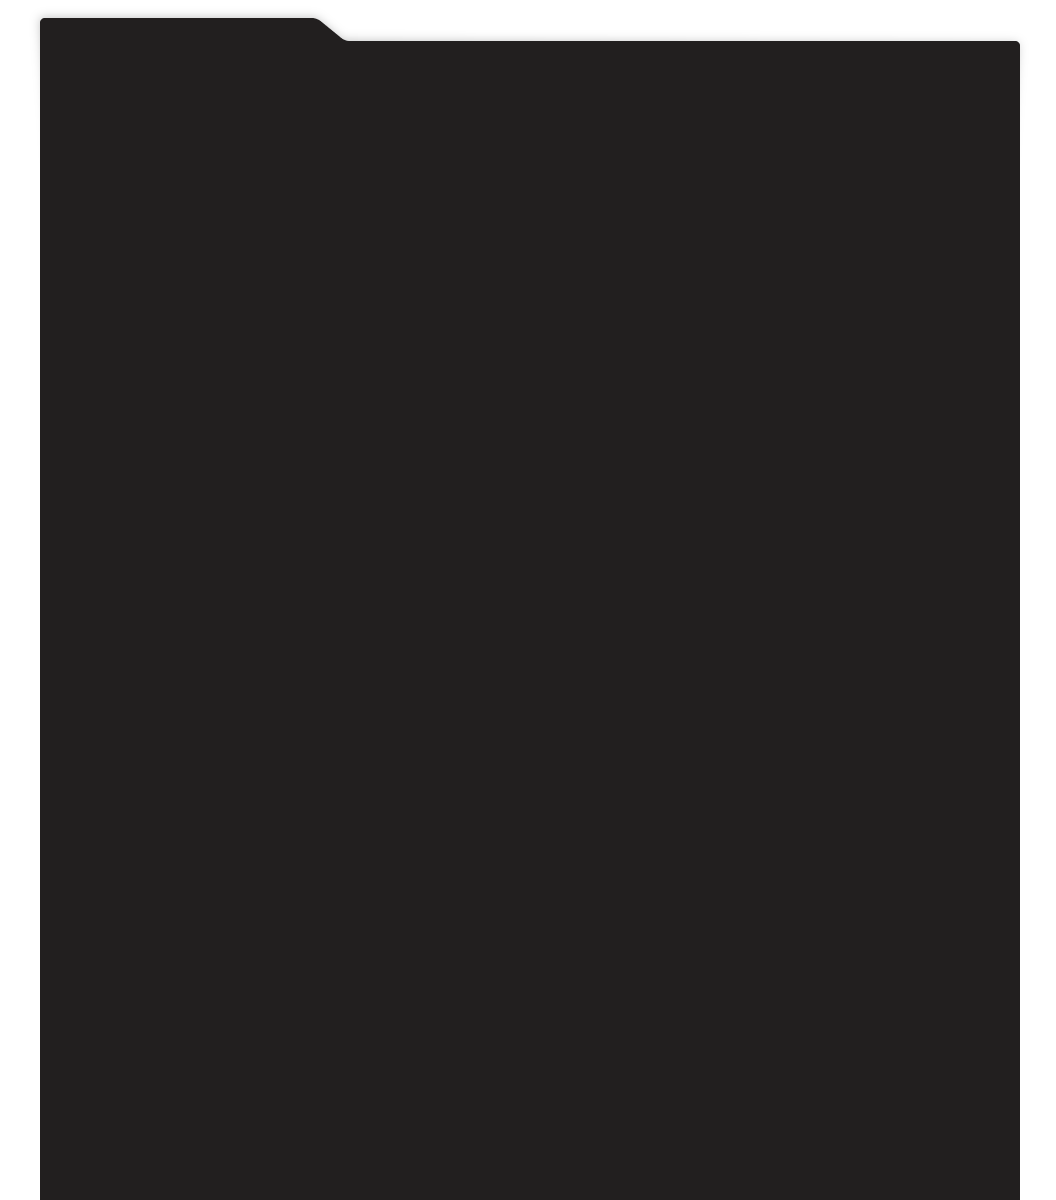
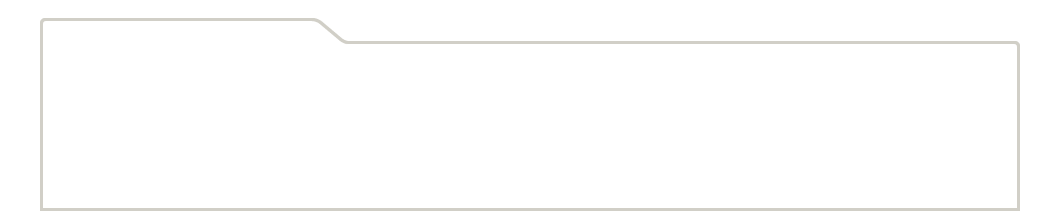
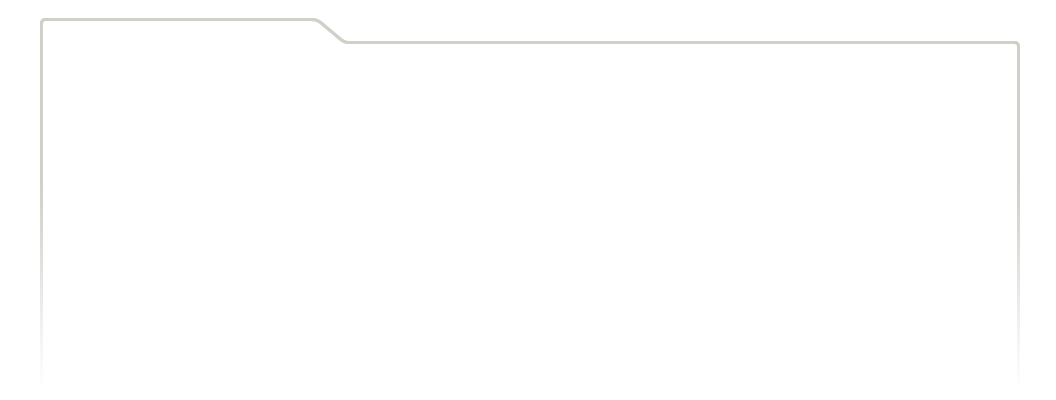
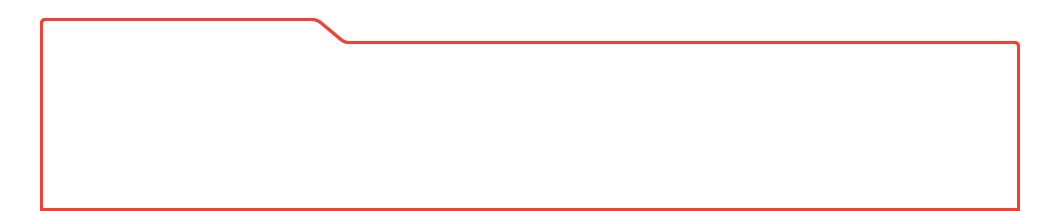
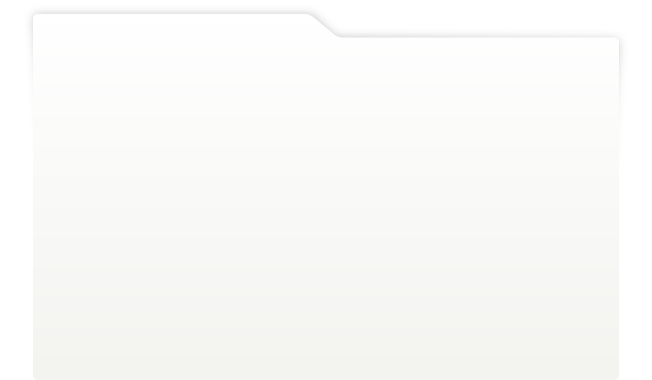
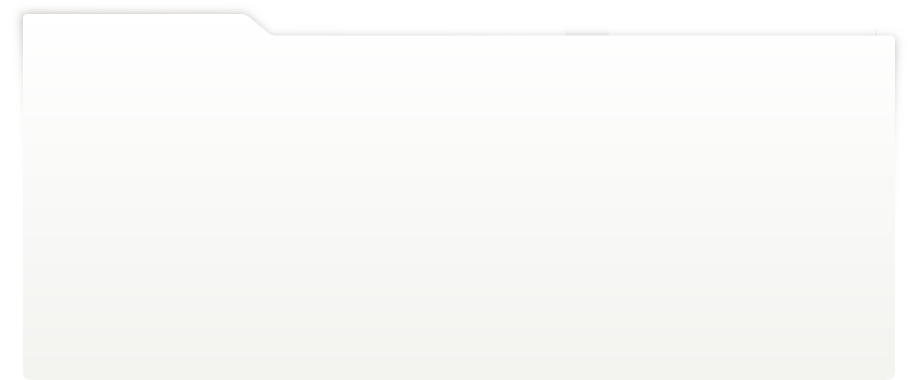
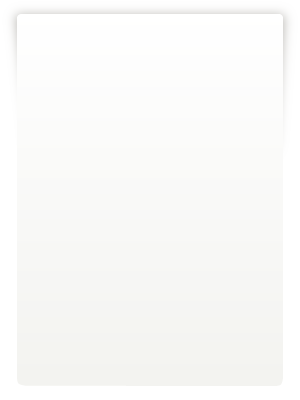
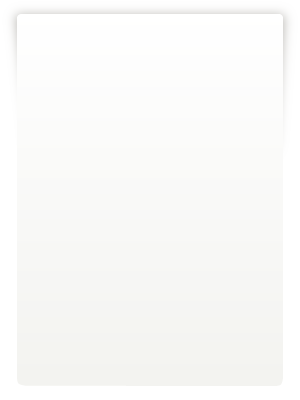
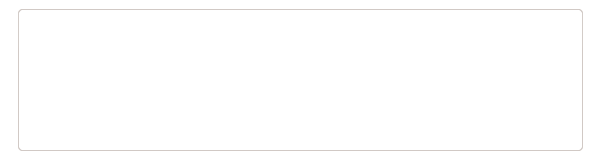
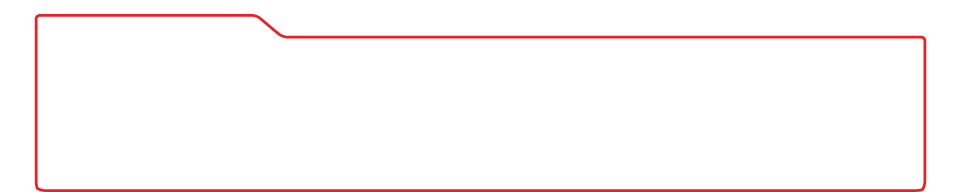
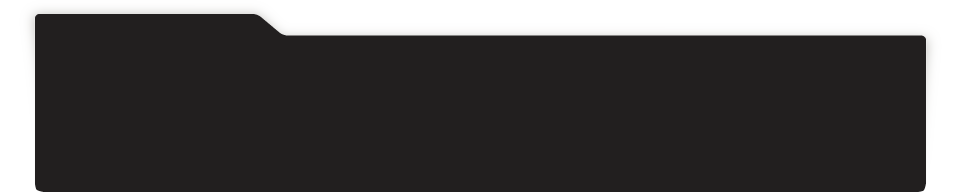
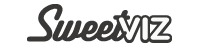
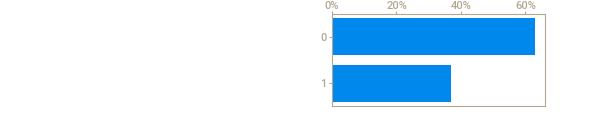
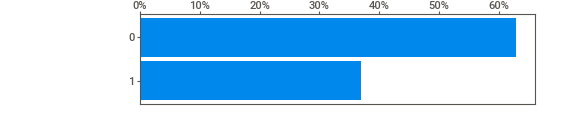
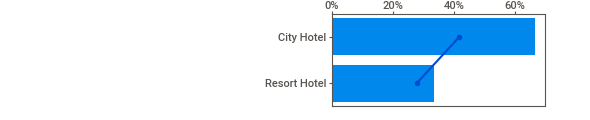
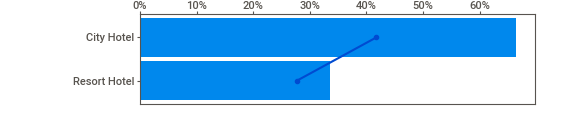
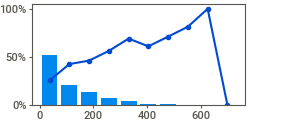
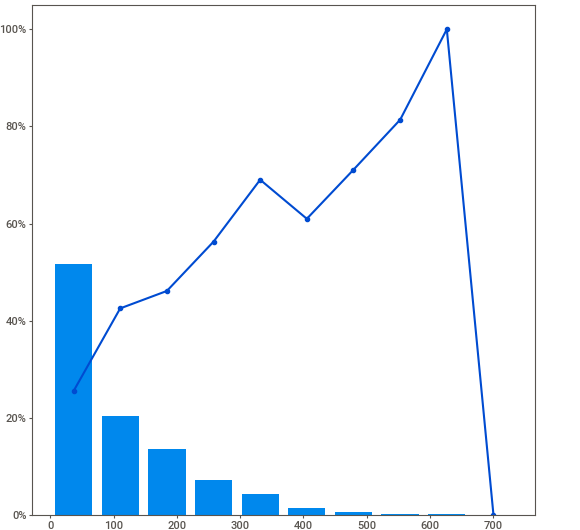
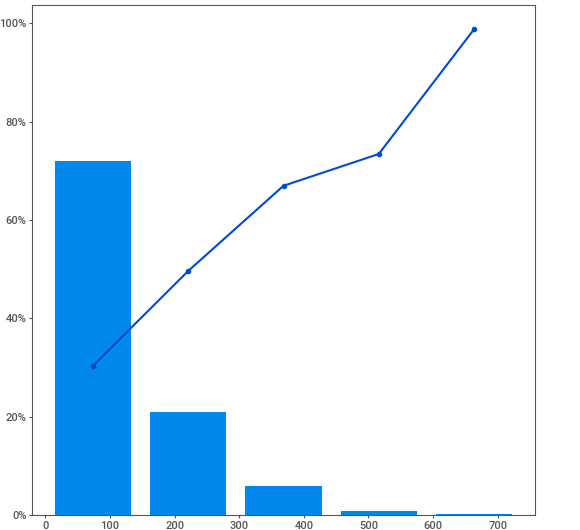
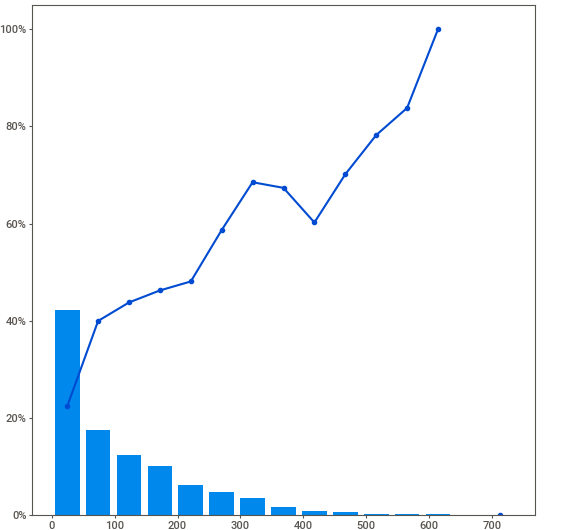
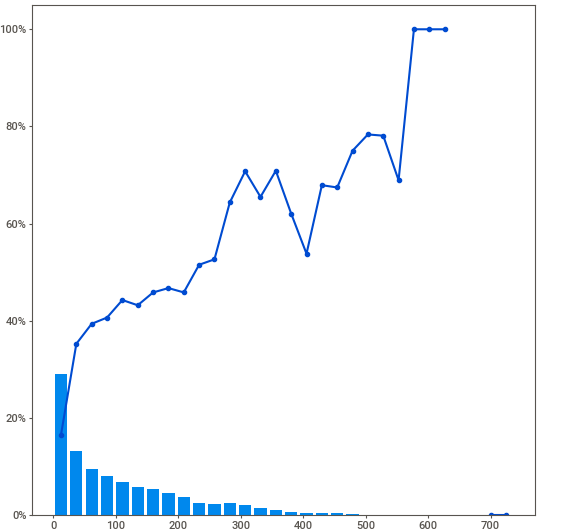
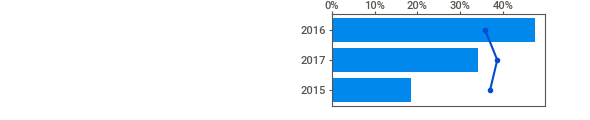
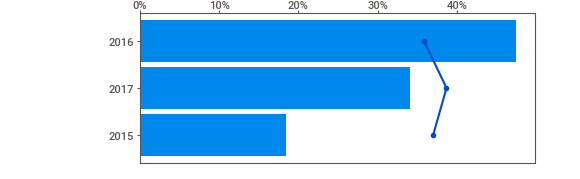
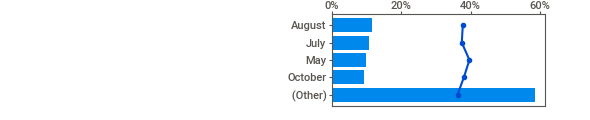
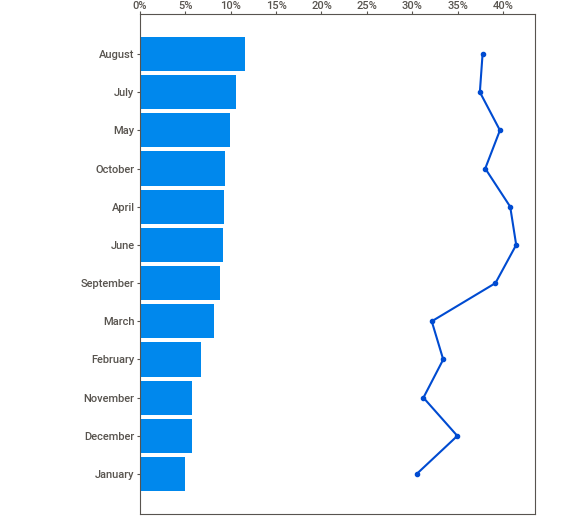
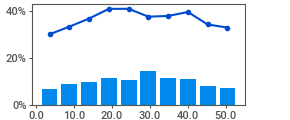
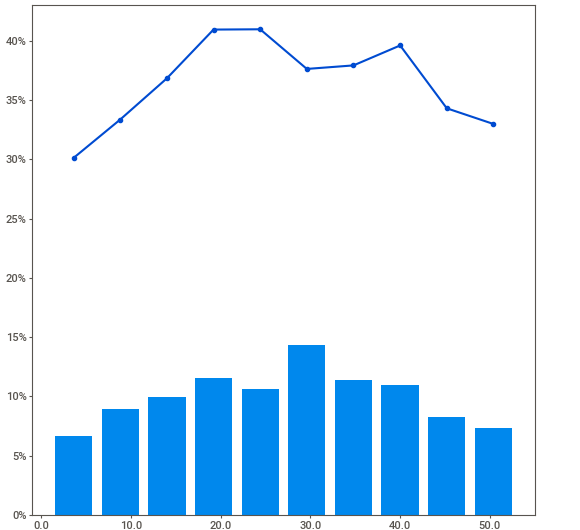
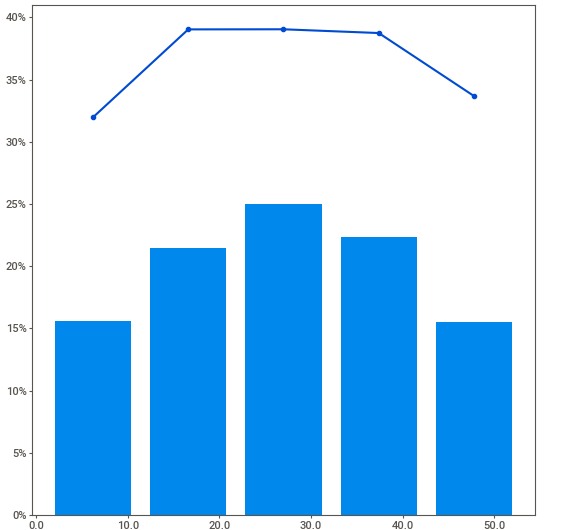
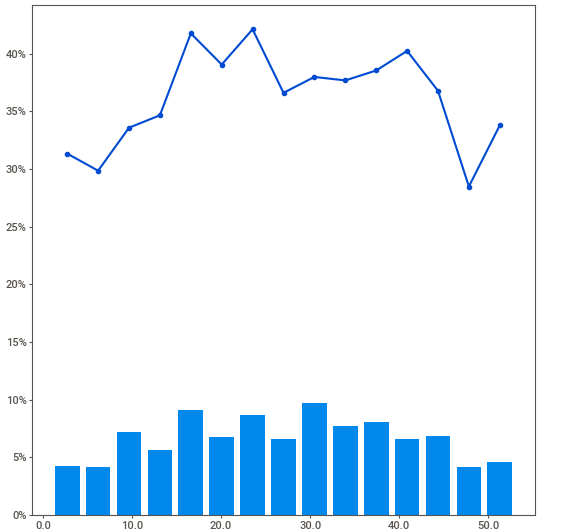
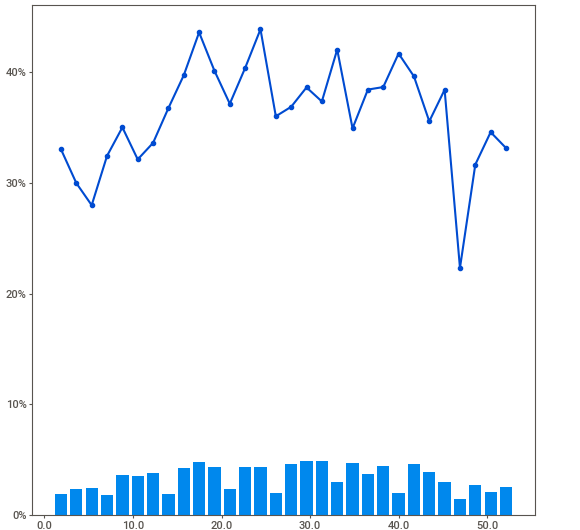
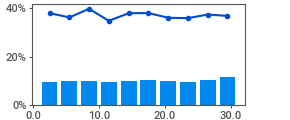
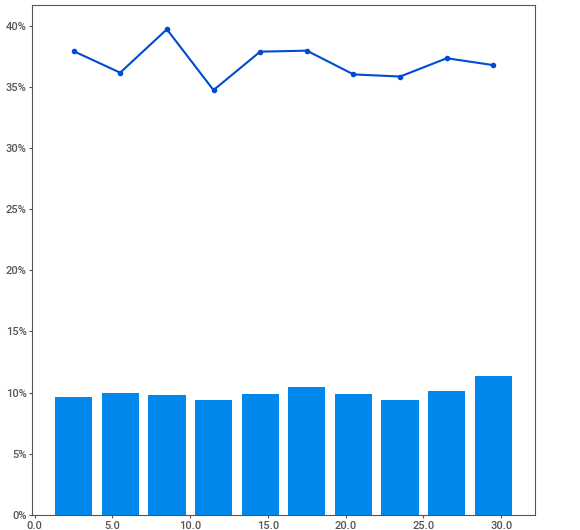
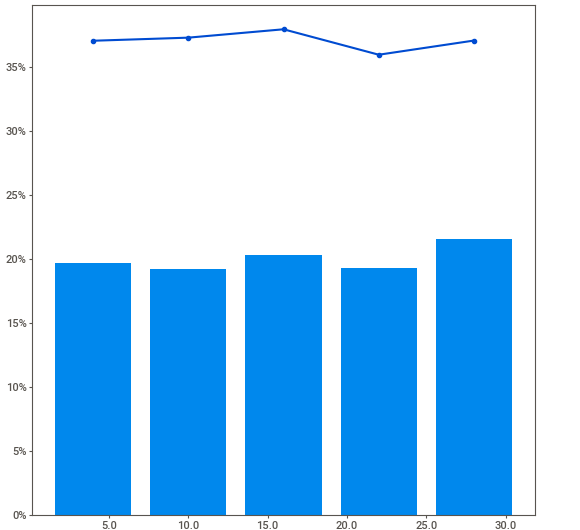
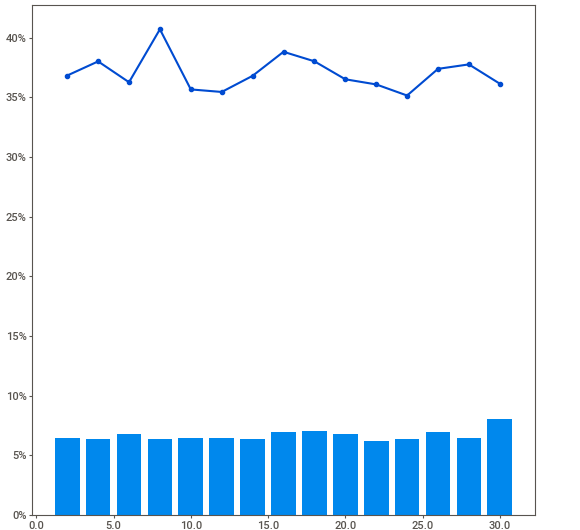
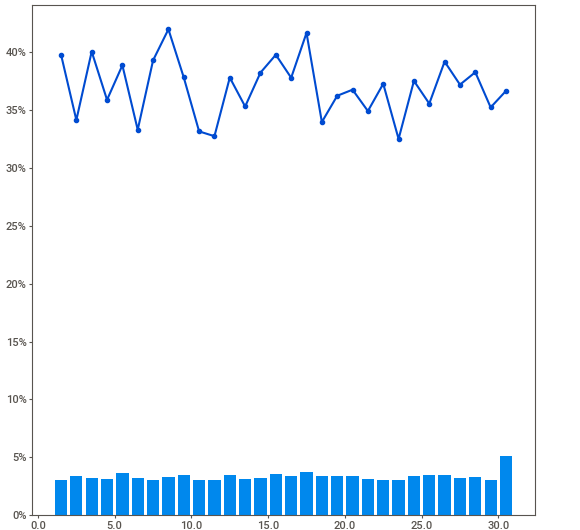
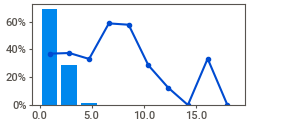
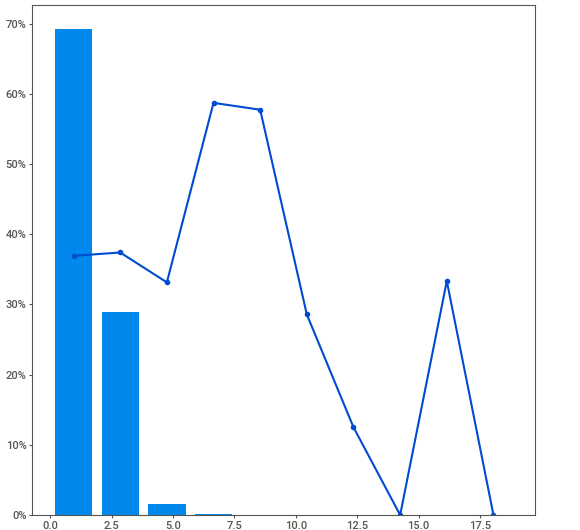
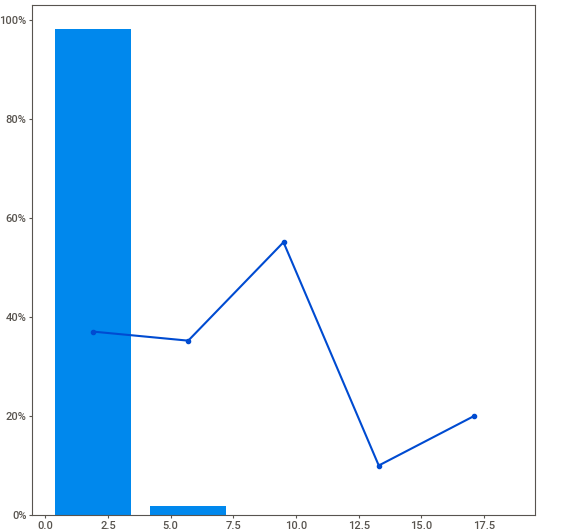
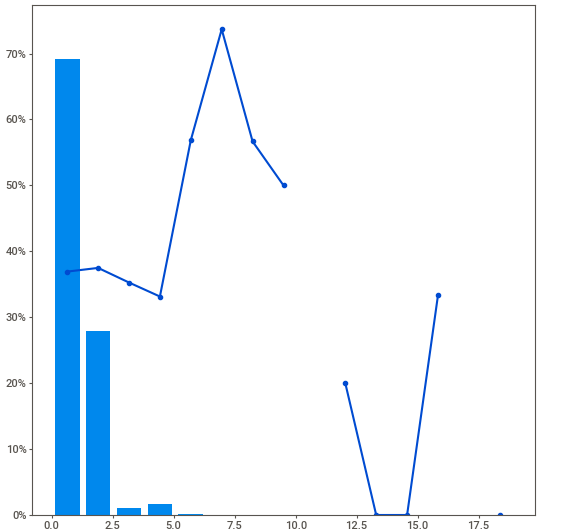
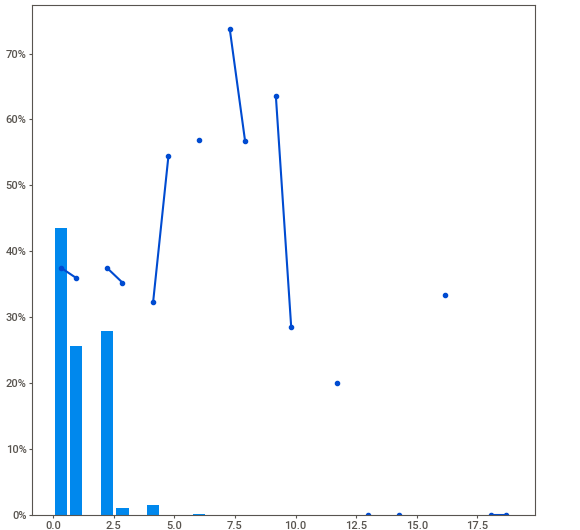
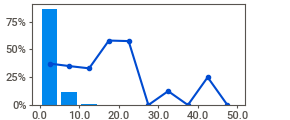
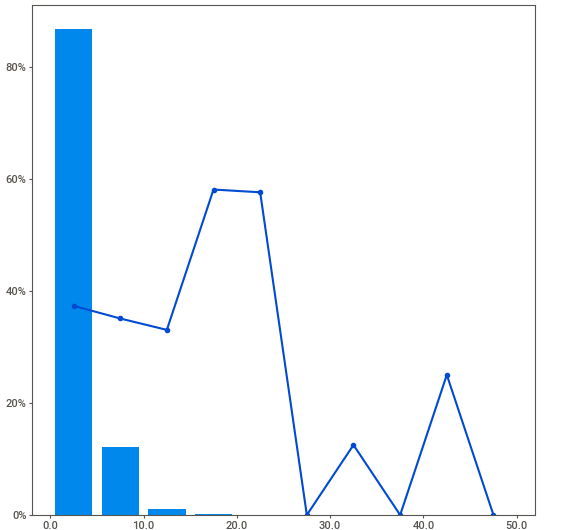
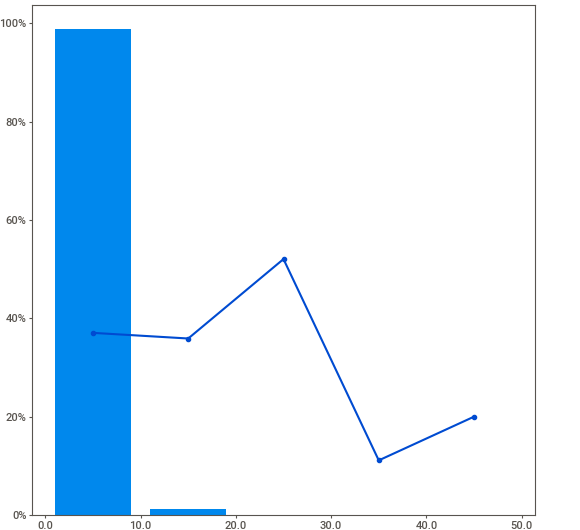
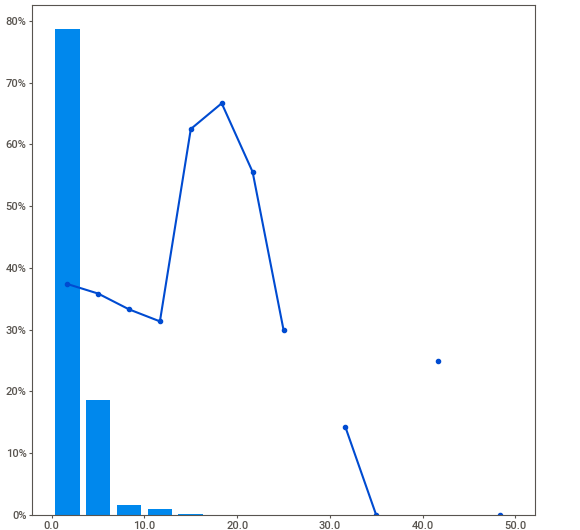
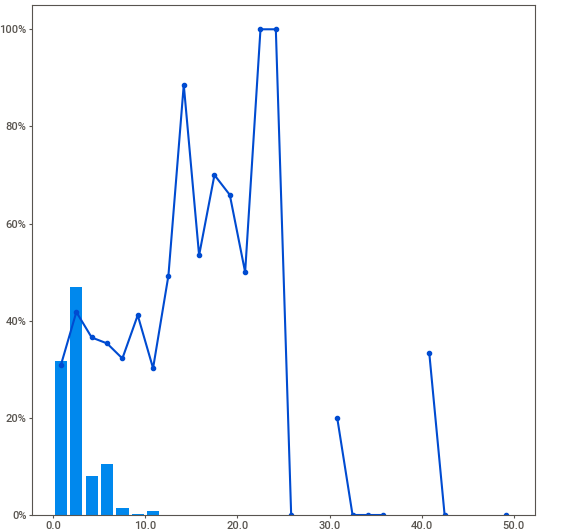
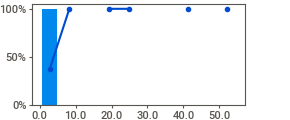
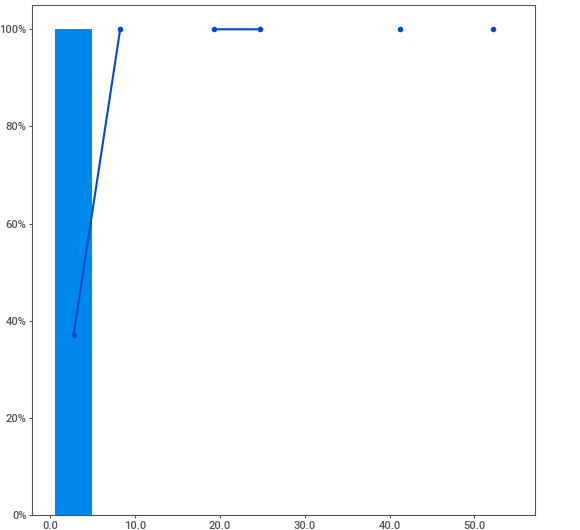
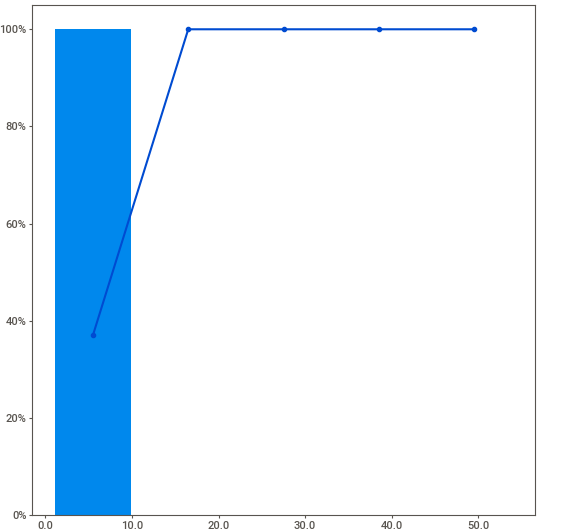
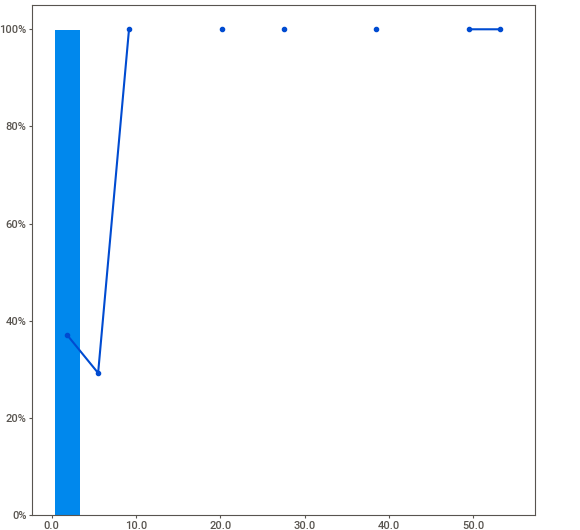
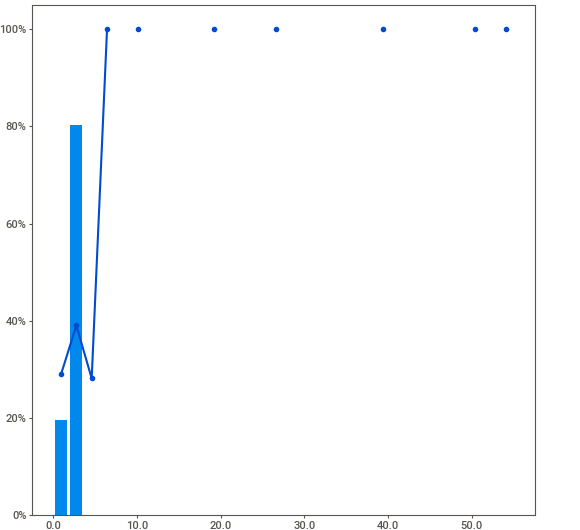
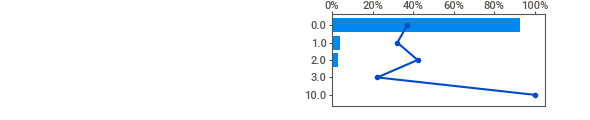
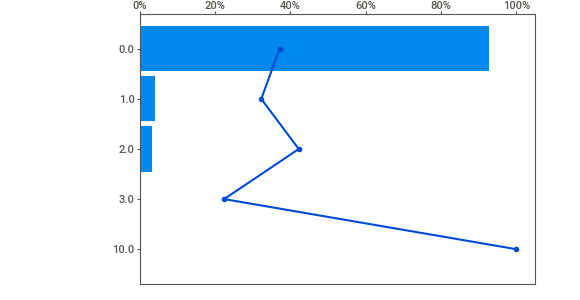
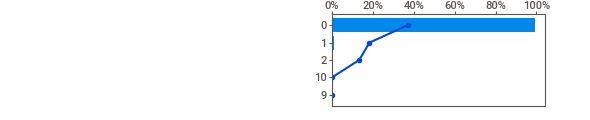
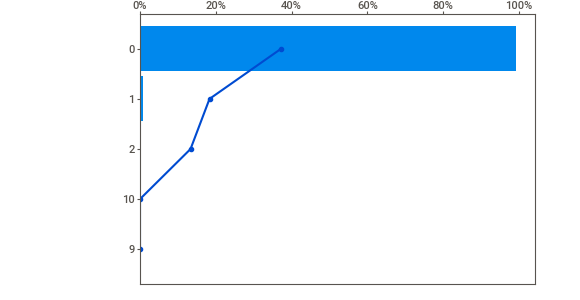
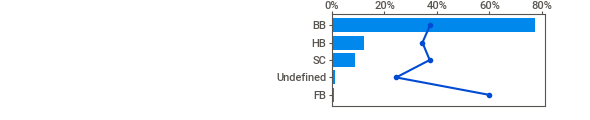
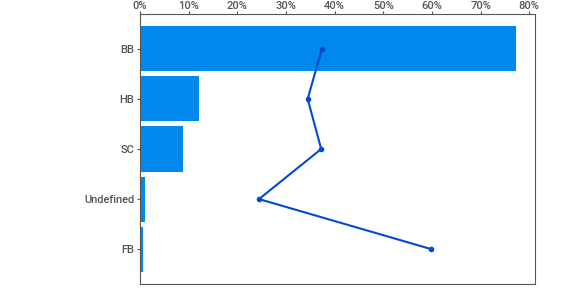
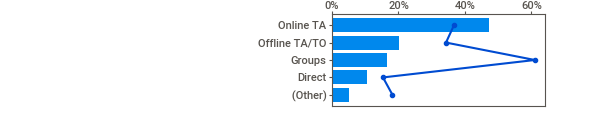
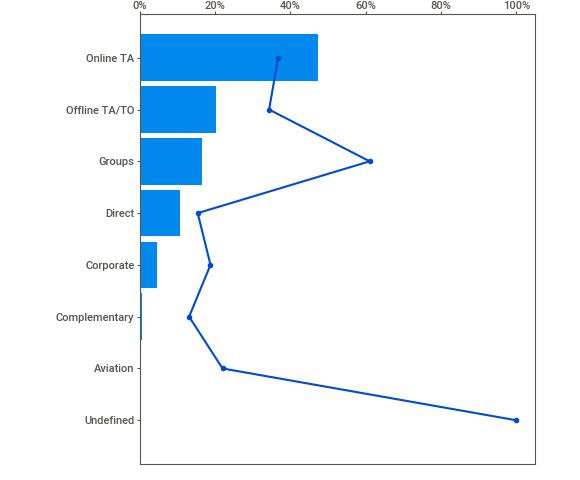
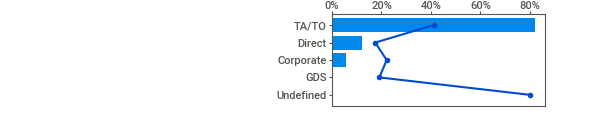
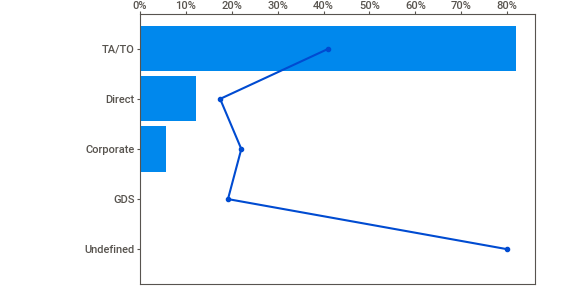
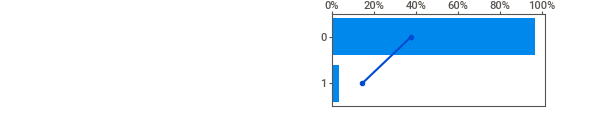
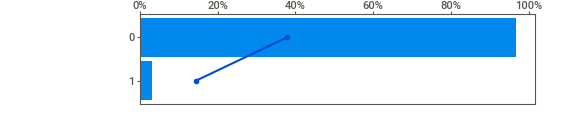
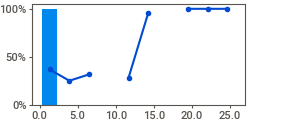
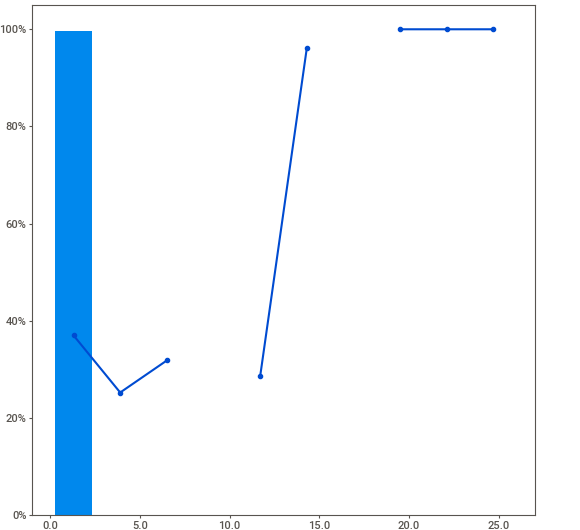
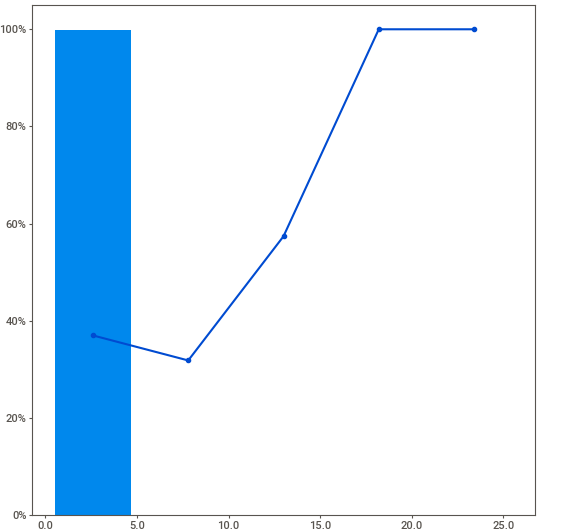
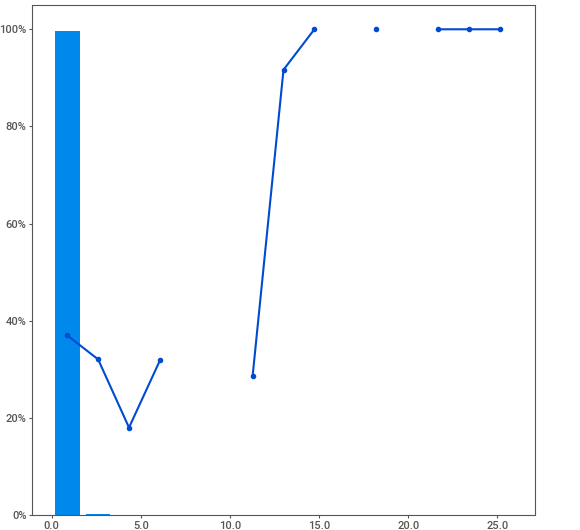
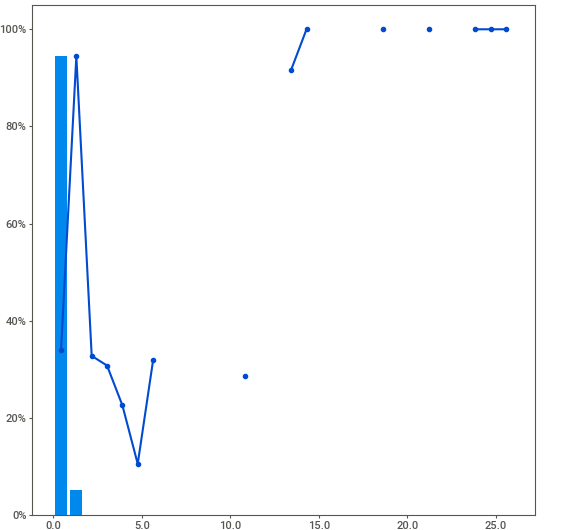
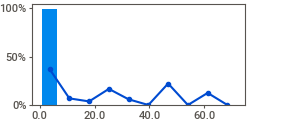
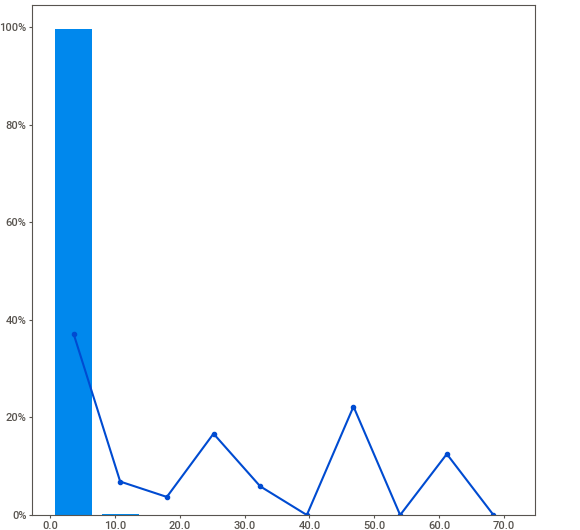
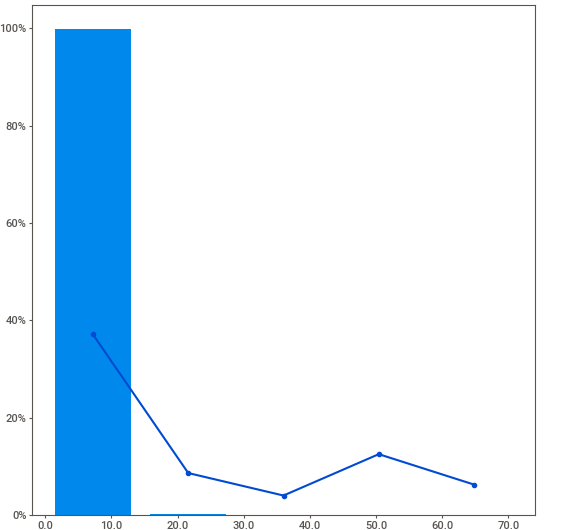
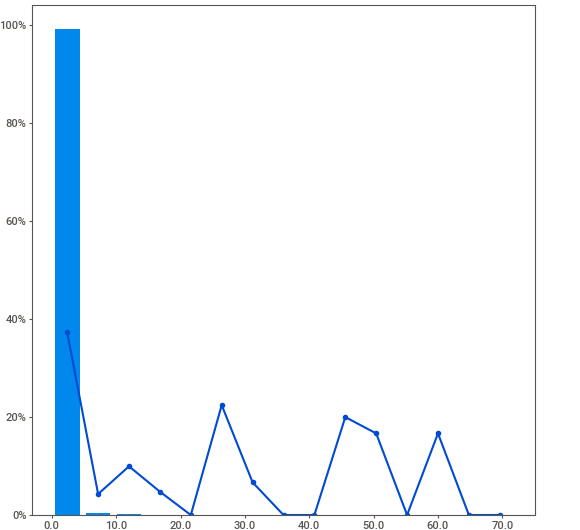
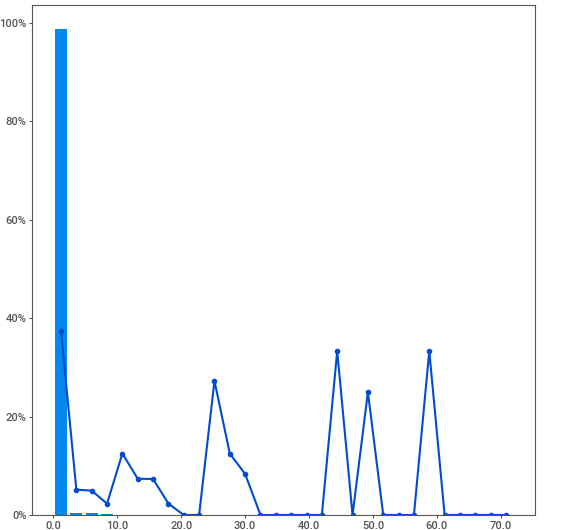
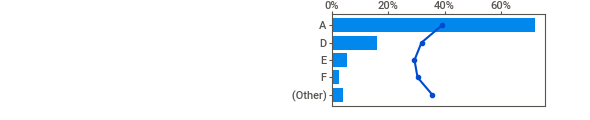
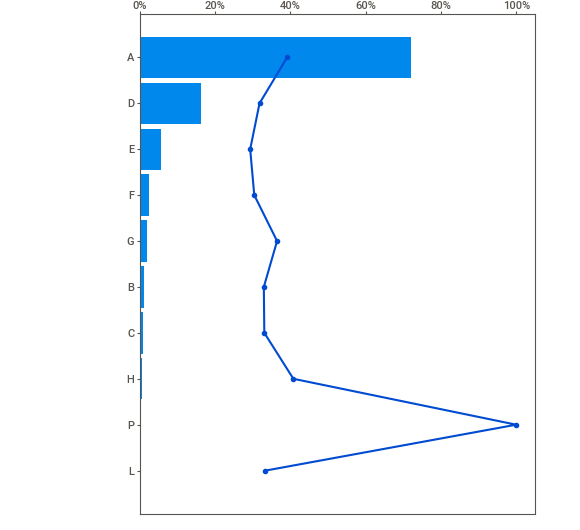
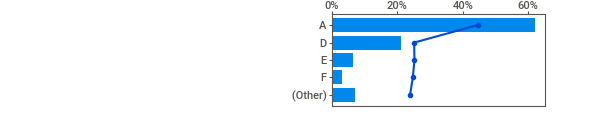
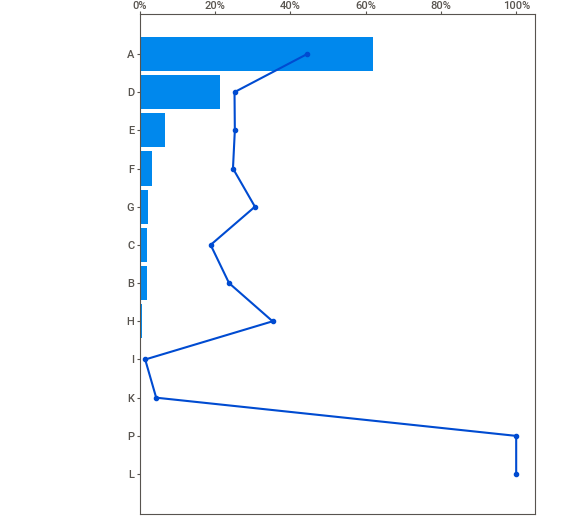
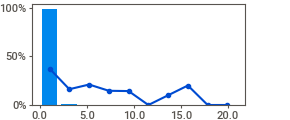
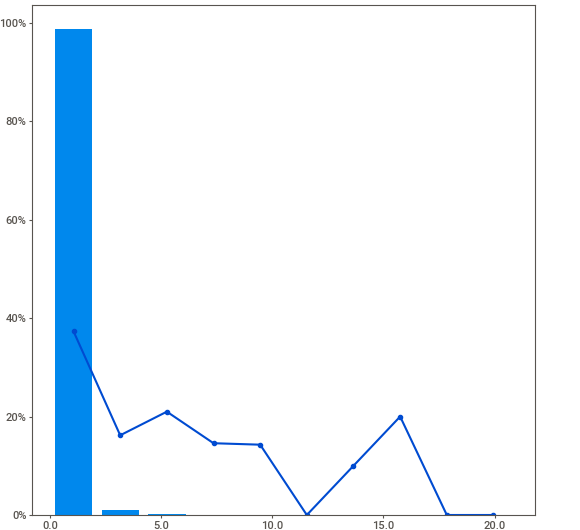
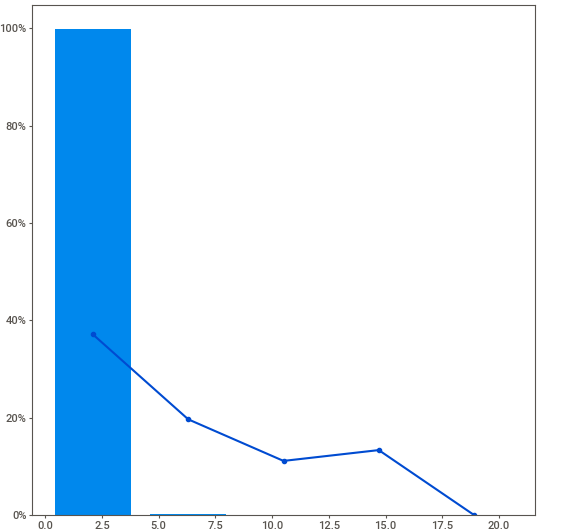
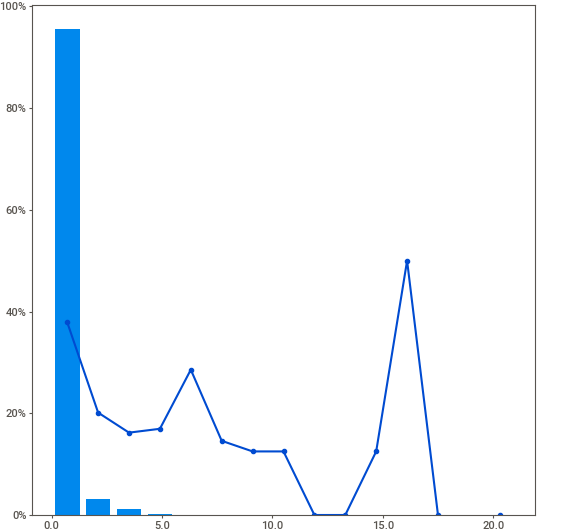
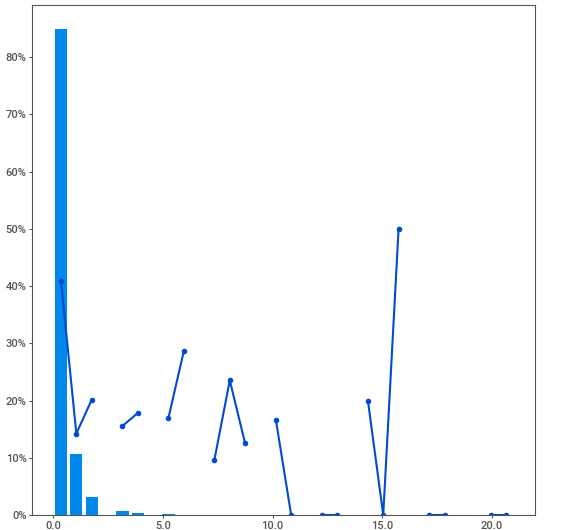
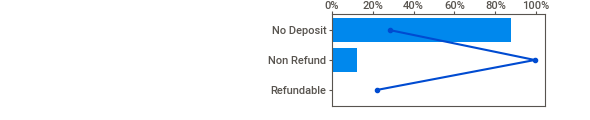
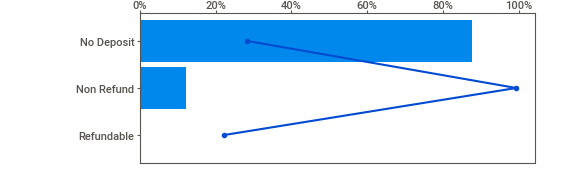
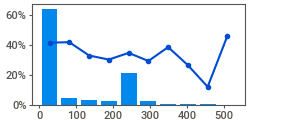
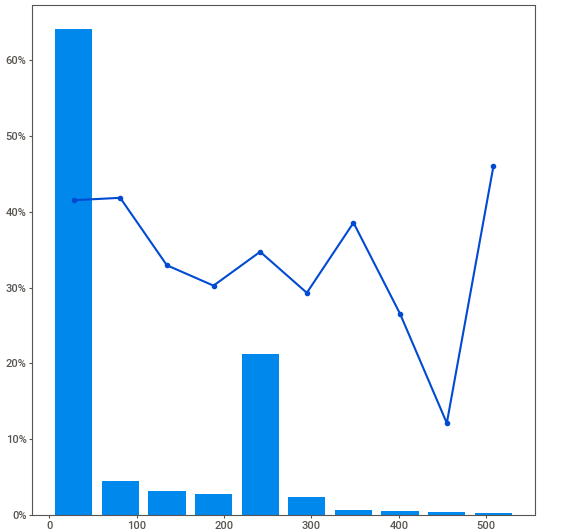
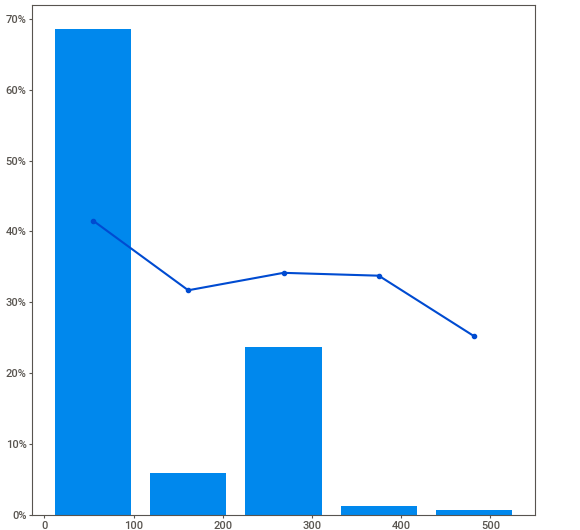
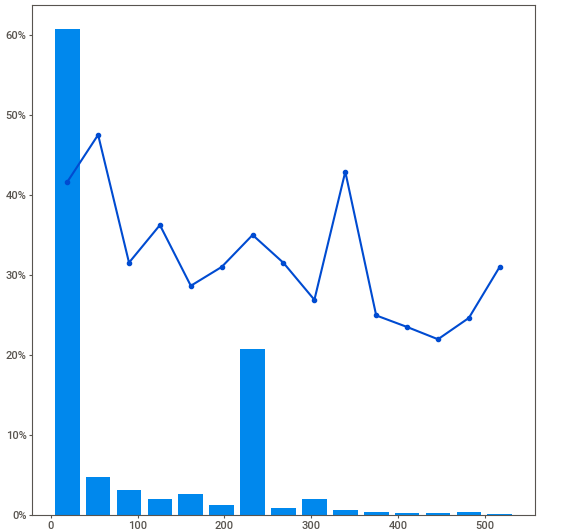
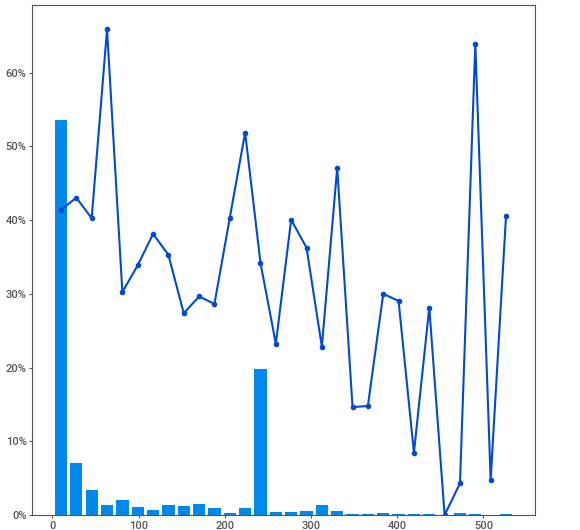
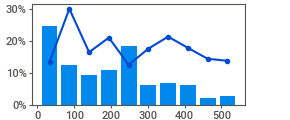
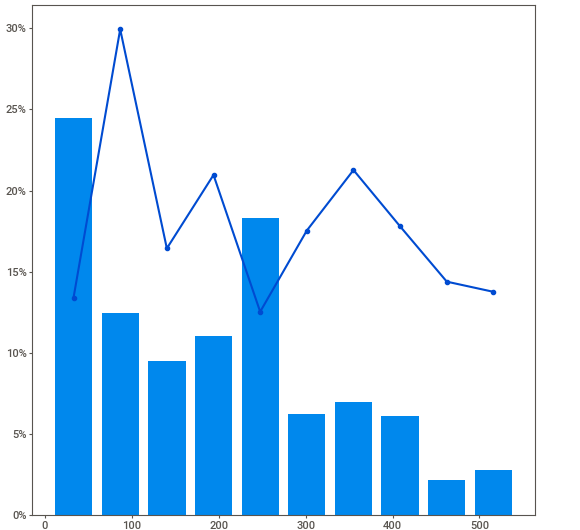
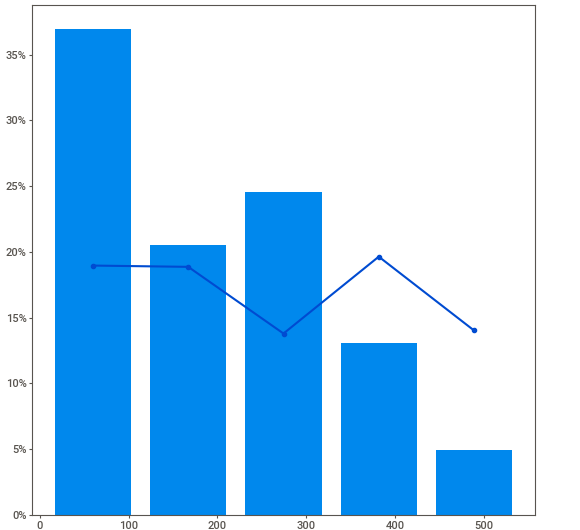
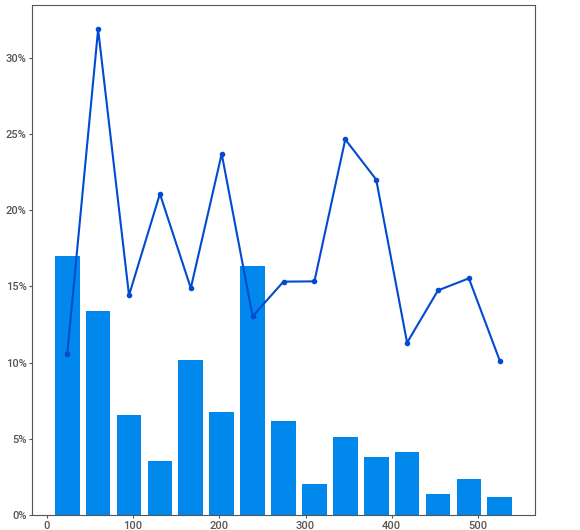
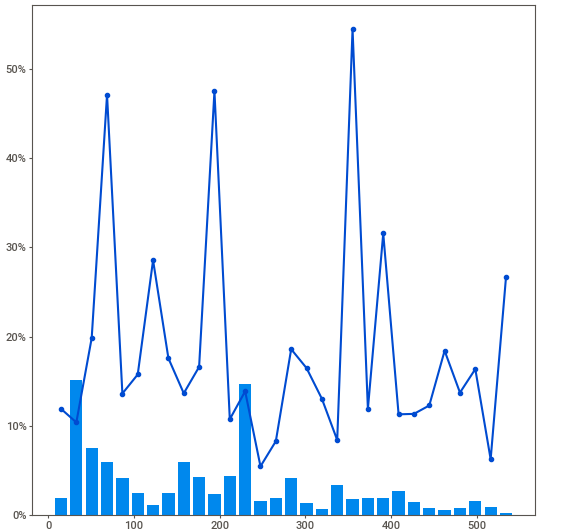
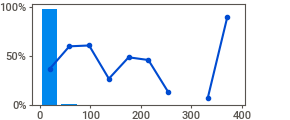
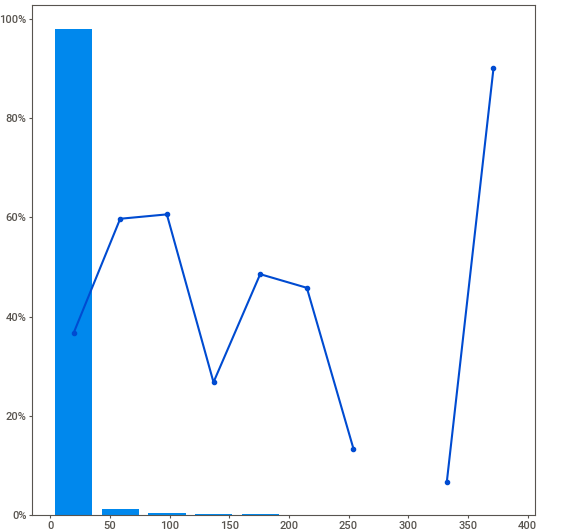
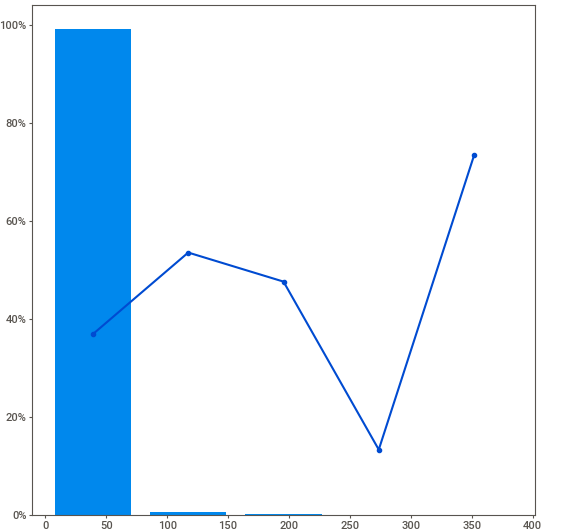
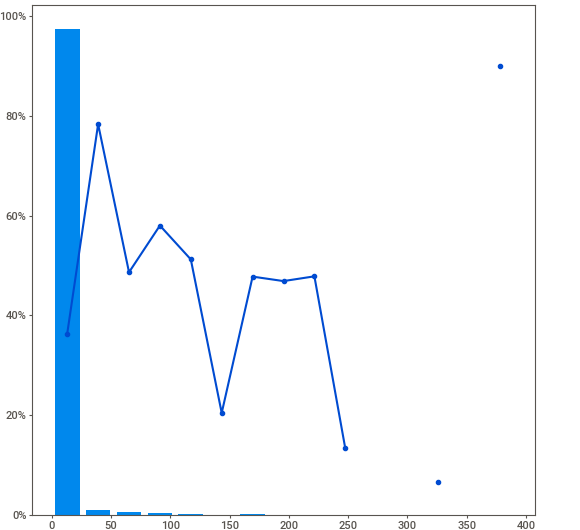
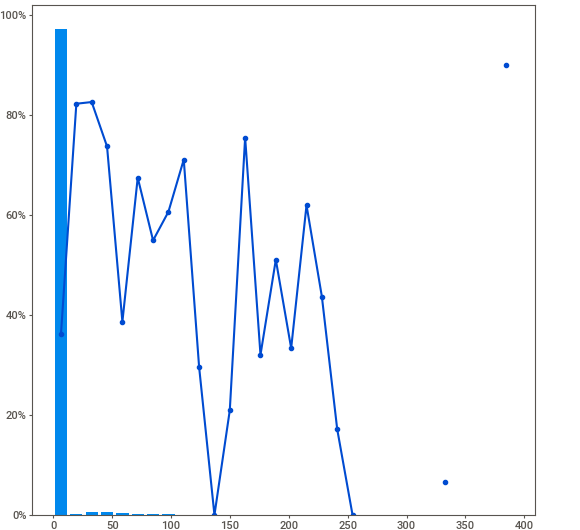
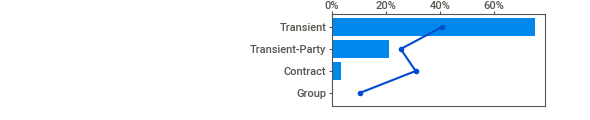
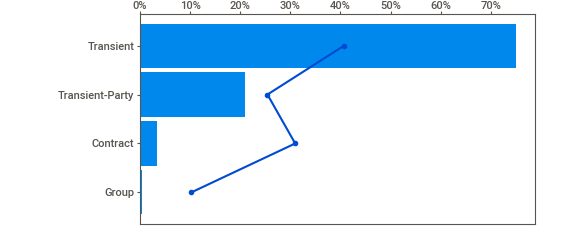
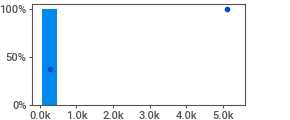
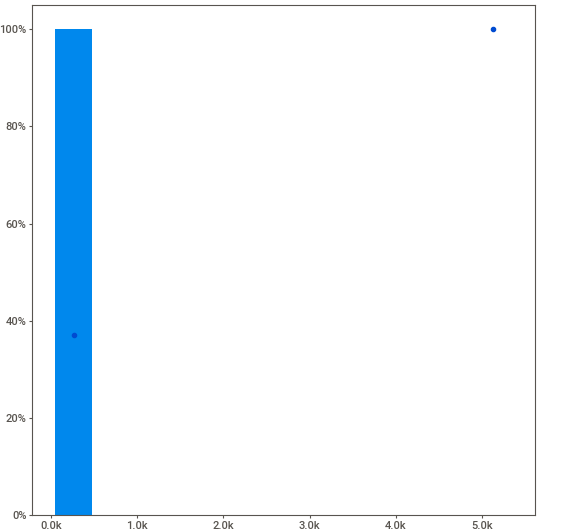
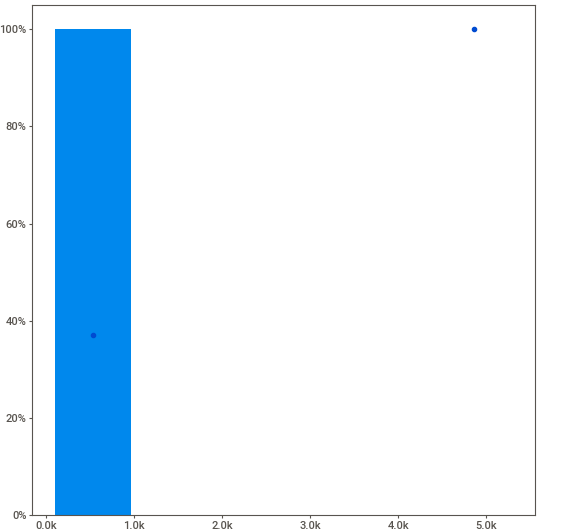
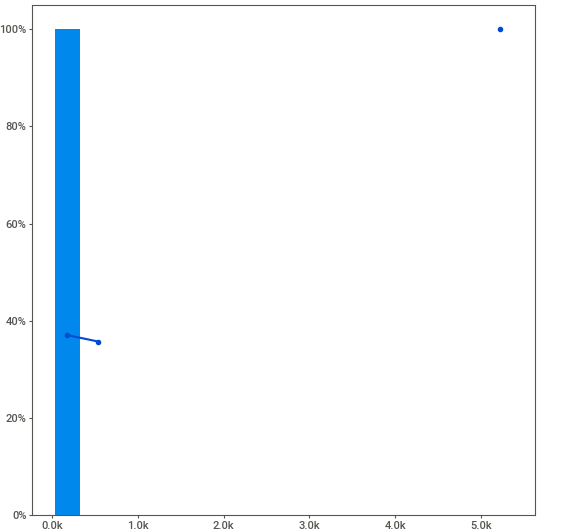
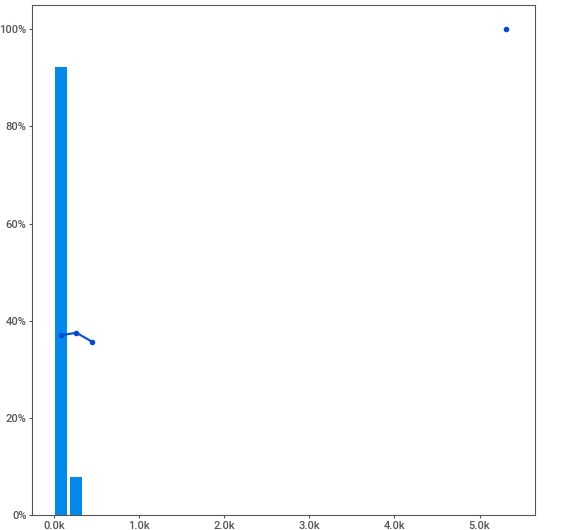
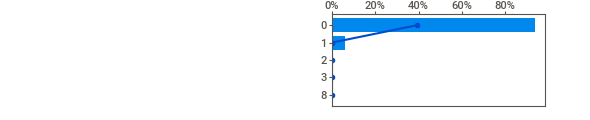
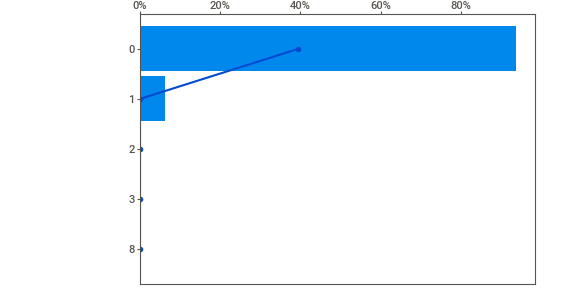
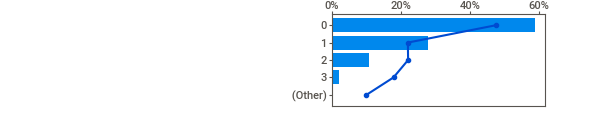
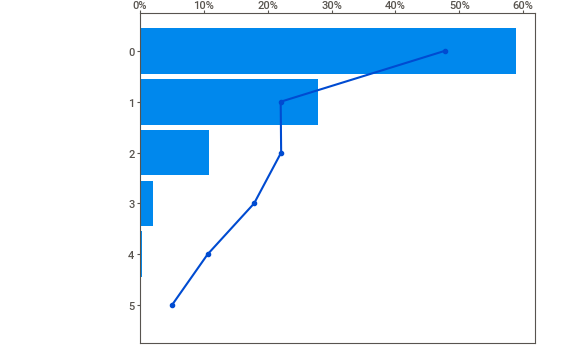
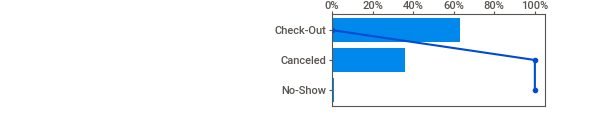
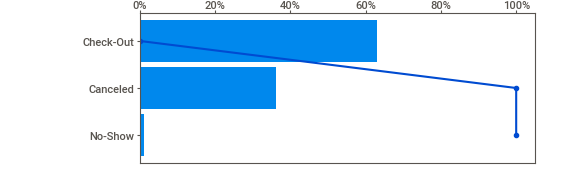
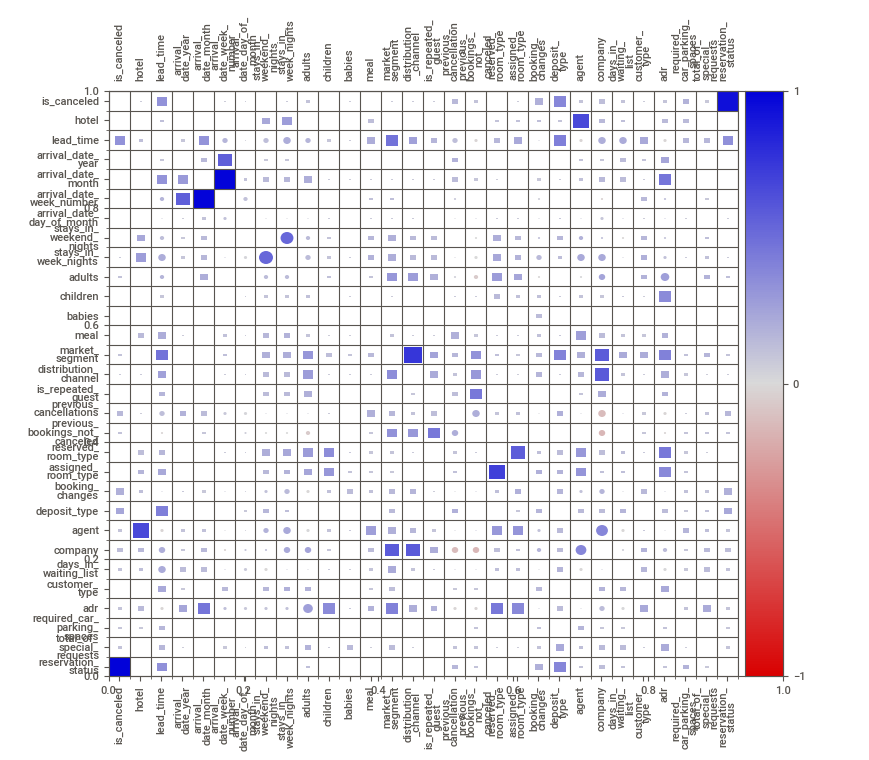
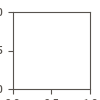

In [ ]:
report.show_notebook('/content/hotel_bookings_report.html')

**From this report we can see that the features deposit_type, reqd_car_parking_spaces, total_no_special_request, market_segment, lead_time, booking_changes, company are the important featues as they have high correlation with the target variable.**

# Data Preprocessing(managing missing values,separating numerical and categorical features,encoding categorical features).

**This function identifies and separates the categorical and numerical columns in a DataFrame, returning two lists: one for categorical columns (cat_col) and one for numerical columns (num_col).**

In [ ]:
def column_type_list(df):
  cat_col = []
  num_col = []
  for col in df.columns:
    if df[col].dtype == 'object':
      cat_col.append(col)
    else:
      num_col.append(col)
  return cat_col,num_col


cat_col , num_col = column_type_list(df)


In [ ]:
all_col = df.columns
print("All features: "+ str(all_col))
print("Numerical features: "+ str(num_col))
print("Categorical features: "+ str(cat_col))

All features: Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')
Numerical features: ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_b

In [ ]:
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

**Counting the occurrences of each unique value in the is_canceled column of the DataFrame df and returning a Series with the counts of each value (e.g., how many times 0 and 1 appear).**

In [ ]:
df['is_canceled'].value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

**This calculates the proportion of the not_cancelled bookings in the dataset.**

In [ ]:
print(75166/119390)

0.6295837172292487


**It identifies the types of data we are working with and gives the non-null count of each feature.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Handles missing values in the DataFrame df by replacing them with the mode (most frequent value) for the 'children' and 'country' columns, and with -1 for the 'agent' and 'company' columns.**


In [ ]:
df['children'].fillna(df['children'].mode()[0], inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['agent'].fillna(-1, inplace=True)
df['company'].fillna(-1, inplace=True)
print("missing values has been imputed.")

missing values has been imputed.


**Encoding Categorical features through Label Encoder**

**Label encoder is used over here because it uses a single column of integers, which can be more memory-efficient and doesn't create sparse data matrix which one-hot encoder might do,especially when dealing with a large number of categories.**

**For categorical features with a large number of categories, one-hot encoding can lead to a very high-dimensional feature space. Label encoding keeps the dimensionality of the dataset low.**

In [ ]:
le = LabelEncoder()
categorical_columns = [
    'hotel','arrival_date_month', 'meal', 'country', 'market_segment',
    'distribution_channel', 'reserved_room_type', 'assigned_room_type',
    'deposit_type', 'customer_type','reservation_status'
]
for col in categorical_columns:
    df[col] = le.fit_transform(df[col].astype(str))
df.head()

hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0      1            0        342               2015                   5   
1      1            0        737               2015                   5   
2      1            0          7               2015                   5   
3      1            0         13               2015                   5   
4      1            0         14               2015                   5   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...             0   
1                        0                     0       2  ...             0   
2                        0                     1       1  ...             0   
3                        0                     1       1  ...             0   
4                        0                     2       2  ...             0   

   agent  company  days_in_waiting_list  customer_type   adr  \
0   -1.0     -1.0                     0              2   0.0   
1   -1.0     -1.0                     0              2   0.0   
2   -1.0     -1.0                     0              2  75.0   
3  304.0     -1.0                     0              2  75.0   
4  240.0     -1.0                     0              2  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0                   1   
1                            0                          0                   1   
2                            0                          0                   1   
3                            0                          0                   1   
4                            0                          1                   1   

   reservation_status_date  
0               2015-07-01  
1               2015-07-01  
2               2015-07-02  
3               2015-07-02  
4               2015-07-03  

[5 rows x 32 columns]

**Since after handling missing values and encoding we can see here that all features types are of int/float and non-null count of each features are same(119390).**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int64  
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Exploratory Data Analysis(EDA)

**Calculates and sorts the correlation of each feature with the target variable 'is_canceled', then displays and plots these correlations in a bar chart.**

is_canceled                       1.000000
deposit_type                      0.468634
lead_time                         0.293123
country                           0.267502
distribution_channel              0.167600
previous_cancellations            0.110133
adults                            0.060017
market_segment                    0.059338
days_in_waiting_list              0.054186
adr                               0.047557
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
children                          0.005036
arrival_date_month               -0.001491
stays_in_weekend_nights          -0.001791
arrival_date_day_of_month        -0.006130
meal                             -0.017678
babies                           -0.032491
agent                            -0.046161
previous_bookings_not_canceled   -0.057358
reserved_room_type               -0.061282
customer_type                    -0.068140
company    

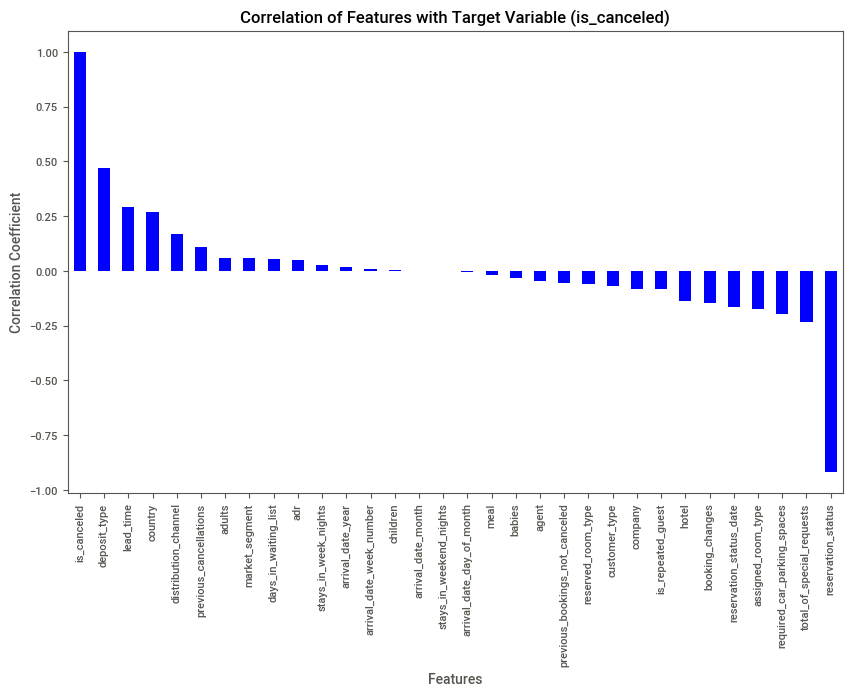

In [ ]:
# Ensure 'reservation_status_date' is in a numerical format for correlation calculation
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['reservation_status_date'] = df['reservation_status_date'].map(pd.Timestamp.toordinal)

# Calculate correlation with the target variable 'is_canceled'
correlation_with_target = df.corr()['is_canceled'].sort_values(ascending=False)

# Display the correlations
print(correlation_with_target)

# Plot the correlations
plt.figure(figsize=(12, 8))
correlation_with_target.plot(kind='bar', figsize=(10, 6), color='blue')
plt.title('Correlation of Features with Target Variable (is_canceled)')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

 **From this plot we can identify the important features. Also reservation_status and reservation_status_date features are highly correlated with target(-0.91) which is a case of data leakage**

**Selects features from the dataset that have a correlation greater than 0.25 with the target variable 'is_canceled', then it plots pairwise scatter plots for these selected features, using 'is_canceled' as the hue to visualize the relationships.**

In [ ]:
def correlation_with_specific_threshold(df, target_variable, threshold):
    # Calculate correlation of all features with the target variable
    correlation_matrix = df.corr()
    target_correlation = correlation_matrix[target_variable].abs()


    # Select features with high correlation with the target variable
    selected_features = target_correlation[target_correlation > threshold].index.tolist()

    # Remove the target variable from the list of selected features
    selected_features.remove(target_variable)

    # Print the selected features
    print(f"Selected features with correlation > {threshold} with {target_variable}:")
    print(selected_features)

    # Plot pairwise scatter plots for the selected features
    if len(selected_features) > 1:
      for i, col1 in enumerate(selected_features):
        for col2 in selected_features[i + 1:]:
            plt.figure(figsize=(4, 4))
            sns.scatterplot(x=col1, y=col2, data=df, hue=target_variable, palette="viridis")
            plt.title(f'Scatter Plot between {col1} and {col2} with {target_variable} hue')
            plt.show()
    else:
        print("Not enough features with high correlation to create pairwise plots.")

    return selected_features

Selected features with correlation > 0.25 with is_canceled:
['lead_time', 'country', 'deposit_type', 'reservation_status']


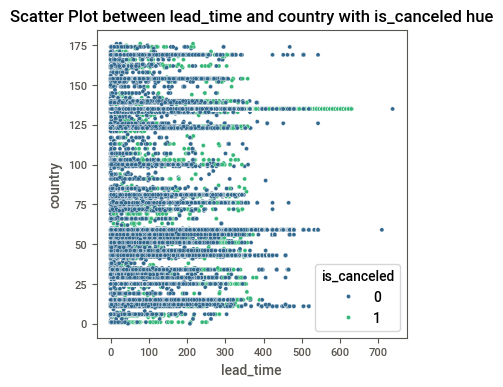

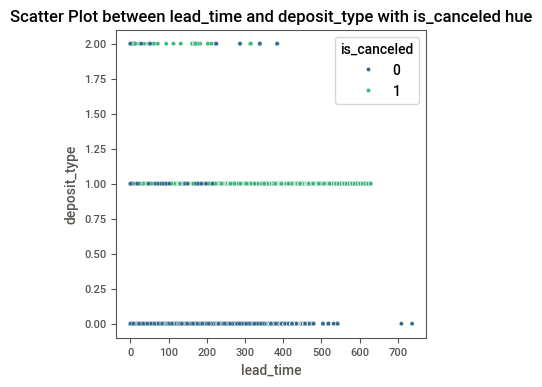

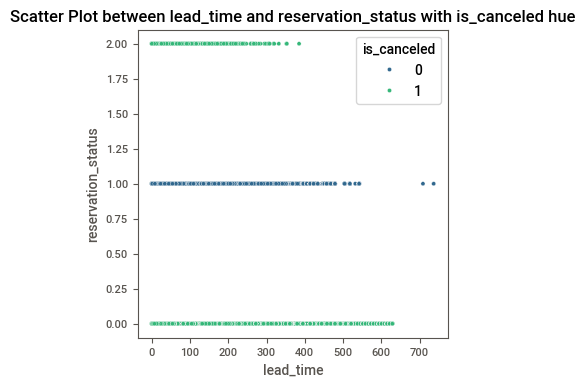

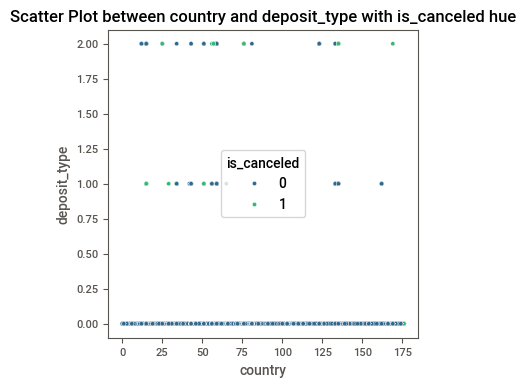

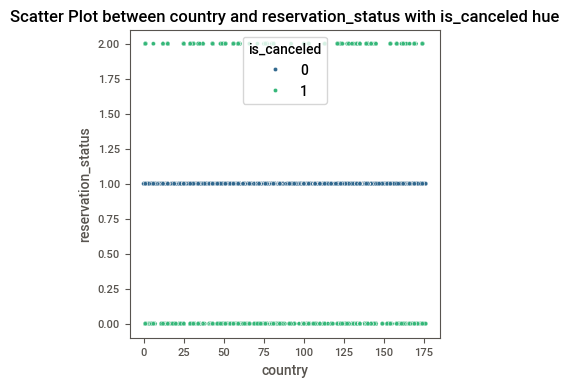

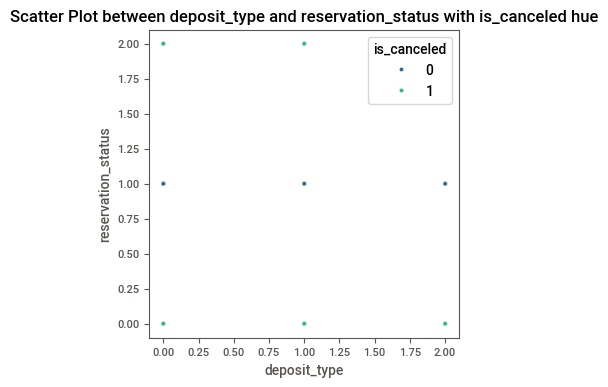

['lead_time', 'country', 'deposit_type', 'reservation_status']

In [ ]:
imp_features = correlation_with_specific_threshold(df, 'is_canceled', 0.25)
imp_features

**From this we can see that the features lead_time, country, deposit_type, have correlation value greater than 0.25 with is_cancelled.**

**Higher lead times (the time between booking and arrival) seem to have a higher rate of cancellations (is_canceled = 1). This suggests that bookings made well in advance are more likely to be canceled.**

**The scatter plot shows that deposit type (deposit_type) affects cancellations. For example, a certain deposit type might be associated with fewer cancellations, possibly due to non-refundable policies that discourage cancellations.**

**These observations highlight factors like lead_time and deposit_type as potential predictors for cancellations in hotel bookings.**

# **Pair-Plot** :
**Visualizes the pairwise relationships between features in a dataset, showing scatter plots for each pair of features along with the distribution of individual features on the diagonal. It helps in identifying correlations, patterns, and potential outliers in the data.**

In [ ]:
def features_pairplot(df):
    sns.pairplot(df)
    plt.gcf().set_size_inches(24, 24)  # Adjust to larger size
    plt.xticks(rotation=45)
    plt.subplots_adjust(left=0.15, bottom=0.15, right=0.18, top=0.18, wspace=0.10, hspace=0.10)
    plt.tight_layout()
    plt.show()

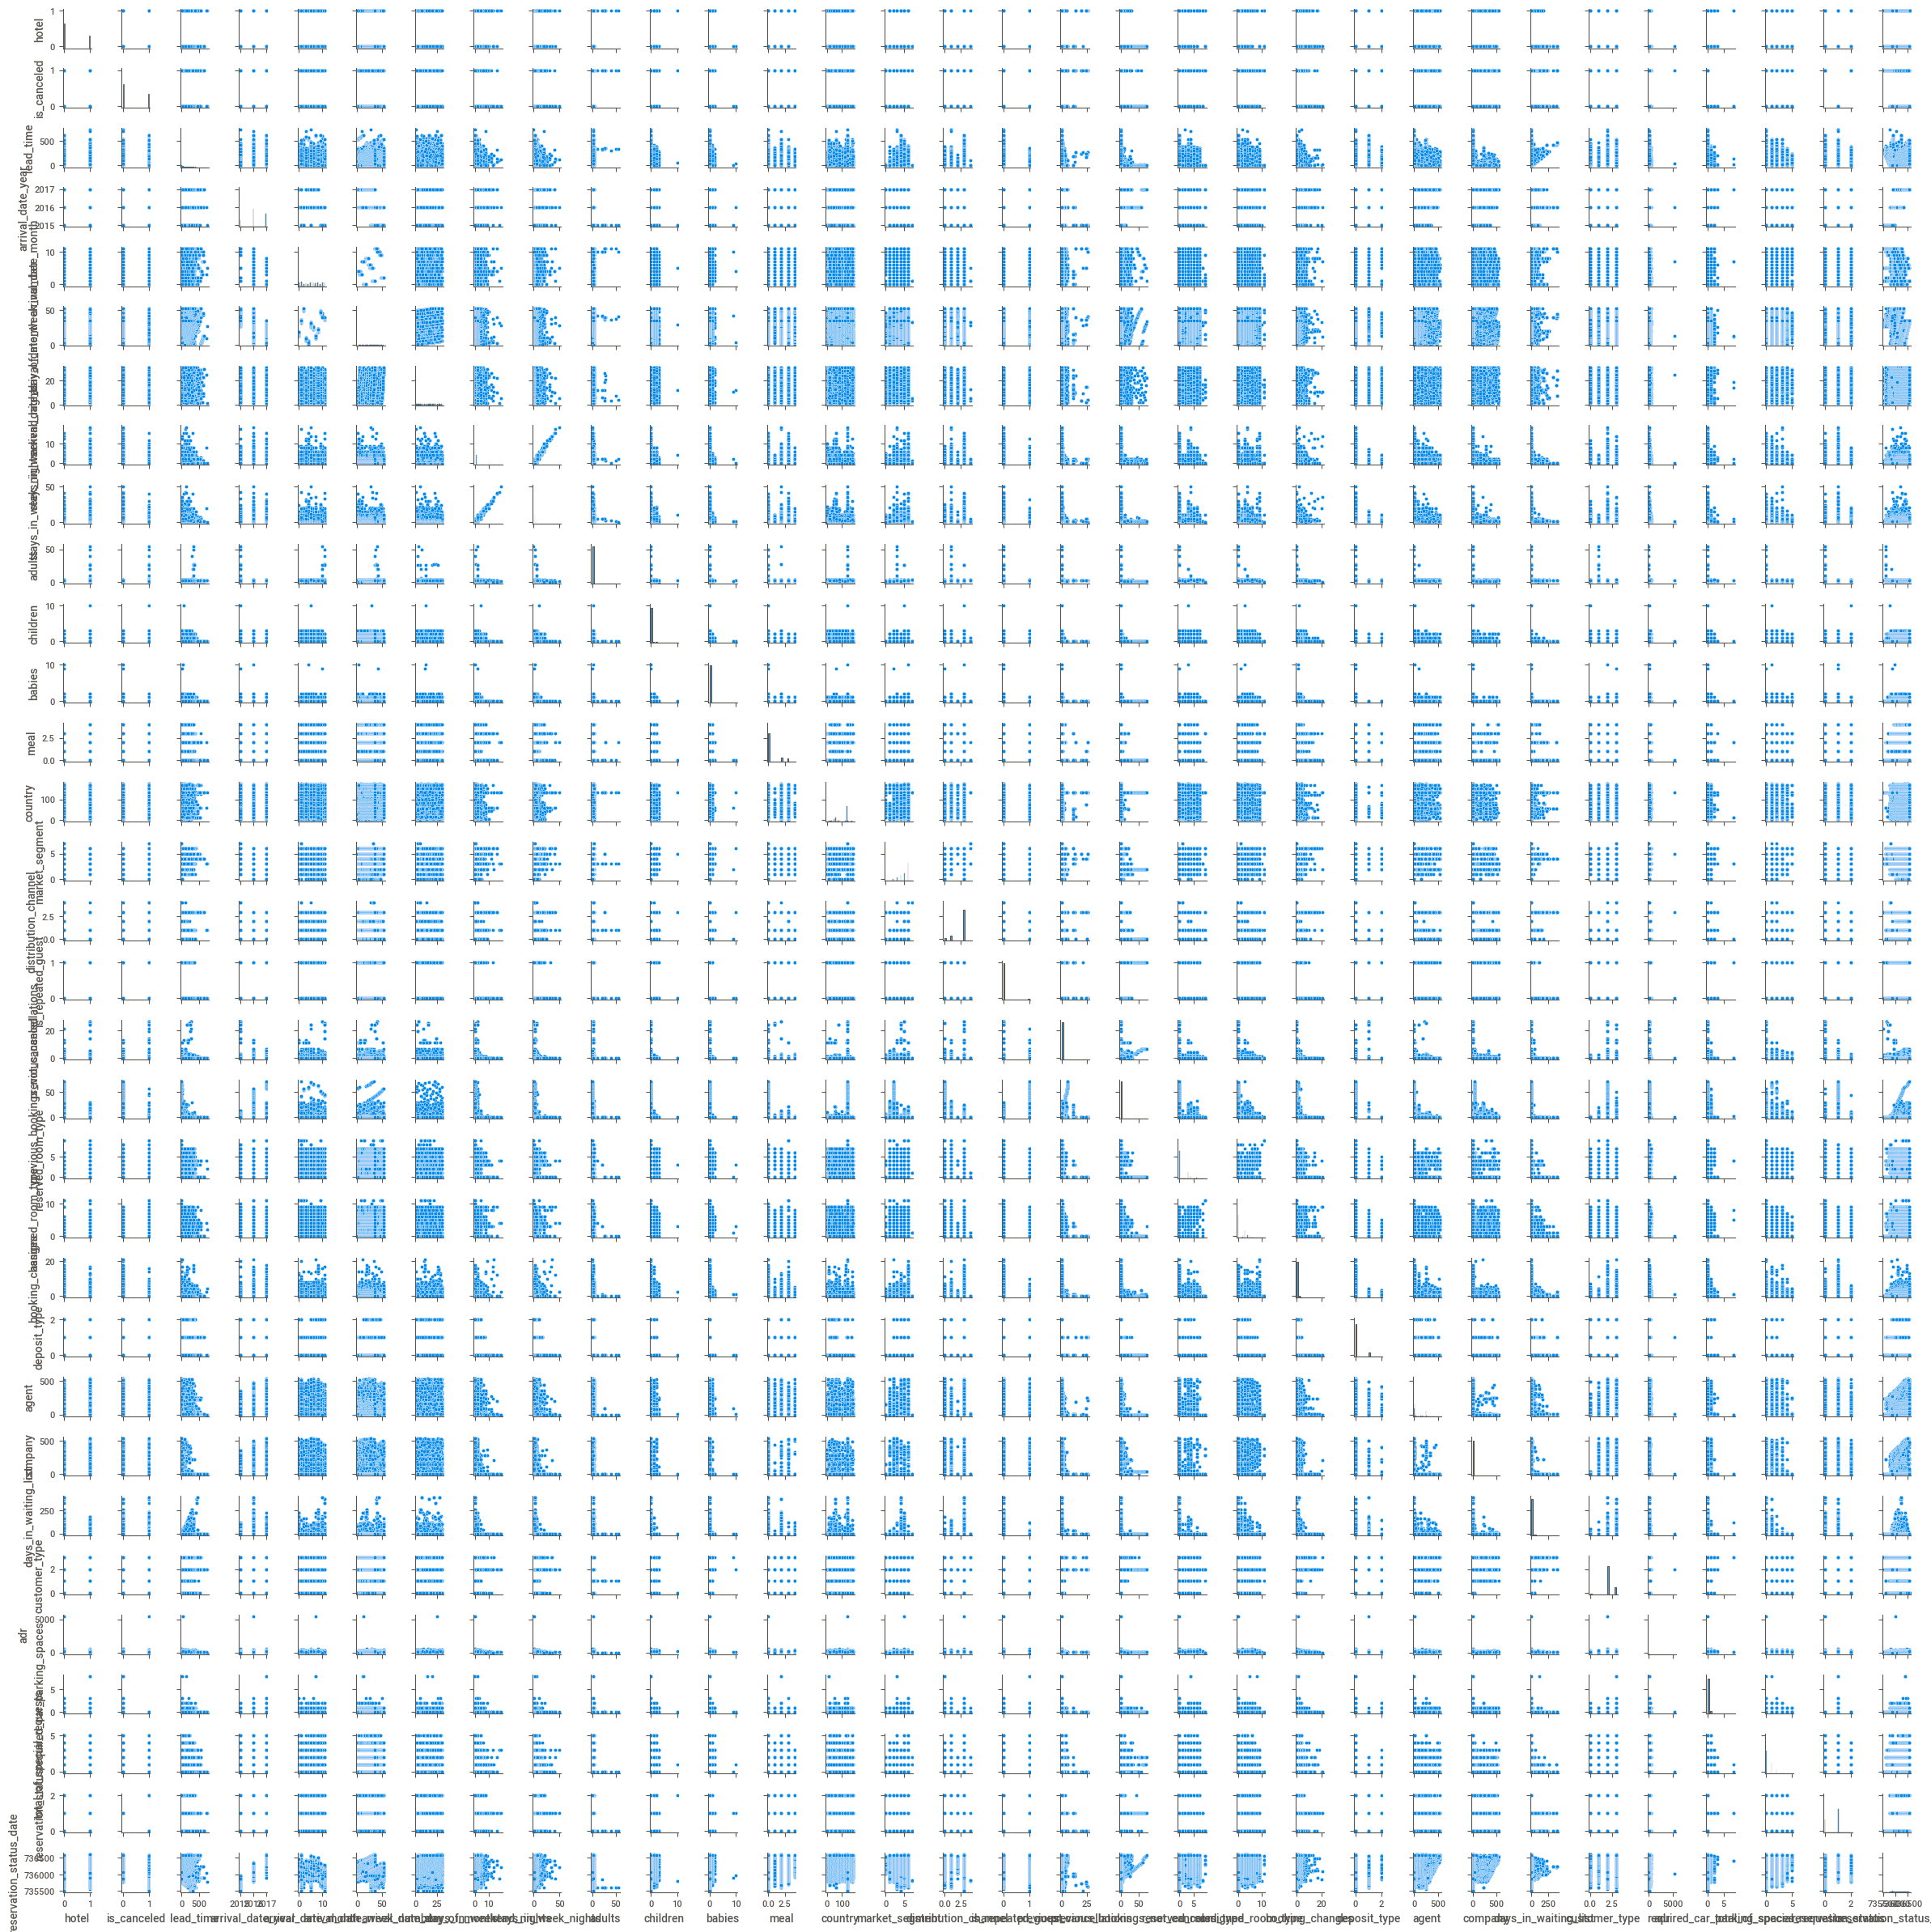

In [ ]:
features_pairplot(df)

**From this plot we can identify the unimportant features which are arrive_date_year, babies, adr, hotel, is_repeated_guest, meal as they don't show much variations and have mostly have horizontal and vertical lines in the Pair-Plot.**

_______

**Calculates and displays the count of overlapping occurrences for each combination of 'market_segment' and 'distribution_channel' in the DataFrame, filtering to show only combinations with a count greater than 0.**

In [ ]:
def two_features_overlap(feature1, feature2, df):
  overlap_df = df.groupby([feature1, feature2]).size().reset_index(name='count')

  # Filter the DataFrame to include only rows where the count is greater than 0
  overlap_df = overlap_df[overlap_df['count'] > 0]

  # Display the overlapping values and their counts
  print(overlap_df)

In [ ]:
two_features_overlap('market_segment', 'distribution_channel', df)


    market_segment  distribution_channel  count
0                0                     0    227
1                0                     3     10
2                1                     0     89
3                1                     1    576
4                1                     3     78
5                2                     0   4788
6                2                     1    172
7                2                     3    335
8                3                     0     90
9                3                     1  12276
10               3                     2      1
11               3                     3    237
12               3                     4      2
13               4                     0   1228
14               4                     1   1472
15               4                     3  17111
16               5                     0    212
17               5                     1     16
18               5                     2     45
19               5                     3

**Creates a pivot table to show the overlap counts between 'market_segment' and 'distribution_channel', and now we are going to  visualize this overlap using a heatmap.**

In [ ]:
def two_feature_heatmap(f1_y, f2_x, df):
  overlap_pivot = df.pivot_table(index=f1_y, columns=f2_x, aggfunc='size', fill_value=0)

  # Plot the heatmap
  plt.figure(figsize=(10, 8))
  sns.heatmap(overlap_pivot, annot=True, fmt="d", cmap="YlGnBu")
  plt.title(f"Overlap between {f2_x} and {f1_y}")
  plt.xlabel(f"{f1_y}")
  plt.ylabel(f"{f2_x}")
  plt.show()

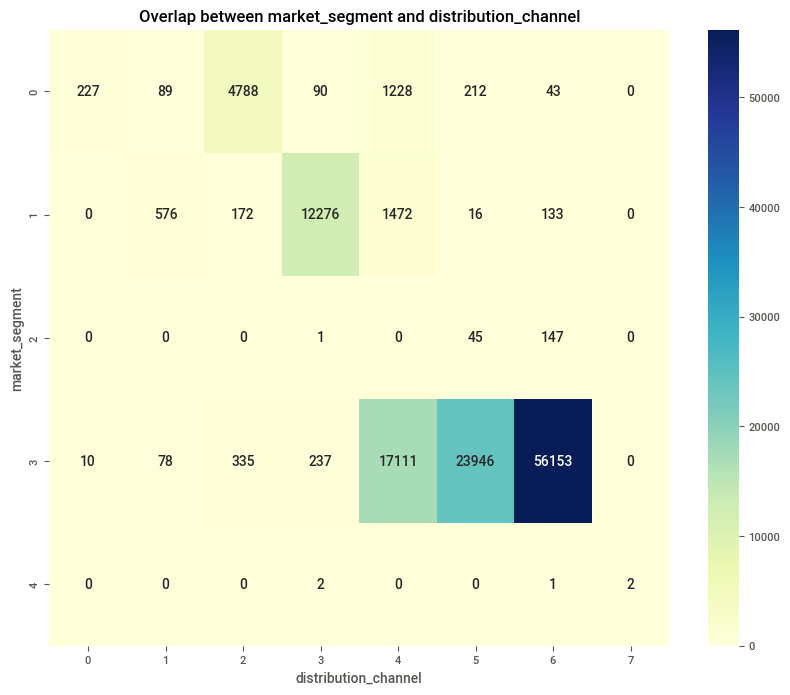

In [ ]:
two_feature_heatmap( 'distribution_channel', 'market_segment', df)

**From the above heatmap and correlation(+0.76), we can say that market_segment and distribution_channel have very high overlapping values with a maximum of 56153 values. So, distribution_channel can be dropped as market_segment is an important feature.**


**we can also confirm this by doing correlation analysis(pearsons method) between market_segment and distribution_channel.**

In [ ]:
print(df['market_segment'].corr(df['distribution_channel']))

0.7677514440051981


**Calculates and displays the count of overlapping occurrences for each combination of 'agent' and 'company' in the DataFrame, filtering to show only combinations with a count greater than 0.**

In [ ]:
#Function used for checking the overlab between two features.
two_features_overlap('agent', 'company', df)

     agent  company  count
0     -1.0     -1.0   9760
1     -1.0      6.0      1
2     -1.0      8.0      1
3     -1.0      9.0     26
4     -1.0     10.0      1
..     ...      ...    ...
708  510.0     -1.0      2
709  526.0     -1.0     10
710  527.0     -1.0     35
711  531.0     -1.0     68
712  535.0     -1.0      3

[713 rows x 3 columns]


**Calculates and prints the Pearson correlation coefficient between the 'agent' and 'company' columns**

In [ ]:
print(df['agent'].corr(df['company']))

-0.12320298134945569


**From this we can see that 'agent' and 'company' are not highly correlated**

## Business Context based on Important Features:


*   **Deposit Type (deposit_type):
Understanding the deposit type helps a hotel manage its revenue and risk. For example, a non-refundable deposit might guarantee some income even if the customer cancels, while a refundable deposit might attract more customers but comes with a risk of refunds.**

*   **Required Car Parking Spaces (reqd_car_parking_spaces):
It's significant for hotels with limited parking facilities as it affects logistics, customer satisfaction, and space management. Hotels may charge extra for parking spaces, making this feature relevant to ancillary revenue.**


*   **Total Number of Special Requests (total_no_of_special_requests):
High numbers of special requests might indicate a more demanding or particular customer, potentially requiring more attention from staff. It could also impact operational costs and customer satisfaction.**

*   **Lead Time (lead_time):
Longer lead times could mean the booking was made well in advance, which might be associated with different pricing strategies (like early bird discounts). Shorter lead times could suggest last-minute bookings, which might be priced differently and could also indicate customer behavior patterns.**

### getting the test train data from the s3 bucket

In [ ]:
#getting the test data
s3_client.download_file('hotel-cancellation-prediction', 'test/test_data.csv', 'test_data.csv')
test_buc = pd.read_csv('test_data.csv')

#getting the train data
s3_client.download_file('hotel-cancellation-prediction', 'train/train_data.csv', 'train_data.csv')
train_buc = pd.read_csv('test_data.csv')

In [ ]:
test_buc.head()
train_buc.head()

hotel  arrival_date_week_number  arrival_date_day_of_month  \
0  3.473671                 -1.188754                  -2.606318   
1 -1.358503                  0.308146                   0.389561   
2  2.196050                 -0.119220                   0.530961   
3 -1.967695                 -0.752161                   0.805609   
4 -0.664767                  1.141581                   0.425150   

   stays_in_weekend_nights  stays_in_week_nights    adults  children  \
0                 0.199677             -0.809592  3.337499  0.596022   
1                 0.160804             -0.024194 -0.400904 -0.367992   
2                -0.268137             -1.294406  1.080753  2.072543   
3                -0.241074             -1.279534 -0.745015 -0.754423   
4                -1.725008              0.352360  0.099852 -0.526221   

     babies      meal   country  ...  reserved_room_type  booking_changes  \
0  0.183968  1.334823  0.659993  ...            1.684948        -3.360133   
1  0.463875 -0.108870 -0.113701  ...            0.222799        -0.191270   
2 -0.095399 -0.994895 -0.322716  ...            1.554193        -1.863253   
3 -0.865516  0.874747 -0.005840  ...           -0.040737         0.486913   
4 -0.873887  0.012462  0.780214  ...           -0.306504        -0.033291   

   deposit_type     agent   company  days_in_waiting_list  customer_type  \
0      1.573275 -1.072715  0.484450              0.210793      -0.291233   
1      0.458313  0.513588  0.154513             -0.515815      -0.211059   
2      1.116452 -0.560807 -0.226375             -0.227721      -0.300889   
3      0.364829  1.321059 -0.271631              0.362185       0.003954   
4      0.588217 -0.229050  0.002927             -0.223006      -0.082321   

        adr  total_of_special_requests  is_canceled  
0 -0.824915                  -0.516806            0  
1  0.309035                   1.291389            1  
2  0.940811                   0.284547            0  
3  0.358853                   0.598037            0  
4  0.230178                  -0.721835            0  

[5 rows x 24 columns]

### Here we are dropping the reservation_status and reservation_status_date columns as they are cases of data leakage as they are highly correlated with the target variable (-0.91)

In [ ]:
df = df.drop(columns=['reservation_status', 'reservation_status_date'], errors='ignore')
df.head()

hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0      1            0        342               2015                   5   
1      1            0        737               2015                   5   
2      1            0          7               2015                   5   
3      1            0         13               2015                   5   
4      1            0         14               2015                   5   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0                     0       2  ...   
2                        0                     1       1  ...   
3                        0                     1       1  ...   
4                        0                     2       2  ...   

   assigned_room_type  booking_changes  deposit_type  agent  company  \
0                   2                3             0   -1.0     -1.0   
1                   2                4             0   -1.0     -1.0   
2                   2                0             0   -1.0     -1.0   
3                   0                0             0  304.0     -1.0   
4                   0                0             0  240.0     -1.0   

   days_in_waiting_list  customer_type   adr  required_car_parking_spaces  \
0                     0              2   0.0                            0   
1                     0              2   0.0                            0   
2                     0              2  75.0                            0   
3                     0              2  75.0                            0   
4                     0              2  98.0                            0   

   total_of_special_requests  
0                          0  
1                          0  
2                          0  
3                          0  
4                          1  

[5 rows x 30 columns]

# Application Of Models
## Case 1: Considering all the features except reservation_status and reservation_status_date we are applying all the models over here.
# Logistic Regression
**Logistic regression is a statistical model used for binary classification tasks. It estimates the probability that a given input belongs to a particular class.**

**Why we have used logistic regression- As it works well as a baseline model, Provides probabilities, not just classifications, Fast for training and inference, Easily interpretable coefficients.**

**The Logistic Regression Model is applied on the whole dataset after removing the reservation_status and reservation_status date columns.**

*  **Data Preparation: The code splits the dataset into feature variables (X) and the target variable (y), then further divides it into training and testing sets with an 80-20 split. It standardizes the feature variables using StandardScaler.**

*   **Model Initialization and Training: It initializes a Logistic Regression model and fits it on the scaled training data.**


*   **Prediction and Evaluation: The model makes predictions on the scaled test data and calculates various evaluation metrics, including accuracy, precision, recall, F1 score, and ROC AUC score.**

* **Reporting: It prints a detailed classification report and the calculated evaluation metrics.**

*   **Visualization: It plots the ROC curve to visualize the model's performance and the AUC score, indicating how well the model distinguishes between the classes.**

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, y_test_pred_proba):


    # Calculate evaluation metrics for training data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f'Training Accuracy: {train_accuracy:.4f}')
    print(f'Testing Accuracy: {test_accuracy:.4f}')

    # Calculate evaluation metrics for test data
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred_proba)

    # Print the evaluation metrics
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'ROC AUC Score: {roc_auc:.4f}')

    # Print the classification report for a detailed breakdown
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))

    # Plot the AUC-ROC curve for test data
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'Model (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Generate the confusion matrix for test data
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues, values_format='d')

    # Set title and labels
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [ ]:
def evaluate_model_ann(model, X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, y_test_pred_proba):


    # Calculate evaluation metrics for training data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f'Training Accuracy: {train_accuracy:.4f}')
    print(f'Testing Accuracy: {test_accuracy:.4f}')

    # Calculate evaluation metrics for test data
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred_proba)

    # Print the evaluation metrics
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'ROC AUC Score: {roc_auc:.4f}')

    # Print the classification report for a detailed breakdown
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))

    # Plot the AUC-ROC curve for test data
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'Model (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Plot the confusion matrix (manually specifying labels for binary classification)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues, values_format='d')
     # Set title and labels
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

Training Accuracy: 0.7946
Testing Accuracy: 0.7947
Precision: 0.8117
Recall: 0.5907
F1 Score: 0.6838
ROC AUC Score: 0.8686

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85     14907
           1       0.81      0.59      0.68      8971

    accuracy                           0.79     23878
   macro avg       0.80      0.75      0.77     23878
weighted avg       0.80      0.79      0.79     23878



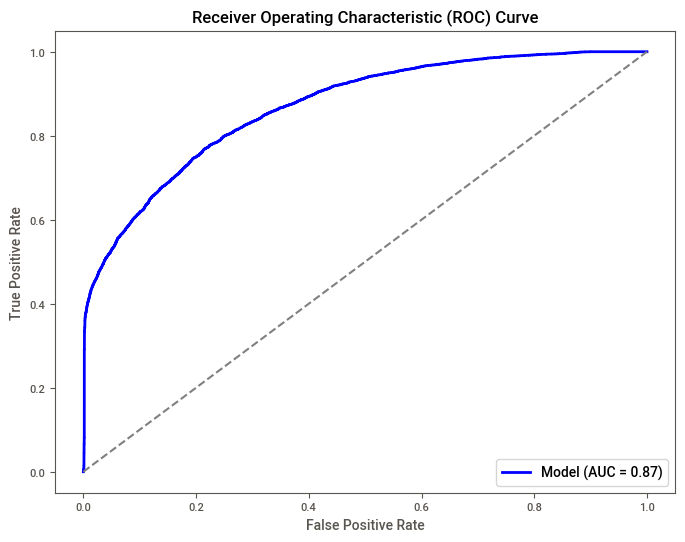

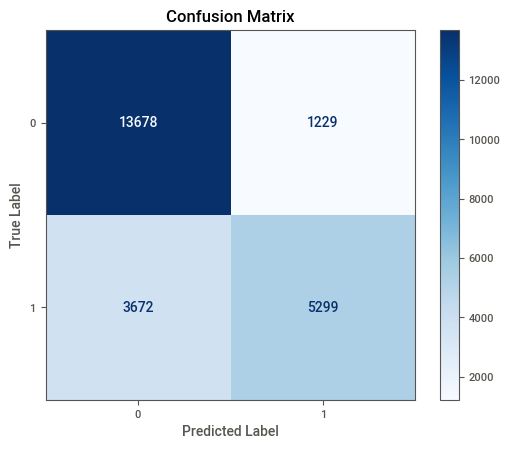

In [ ]:
# Split the data into features (X) and target (y)
X = df.drop('is_canceled', axis=1)  # Assuming 'is_canceled' is the target column
y = df['is_canceled']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Fit the model on the training data
start_time = time.time()
log_reg.fit(X_train_scaled, y_train)
# Measure the end time
end_time = time.time()

# Predict on training data
y_train_pred = log_reg.predict(X_train_scaled)
y_train_pred_proba = log_reg.predict_proba(X_train_scaled)[:, 1]

# Make predictions on the test data
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]  # For AUC-ROC score

evaluate_model(log_reg,X_train_scaled,y_train, X_test_scaled,y_test, y_train_pred,y_pred, y_pred_proba)

**The code generates and displays a confusion matrix for the Logistic Regression model using a visual plot with labeled axes.**

**Confusion Matrix: A confusion matrix is a performance measurement tool for classification models. It shows the counts of true positive, true negative, false positive, and false negative predictions, allowing evaluation of how well the model classifies each class.**

**From the Confusion Matrix we can see that**

*   True Positive(TP): 5299

*   True Negative(TN): 13678

*   False Positive(FP): 1229

*   False Negative(FN): 3672

___



**The code measures the training time of the Logistic Regression model, calculates the number of parameters (features plus intercept), and computes a cost based on training time and the number of parameters. It then prints these metrics.**

In [ ]:
# Calculate the training time
training_time = end_time - start_time

# Calculate the number of parameters
n_parameters = X_train_scaled.shape[1] + 1  # Number of features + 1 for the intercept

# Calculate the cost (arbitrary formula)
# Cost function could be customized as needed, e.g., proportional to training time and number of parameters
cost = training_time * n_parameters

# Print the training time, number of parameters, and cost
print(f'Training Time: {training_time:.4f} seconds')
print(f'Number of Parameters: {n_parameters}')
print(f'Cost of Logistic Regression: {cost:.4f}')


Training Time: 0.9353 seconds
Number of Parameters: 30
Cost of Logistic Regression: 28.0605


**Therefore we can see that the Logistic Regression Model is less costly  but also has a low Accuracy.**

___

# Random Forest Classifier

**A Random Forest Classifier is an ensemble learning method used for classification tasks. It builds multiple decision trees and combines their outputs to improve prediction accuracy and robustness.**

**Why we have used it - Handles high-dimensional data well, reduces overfitting by averaging multiple decision trees, and can work with both classification and regression problems.**

**The Random Forest Classifier Model is applied on the whole dataset after dropping the columns reservation_staus and reservation_status_date.**


*   **Evaluation: Calculates and prints various performance metrics, including accuracy, precision, recall, F1 score, and ROC AUC score, to assess the model's performance.**
*   **Classification Report: Prints a detailed classification report providing precision, recall, and F1 score for each class.**

*   **ROC Curve Plotting: Plots the Receiver Operating Characteristic (ROC) curve to visualize the model's performance in distinguishing between classes, including the AUC score.**









Training Accuracy: 0.9963
Testing Accuracy: 0.8993
Precision: 0.8948
Recall: 0.8295
F1 Score: 0.8609
ROC AUC Score: 0.9625

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     14907
           1       0.89      0.83      0.86      8971

    accuracy                           0.90     23878
   macro avg       0.90      0.89      0.89     23878
weighted avg       0.90      0.90      0.90     23878



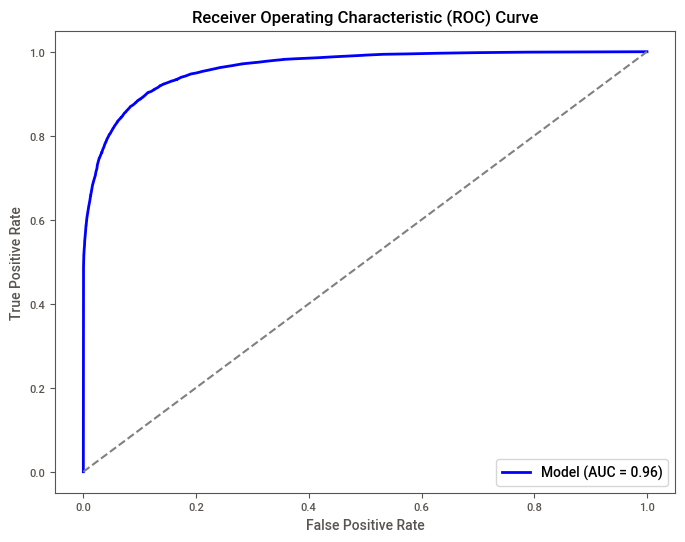

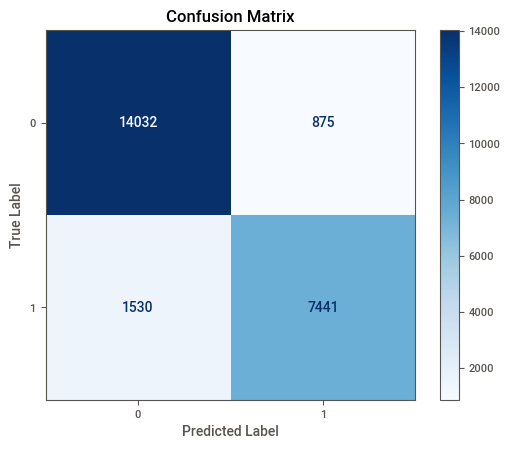

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)  # You can adjust n_estimators

start_time = time.time()
# Fit the model on the training data
rf_model.fit(X_train_scaled, y_train)

end_time = time.time()

# Predict on training data
y_train_pred = rf_model.predict(X_train_scaled)
y_train_pred_proba = rf_model.predict_proba(X_train_scaled)[:, 1]

# Make predictions on the test data
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]  # For AUC-ROC score

evaluate_model(rf_model,X_train_scaled,y_train, X_test_scaled,y_test, y_train_pred,y_pred, y_pred_proba)

**From the Confusion Matrix we can see that**

*   True Positive(TP): 7441

*   True Negative(TN): 14032

*   False Positive(FP): 875

*   False Negative(FN): 1530

____

**Calculates the training time, and estimates the total number of parameters by multiplying the number of nodes in the trees by the square root of the number of features, then uses this to compute an estimated cost.**

**sqrt(number of features) is considered for finding the best feature for splitting.**

In [ ]:
# Calculate the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.4f} seconds")

# Calculate the total number of parameters (approximation)
n_trees = len(rf_model.estimators_)
n_features = X_train_scaled.shape[1]
n_nodes = sum(tree.tree_.node_count for tree in rf_model.estimators_)

# Total number of parameters is the number of nodes multiplied by the square root of the number of features
total_parameters = n_nodes * np.sqrt(n_features)

print(f"Total Number of Parameters: {total_parameters}")

# Example cost function (simplistic)
cost = training_time * total_parameters
print(f"Estimated Cost: {cost:.4f}")

Training Time: 17.3680 seconds
Total Number of Parameters: 12563621.80603364
Estimated Cost: 218204417.7798


**Therefore we can see that the Random Forest Classifier Model is the costliest one but is gives the highest Accuracy among all the models.**

# XGBoost Classifier

**XGBoost classifier is an efficient implementation of gradient boosting that combines the predictions from multiple weak models (decision trees) to improve overall accuracy and robustness. It optimizes the performance through advanced techniques like regularization, parallel processing, and handling missing values.**

**Why we are using it- As it is excellent at capturing complex relationships, performs well even with imbalanced data, and can handle missing values effectively.**


*   **Model Training: Fits the XGBoost model on the training data.**

*   **Prediction and Evaluation: Makes predictions on the test data, computes evaluation metrics like accuracy, precision, recall, F1 score, and ROC AUC score.**


*   **Visualization: Plots the ROC curve to visualize the model's performance, highlighting the AUC score.**

Training Accuracy: 0.8982
Testing Accuracy: 0.8862
Precision: 0.8641
Recall: 0.8271
F1 Score: 0.8452
ROC AUC Score: 0.9563

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     14907
           1       0.86      0.83      0.85      8971

    accuracy                           0.89     23878
   macro avg       0.88      0.87      0.88     23878
weighted avg       0.89      0.89      0.89     23878



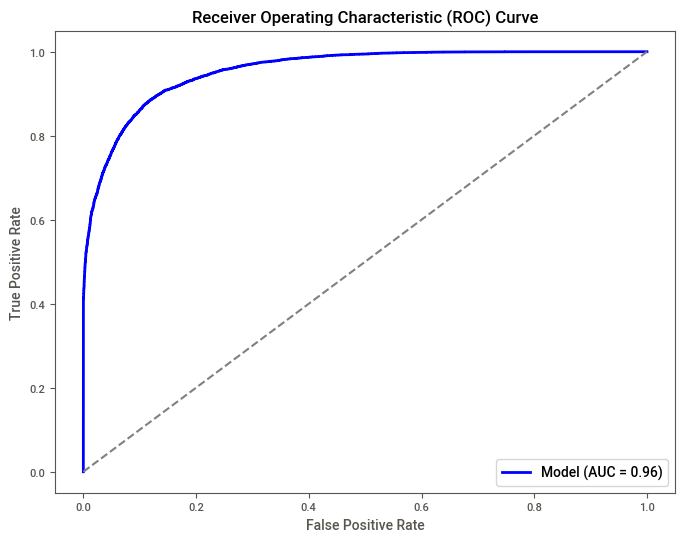

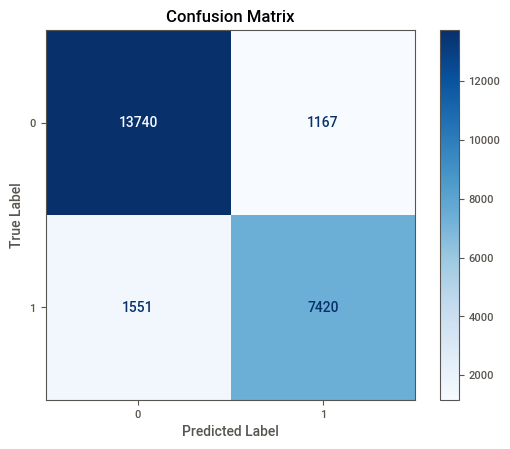

In [ ]:
# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42, n_estimators=100, use_label_encoder=False, eval_metric='logloss')

start_time = time.time()
# Fit the model on the training data
xgb_model.fit(X_train_scaled, y_train)
end_time = time.time()

# Predict on training data
y_train_pred = xgb_model.predict(X_train_scaled)
y_train_pred_proba = xgb_model.predict_proba(X_train_scaled)[:, 1]

# Make predictions on the test data
y_pred = xgb_model.predict(X_test_scaled)
y_pred_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]  # For AUC-ROC score

evaluate_model(xgb_model,X_train_scaled,y_train, X_test_scaled,y_test, y_train_pred,y_pred, y_pred_proba)

**From the Confusion Matrix we can see that**

*   True Positive(TP): 7420

*   True Negative(TN): 13740

*   False Positive(FP): 1167

*   False Negative(FN): 1551

______

**Calculates the total number of leaf nodes across all trees, estimates the number of parameters as the product of leaf nodes and features, and then computes a hypothetical training cost based on the training time and number of parameters.**

In [ ]:
# Calculate training time
training_time = end_time - start_time
print(f'Training Time: {training_time:.4f} seconds')

# Parse the model dump to count leaf nodes
model_dump = xgb_model.get_booster().get_dump(with_stats=True)
total_leaf_nodes = sum(tree.count('leaf') for tree in model_dump)

# Number of features
n_features = X_train_scaled.shape[1]

# Number of parameters as total leaf nodes multiplied by total number of features
num_parameters = total_leaf_nodes * n_features

print(f'Number of Parameters: {num_parameters}')

# Define a cost function (hypothetical example)
cost = training_time * num_parameters
print(f'Estimated Training Cost: {cost:.4f}')

Training Time: 0.7960 seconds
Number of Parameters: 120176
Estimated Training Cost: 95663.8212


**Therefore we can see that the XG-Boost Classifier Model is less costly than Random Forest Model and also gives Accuracy near to what Random Forest is giving.**

# Neural Networks
**Artificial Neural Networks (ANNs) simulate the brain's interconnected neuron structure to learn complex patterns and relationships from data. They are used for tasks like classification, regression, and prediction by adjusting weights through training to minimize errors.**

**Why it is used- As it is capable of capturing complex, non-linear relationships between the features and the target variable, availability of adequate data , highly flexible and can handle a wide variety of classification problems.**

**The ANN Model is applied on the whole dataset after dropping the reservation_status and reservation_status_date column.**



*   **Model Definition: It defines an Artificial Neural Network (ANN) with an input layer, two hidden layers, and an output layer. The first hidden layer uses ReLU activation, the second hidden layer also uses ReLU, and the output layer uses a sigmoid activation function.**


*   **Model Training: It compiles the model using the Adam optimizer with a learning rate of 0.001 and binary cross-entropy loss function, then trains the model on the scaled training data for 50 epochs with a batch size of 32.**

*   **Prediction and Evaluation: It makes predictions on the test data, calculates various evaluation metrics (accuracy, precision, recall, F1 score, ROC AUC), and prints these metrics. It also generates and plots the ROC curve.**


*   **Activation Functions and Optimizer:**

  **ReLU Activation: Used in hidden layers to introduce non-linearity and avoid issues like vanishing gradients.**

  **Sigmoid Activation: Used in the output layer for binary classification to produce a probability score between 0 and 1.**

  **Adam Optimizer: Chosen for its efficiency and adaptive learning rate, which helps in faster convergence during training.**








Epoch 1/50


2024-08-31 13:51:38.204561: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


2687/2687 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7838 - loss: 0.4462 - val_accuracy: 0.8274 - val_loss: 0.3694
Epoch 2/50
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8289 - loss: 0.3602 - val_accuracy: 0.8330 - val_loss: 0.3559
Epoch 3/50
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8355 - loss: 0.3476 - val_accuracy: 0.8357 - val_loss: 0.3464
Epoch 4/50
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8410 - loss: 0.3355 - val_accuracy: 0.8411 - val_loss: 0.3400
Epoch 5/50
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8436 - loss: 0.3334 - val_accuracy: 0.8431 - val_loss: 0.3357
Epoch 6/50
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8473 - loss: 0.3251 - val_accuracy: 0.8470 - val_loss: 0.3296
Epoch 7/50
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8475 - loss: 0.3234 - val_accuracy: 0.8470 - val_loss: 0.3268
Epoch 8/50
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8479 - loss: 0.3210 - val_accurac

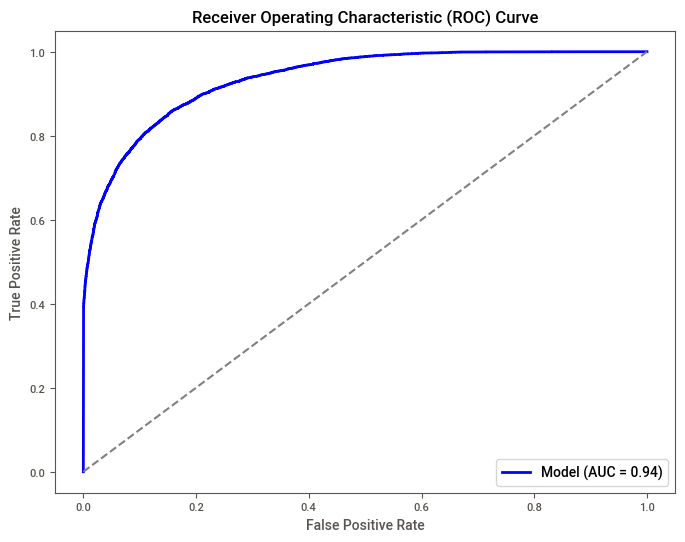

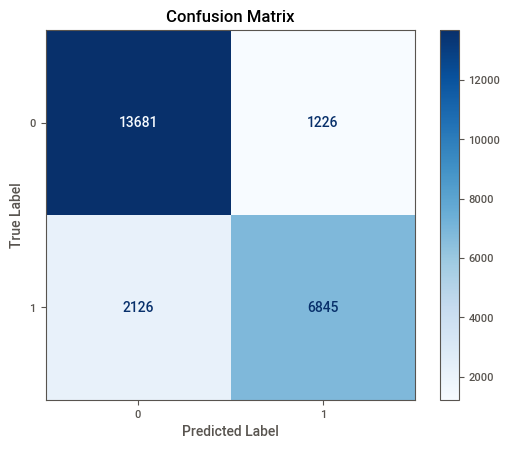

In [ ]:

# Define the ANN model
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))  # Input layer and first hidden layer
model.add(Dense(16, activation='relu'))  # Second hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
start_time = time.time()
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.1)
end_time = time.time()

# Predict on training data
y_train_pred_proba = model.predict(X_train_scaled).ravel()  # Predicted probabilities
y_train_pred = (y_train_pred_proba > 0.5).astype(int)  # Predicted classes

# Make predictions on the test data
y_pred_proba = model.predict(X_test_scaled).ravel()
y_pred = (y_pred_proba > 0.5).astype(int)

evaluate_model_ann(model,X_train_scaled,y_train, X_test_scaled,y_test, y_train_pred,y_pred, y_pred_proba)

**From the Confusion Matrix we can see that**

*   True Positive(TP): 7083

*   True Negative(TN): 13486

*   False Positive(FP): 1421

*   False Negative(FN): 1888

____

**This code measures the training time of an ANN model, calculates the total number of model parameters, and computes the cost as the product of training time and total parameters.**

In [ ]:
# Measure the training time

training_time = end_time - start_time

# Calculate the number of parameters
total_params = model.count_params()

# Calculate the cost as training_time * total_params
cost = training_time * total_params

print(f'Training Time: {training_time:.2f} seconds')
print(f'Total Parameters: {total_params}')
print(f'Total Cost: {cost:.4f}')


Training Time: 210.88 seconds
Total Parameters: 1505
Total Cost: 317380.9041


**Therefore we can see that ANN Model is costlier and is also giving lower Accuracy.**
___

**Unimportant features are dropped from the Dataframe which are: 'arrival_date_year',     'babies'  ,'adr' ,    'hotel',  'is_repeated_guest',    'meal'**

In [ ]:
df = df.drop(columns=['arrival_date_year', 'babies','adr','hotel','is_repeated_guest','meal'], errors='ignore')
df.head()

is_canceled  lead_time  arrival_date_month  arrival_date_week_number  \
0            0        342                   5                        27   
1            0        737                   5                        27   
2            0          7                   5                        27   
3            0         13                   5                        27   
4            0         14                   5                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   

   adults  children  country  ...  reserved_room_type  assigned_room_type  \
0       2       0.0      135  ...                   2                   2   
1       2       0.0      135  ...                   2                   2   
2       1       0.0       59  ...                   0                   2   
3       1       0.0       59  ...                   0                   0   
4       2       0.0       59  ...                   0                   0   

   booking_changes  deposit_type  agent  company  days_in_waiting_list  \
0                3             0   -1.0     -1.0                     0   
1                4             0   -1.0     -1.0                     0   
2                0             0   -1.0     -1.0                     0   
3                0             0  304.0     -1.0                     0   
4                0             0  240.0     -1.0                     0   

   customer_type  required_car_parking_spaces  total_of_special_requests  
0              2                            0                          0  
1              2                            0                          0  
2              2                            0                          0  
3              2                            0                          0  
4              2                            0                          1  

[5 rows x 24 columns]

### Case 2: Here we are applying all the models after dropping the unimportant features arrival_date_year , babies , adr , hotel , is_repeated_guest , meal as seen from the Exploratory Data Analysis(EDA).

## **Logistic Regression**
**The Logistic Regression Model is applied over here after dropping the unimportant features from the Dataframe.**

**Why we have used it- As it helps in modelling the probability of a binary outcome based on the remaining relevant features, improving interpretability and potentially enhancing performance by focusing on significant predictors.**




Training Accuracy: 0.7922
Testing Accuracy: 0.7946
Precision: 0.8214
Recall: 0.5792
F1 Score: 0.6793
ROC AUC Score: 0.8640

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.92      0.85     14907
           1       0.82      0.58      0.68      8971

    accuracy                           0.79     23878
   macro avg       0.80      0.75      0.76     23878
weighted avg       0.80      0.79      0.79     23878



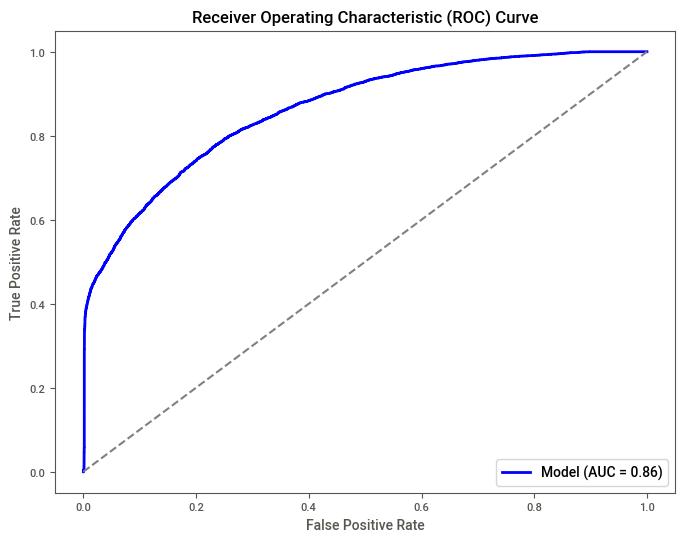

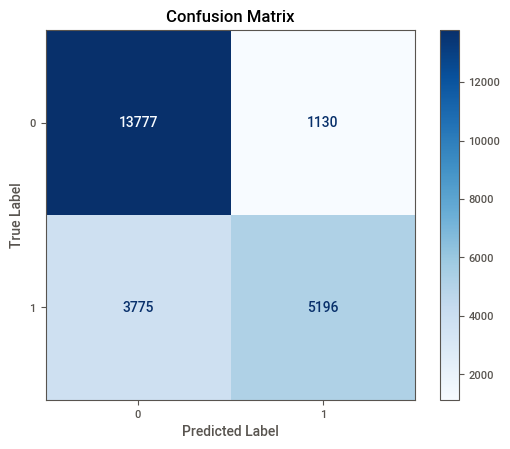

In [ ]:
# Split the data into features (X) and target (y)
X = df.drop('is_canceled', axis=1)  # Assuming 'is_canceled' is the target column
y = df['is_canceled']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

start_time = time.time()
# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
end_time = time.time()

# Fit the model on the training data
log_reg.fit(X_train_scaled, y_train)

# Predict on training data
y_train_pred = log_reg.predict(X_train_scaled)
y_train_pred_proba = log_reg.predict_proba(X_train_scaled)[:, 1]

# Make predictions on the test data
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]  # For AUC-ROC score

evaluate_model(log_reg,X_train_scaled,y_train, X_test_scaled,y_test, y_train_pred,y_pred, y_pred_proba)

**From the Confusion Matrix we can see that**

*   True Positive(TP): 5196

*   True Negative(TN): 13777

*   False Positive(FP): 1130

*   False Negative(FN): 3775

In [ ]:

# Calculate the training time
training_time = end_time - start_time

# Calculate the number of parameters
n_parameters = X_train_scaled.shape[1] + 1  # Number of features + 1 for the intercept

# Calculate the cost (arbitrary formula)
# Cost function could be customized as needed, e.g., proportional to training time and number of parameters
cost = training_time * n_parameters

# Print the training time, number of parameters, and cost
print(f'Training Time: {training_time:.4f} seconds')
print(f'Number of Parameters: {n_parameters}')
print(f'Cost of Logistic Regression: {cost:.4f}')

Training Time: 0.0001 seconds
Number of Parameters: 24
Cost of Logistic Regression: 0.0031


**Therefore we can see that the Logistic Regression Model is less costly but also has low Accuracy.**

## Random Forest Classifier
**The Random Forest Model is applied over here after dropping the unimportant features from the Dataframe.**

**Why we have used it- As it builds multiple decision trees based on the remaining relevant features to predict the target variable, potentially improving accuracy and reducing model complexity.**

Training Accuracy: 0.9949
Testing Accuracy: 0.8924
Precision: 0.8885
Recall: 0.8161
F1 Score: 0.8507
ROC AUC Score: 0.9572

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     14907
           1       0.89      0.82      0.85      8971

    accuracy                           0.89     23878
   macro avg       0.89      0.88      0.88     23878
weighted avg       0.89      0.89      0.89     23878



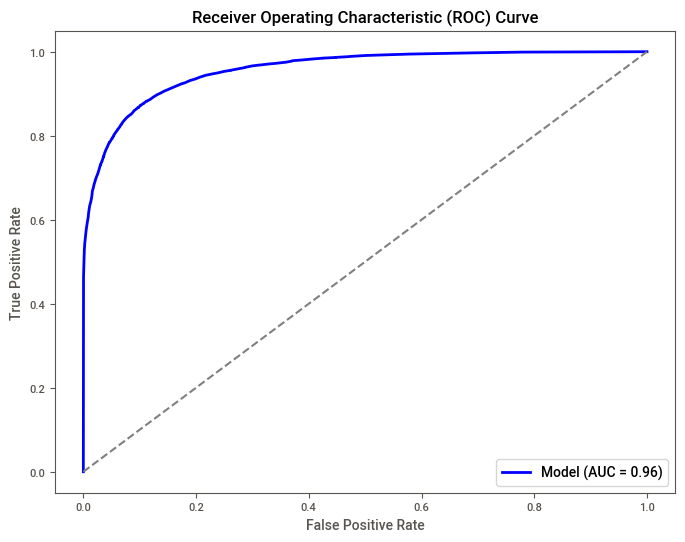

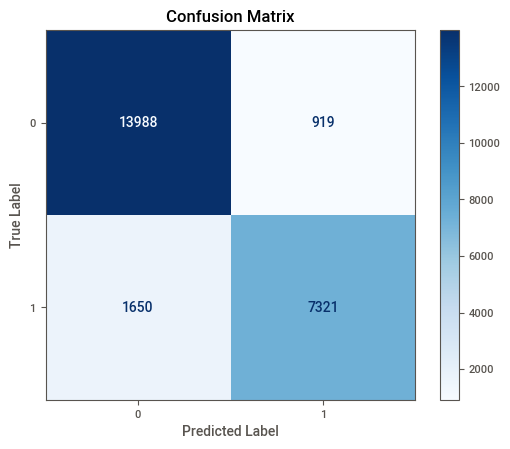

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)  # You can adjust n_estimators

start_time = time.time()
# Fit the model on the training data
rf_model.fit(X_train_scaled, y_train)
end_time = time.time()

# Predict on training data
y_train_pred = rf_model.predict(X_train_scaled)
y_train_pred_proba = rf_model.predict_proba(X_train_scaled)[:, 1]


# Make predictions on the test data
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]  # For AUC-ROC score

evaluate_model(rf_model,X_train_scaled,y_train, X_test_scaled,y_test, y_train_pred,y_pred, y_pred_proba)

**From the Confusion Matrix we can see that**

*   True Positive(TP): 7321

*   True Negative(TN): 13988

*   False Positive(FP): 919

*   False Negative(FN): 1650

In [ ]:
# Calculate the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.4f} seconds")

# Calculate the total number of parameters (approximation)
n_trees = len(rf_model.estimators_)
n_features = X_train_scaled.shape[1]
n_nodes = sum(tree.tree_.node_count for tree in rf_model.estimators_)

# Total number of parameters is the number of nodes multiplied by the square root of the number of features
total_parameters = n_nodes * np.sqrt(n_features)

print(f"Total Number of Parameters: {total_parameters}")

# Example cost function (simplistic)
cost = training_time * total_parameters
print(f"Estimated Cost: {cost:.4f}")

Training Time: 14.4266 seconds
Total Number of Parameters: 12394193.522240646
Estimated Cost: 178806296.5931


**Therefore we can see that the Random Forest Classifier Model is the costliest one but is gives the highest Accuracy among all the models.**

## **XG Boost Classifier**

**XG Boost Classifier model is applied over here after removing the unimportant features from the Dataframe.**

**Why we have used it- As it trains an ensemble of decision trees on the remaining relevant features, optimizing model performance by focusing on the most significant predictors.**





Training Accuracy: 0.8901
Testing Accuracy: 0.8794
Precision: 0.8613
Recall: 0.8094
F1 Score: 0.8345
ROC AUC Score: 0.9517

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91     14907
           1       0.86      0.81      0.83      8971

    accuracy                           0.88     23878
   macro avg       0.88      0.87      0.87     23878
weighted avg       0.88      0.88      0.88     23878



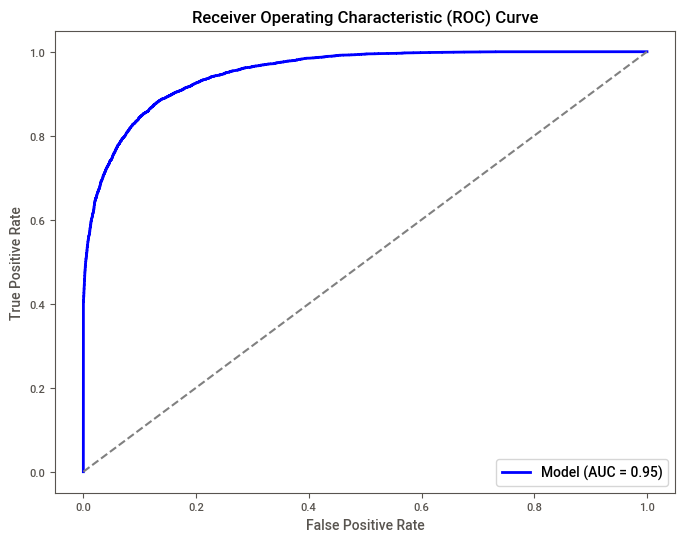

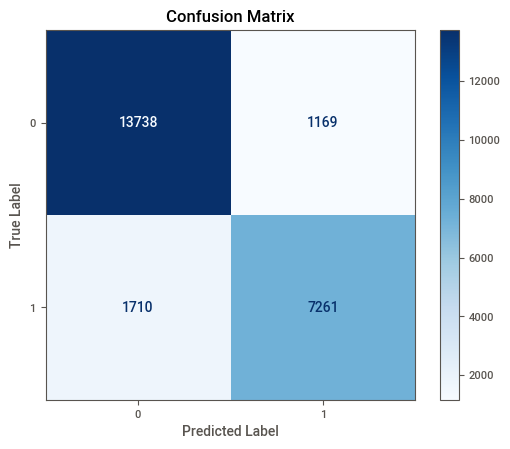

In [ ]:
# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42, n_estimators=100, use_label_encoder=False, eval_metric='logloss')

# Fit the model on the training data
start_time = time.time()
xgb_model.fit(X_train_scaled, y_train)
end_time = time.time()

# Predict on training data
y_train_pred = xgb_model.predict(X_train_scaled)
y_train_pred_proba = xgb_model.predict_proba(X_train_scaled)[:, 1]

# Make predictions on the test data
y_pred = xgb_model.predict(X_test_scaled)
y_pred_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]  # For AUC-ROC score

evaluate_model(xgb_model,X_train_scaled,y_train, X_test_scaled,y_test, y_train_pred,y_pred, y_pred_proba)

**From the Confusion Matrix we can see that**

*   True Positive(TP): 7261

*   True Negative(TN): 13738

*   False Positive(FP): 1169

*   False Negative(FN): 1710



In [ ]:
# Calculate training time
training_time = end_time - start_time
print(f'Training Time: {training_time:.4f} seconds')

# Parse the model dump to count leaf nodes
model_dump = xgb_model.get_booster().get_dump(with_stats=True)
total_leaf_nodes = sum(tree.count('leaf') for tree in model_dump)

# Number of features
n_features = X_train_scaled.shape[1]

# Number of parameters as total leaf nodes multiplied by total number of features
num_parameters = total_leaf_nodes * n_features

print(f'Number of Parameters: {num_parameters}')

# Define a cost function (hypothetical example)
cost = training_time * num_parameters
print(f'Estimated Training Cost: {cost:.4f}')

Training Time: 0.6619 seconds
Number of Parameters: 96393
Estimated Training Cost: 63803.0135


**Therefore we can see that the XG-Boost Classifier Model is less costly than Random Forest Model and also gives Accuracy near to what Random Forest is giving.**

## Neural Networks(ANN)

**Neural Networks(ANN) Classifier model is applied over here after removing the unimportant features from the Dataframe.**

**Why it is used- As it learns complex patterns and relationships in the remaining relevant data through multiple layers of interconnected neurons, improving prediction accuracy.**

Epoch 1/50
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7720 - loss: 0.4570 - val_accuracy: 0.8217 - val_loss: 0.3771
Epoch 2/50
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8220 - loss: 0.3715 - val_accuracy: 0.8244 - val_loss: 0.3656
Epoch 3/50
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8297 - loss: 0.3581 - val_accuracy: 0.8272 - val_loss: 0.3606
Epoch 4/50
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8329 - loss: 0.3516 - val_accuracy: 0.8291 - val_loss: 0.3562
Epoch 5/50
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8323 - loss: 0.3504 - val_accuracy: 0.8334 - val_loss: 0.3524
Epoch 6/50
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8365 - loss: 0.3449 - val_accuracy: 0.8309 - val_loss: 0.3521
Epoch 7/50
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8336 - loss: 0.3473 - val_accuracy: 0.8338 - val_loss: 0.3480
Epoch 8/50
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8394 - loss: 0.3385 - 

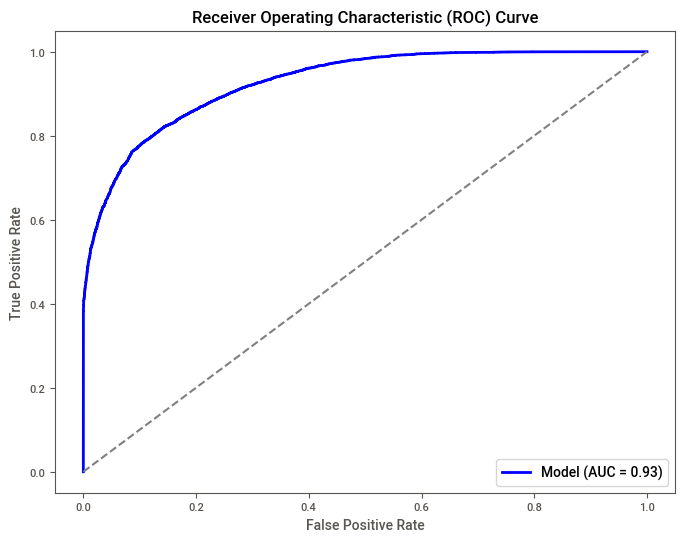

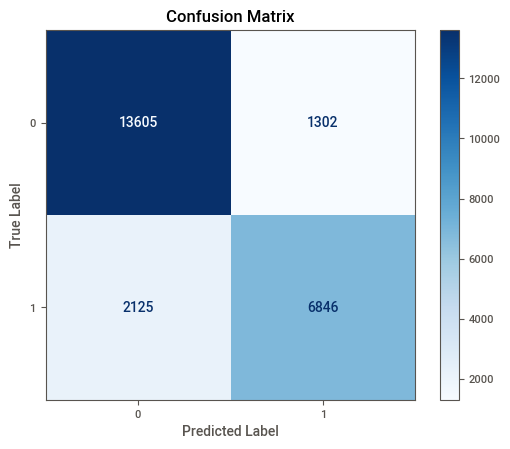

In [ ]:
# Define the ANN model
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))  # Input layer and first hidden layer
model.add(Dense(16, activation='relu'))  # Second hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
start_time = time.time()
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.1)
end_time = time.time()

# Predict on training data
y_train_pred_proba = model.predict(X_train_scaled).ravel()  # Predicted probabilities
y_train_pred = (y_train_pred_proba > 0.5).astype(int)  # Predicted classes

# Make predictions on the test data
y_pred_proba = model.predict(X_test_scaled).ravel()
y_pred = (y_pred_proba > 0.5).astype(int)

evaluate_model_ann(model,X_train_scaled,y_train, X_test_scaled,y_test, y_train_pred,y_pred, y_pred_proba)

**From the Confusion Matrix we can see that**

*   True Positive(TP): 6928

*   True Negative(TN): 13317

*   False Positive(FP): 1590

*   False Negative(FN): 2043

In [ ]:
# Calculate training time
training_time = end_time - start_time
print(f'Training Time: {training_time:.4f} seconds')

# Calculate the number of parameters
total_params = model.count_params()

# Calculate the cost as training_time * total_params
cost = training_time * total_params

print(f'Training Time: {training_time:.2f} seconds')
print(f'Total Parameters: {total_params}')
print(f'Total Cost: {cost:.4f}')

Training Time: 205.1125 seconds
Training Time: 205.11 seconds
Total Parameters: 1313
Total Cost: 269312.6505


**Therefore we can see that the ANN Classifier is costlier and is also having low Accuracy.**

___

**The distribution_channel column is dropped from the Dataframe as its values are getting overlapped with market_segment.**

In [ ]:
df = df.drop(columns=['distribution_channel'], errors='ignore')
df.head()

is_canceled  lead_time  arrival_date_month  arrival_date_week_number  \
0            0        342                   5                        27   
1            0        737                   5                        27   
2            0          7                   5                        27   
3            0         13                   5                        27   
4            0         14                   5                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   

   adults  children  country  ...  reserved_room_type  assigned_room_type  \
0       2       0.0      135  ...                   2                   2   
1       2       0.0      135  ...                   2                   2   
2       1       0.0       59  ...                   0                   2   
3       1       0.0       59  ...                   0                   0   
4       2       0.0       59  ...                   0                   0   

   booking_changes  deposit_type  agent  company  days_in_waiting_list  \
0                3             0   -1.0     -1.0                     0   
1                4             0   -1.0     -1.0                     0   
2                0             0   -1.0     -1.0                     0   
3                0             0  304.0     -1.0                     0   
4                0             0  240.0     -1.0                     0   

   customer_type  required_car_parking_spaces  total_of_special_requests  
0              2                            0                          0  
1              2                            0                          0  
2              2                            0                          0  
3              2                            0                          0  
4              2                            0                          1  

[5 rows x 23 columns]

### Case 3: Here we are applying all the models after dropping the distribution_channel column as it has many overlapped values with market_segment.

## Logistic Regression
**The Logistic Regression Model is applied over here after dropping the distribution_channel column.**

Training Accuracy: 0.7887
Testing Accuracy: 0.7887
Precision: 0.8185
Recall: 0.5621
F1 Score: 0.6665
ROC AUC Score: 0.8619

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85     14907
           1       0.82      0.56      0.67      8971

    accuracy                           0.79     23878
   macro avg       0.80      0.74      0.76     23878
weighted avg       0.79      0.79      0.78     23878



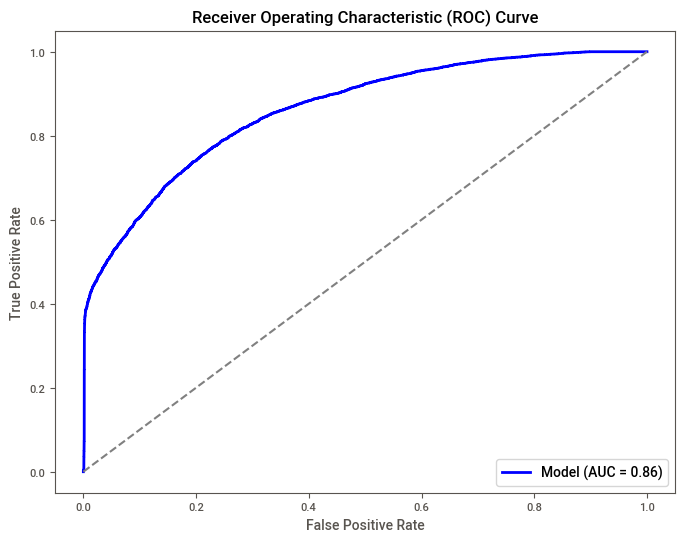

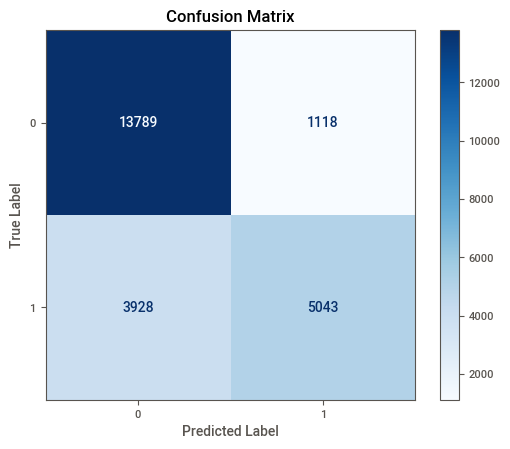

In [ ]:
# Split the data into features (X) and target (y)
X = df.drop('is_canceled', axis=1)  # Assuming 'is_canceled' is the target column
y = df['is_canceled']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
start_time = time.time()
log_reg = LogisticRegression(random_state=42)
end_time = time.time()

# Fit the model on the training data
log_reg.fit(X_train_scaled, y_train)

# Predict on training data
y_train_pred = log_reg.predict(X_train_scaled)
y_train_pred_proba = log_reg.predict_proba(X_train_scaled)[:, 1]

# Make predictions on the test data
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]  # For AUC-ROC score

evaluate_model(log_reg,X_train_scaled,y_train, X_test_scaled,y_test, y_train_pred,y_pred, y_pred_proba)

**From the Confusion Matrix we can see that**

*   True Positive(TP): 5043

*   True Negative(TN): 13789

*   False Positive(FP): 1118

*   False Negative(FN): 3928

In [ ]:
# Calculate the training time
training_time = end_time - start_time

# Calculate the number of parameters
n_parameters = X_train_scaled.shape[1] + 1  # Number of features + 1 for the intercept

# Calculate the cost (arbitrary formula)
# Cost function could be customized as needed, e.g., proportional to training time and number of parameters
cost = training_time * n_parameters

# Print the training time, number of parameters, and cost
print(f'Training Time: {training_time:.4f} seconds')
print(f'Number of Parameters: {n_parameters}')
print(f'Cost of Logistic Regression: {cost:.4f}')

Training Time: 0.0001 seconds
Number of Parameters: 23
Cost of Logistic Regression: 0.0021


**Therefore we can see that the Logistic Regression Model is less costly, but also has low Accuracy.**
____

## Random Forest Classifier

**The Random Forest Model is applied over here after dropping the distribution_channel column.**

Training Accuracy: 0.9949
Testing Accuracy: 0.8932
Precision: 0.8896
Recall: 0.8171
F1 Score: 0.8518
ROC AUC Score: 0.9574

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     14907
           1       0.89      0.82      0.85      8971

    accuracy                           0.89     23878
   macro avg       0.89      0.88      0.88     23878
weighted avg       0.89      0.89      0.89     23878



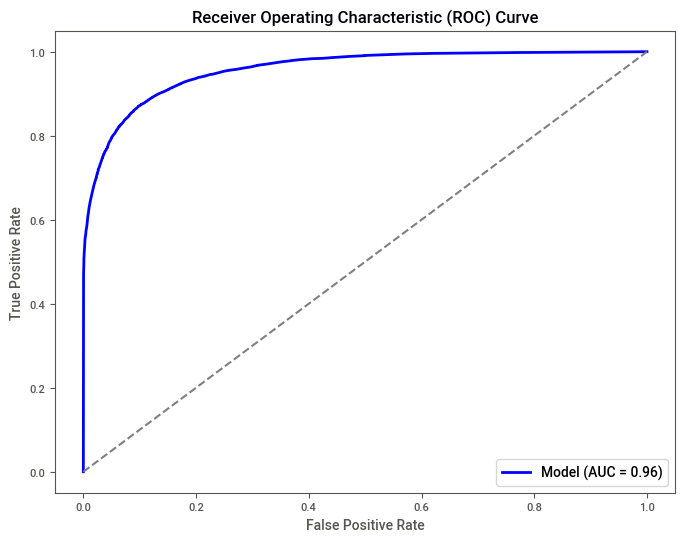

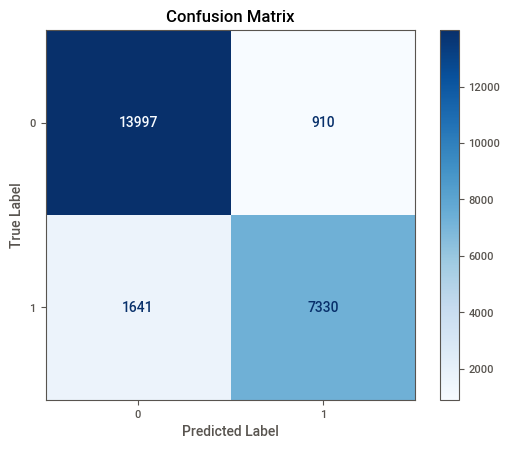

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)  # You can adjust n_estimators

# Fit the model on the training data
start_time = time.time()
rf_model.fit(X_train_scaled, y_train)
end_time = time.time()

# Predict on training data
y_train_pred = rf_model.predict(X_train_scaled)
y_train_pred_proba = rf_model.predict_proba(X_train_scaled)[:, 1]

# Make predictions on the test data
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]  # For AUC-ROC score

evaluate_model(rf_model,X_train_scaled,y_train, X_test_scaled,y_test, y_train_pred,y_pred, y_pred_proba)

**From the Confusion Matrix we can see that**

*   True Positive(TP): 7330

*   True Negative(TN): 13997

*   False Positive(FP): 910

*   False Negative(FN): 1641

In [ ]:
# Calculate the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.4f} seconds")

# Calculate the total number of parameters (approximation)
n_trees = len(rf_model.estimators_)
n_features = X_train_scaled.shape[1]
n_nodes = sum(tree.tree_.node_count for tree in rf_model.estimators_)

# Total number of parameters is the number of nodes multiplied by the square root of the number of features
total_parameters = n_nodes * np.sqrt(n_features)

print(f"Total Number of Parameters: {total_parameters}")

# Example cost function (simplistic)
cost = training_time * total_parameters
print(f"Estimated Cost: {cost:.4f}")

Training Time: 13.5238 seconds
Total Number of Parameters: 11942314.470244033
Estimated Cost: 161504893.1978


**Therefore we can see that the Random Forest Classifier Model is the costliest one but is gives the highest Accuracy among all the models.**

## XG-Boost Classifier

**The XG-Boost Model is applied over here after dropping the distribution_channel column.**

Training Accuracy: 0.8905
Testing Accuracy: 0.8794
Precision: 0.8610
Recall: 0.8097
F1 Score: 0.8346
ROC AUC Score: 0.9519

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91     14907
           1       0.86      0.81      0.83      8971

    accuracy                           0.88     23878
   macro avg       0.88      0.87      0.87     23878
weighted avg       0.88      0.88      0.88     23878



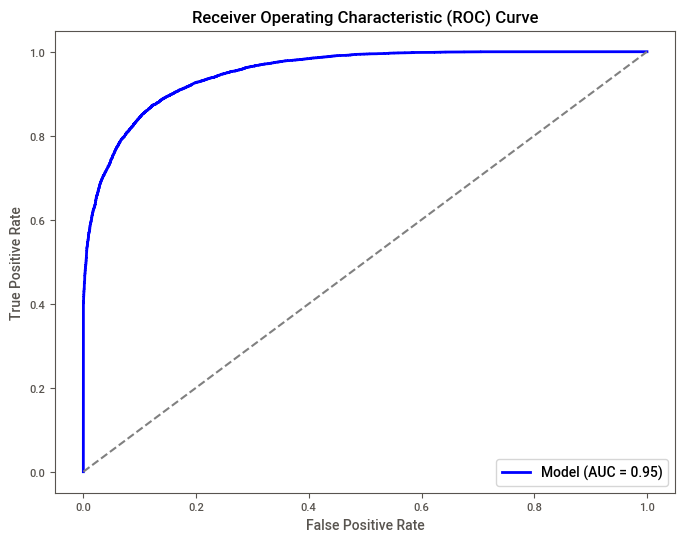

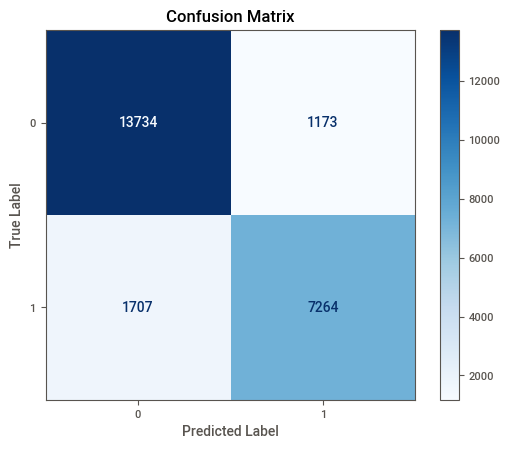

In [ ]:
# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42, n_estimators=100, use_label_encoder=False, eval_metric='logloss')

# Fit the model on the training data
start_time = time.time()
xgb_model.fit(X_train_scaled, y_train)
end_time = time.time()

# Predict on training data
y_train_pred = xgb_model.predict(X_train_scaled)
y_train_pred_proba = xgb_model.predict_proba(X_train_scaled)[:, 1]

# Make predictions on the test data
y_pred = xgb_model.predict(X_test_scaled)
y_pred_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]  # For AUC-ROC score

evaluate_model(xgb_model,X_train_scaled,y_train, X_test_scaled,y_test, y_train_pred,y_pred, y_pred_proba)

**From the Confusion Matrix we can see that**

*   True Positive(TP): 7264

*   True Negative(TN): 13734

*   False Positive(FP): 1173

*   False Negative(FN): 1707

In [ ]:
# Calculate training time
training_time = end_time - start_time
print(f'Training Time: {training_time:.4f} seconds')

# Parse the model dump to count leaf nodes
model_dump = xgb_model.get_booster().get_dump(with_stats=True)
total_leaf_nodes = sum(tree.count('leaf') for tree in model_dump)

# Number of features
n_features = X_train_scaled.shape[1]

# Number of parameters as total leaf nodes multiplied by total number of features
num_parameters = total_leaf_nodes * n_features

print(f'Number of Parameters: {num_parameters}')

# Define a cost function (hypothetical example)
cost = training_time * num_parameters
print(f'Estimated Training Cost: {cost:.4f}')

Training Time: 0.7647 seconds
Number of Parameters: 92246
Estimated Training Cost: 70544.3371


**Therefore we can see that the XG-Boost Classifier Model is less costly than Random Forest Model and also gives Accuracy near to what Random Forest is giving.**

## Neural Networks(ANN)

**The ANN Model is applied over here after dropping the distribution_channel column.**

Epoch 1/50
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7793 - loss: 0.4566 - val_accuracy: 0.8213 - val_loss: 0.3760
Epoch 2/50
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8202 - loss: 0.3712 - val_accuracy: 0.8262 - val_loss: 0.3656
Epoch 3/50
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8255 - loss: 0.3614 - val_accuracy: 0.8265 - val_loss: 0.3566
Epoch 4/50
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8300 - loss: 0.3547 - val_accuracy: 0.8285 - val_loss: 0.3548
Epoch 5/50
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8356 - loss: 0.3461 - val_accuracy: 0.8350 - val_loss: 0.3496
Epoch 6/50
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8372 - loss: 0.3438 - val_accuracy: 0.8303 - val_loss: 0.3500
Epoch 7/50
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8349 - loss: 0.3452 - val_accuracy: 0.8291 - val_loss: 0.3527
Epoch 8/50
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8378 - loss: 0.3413 - 

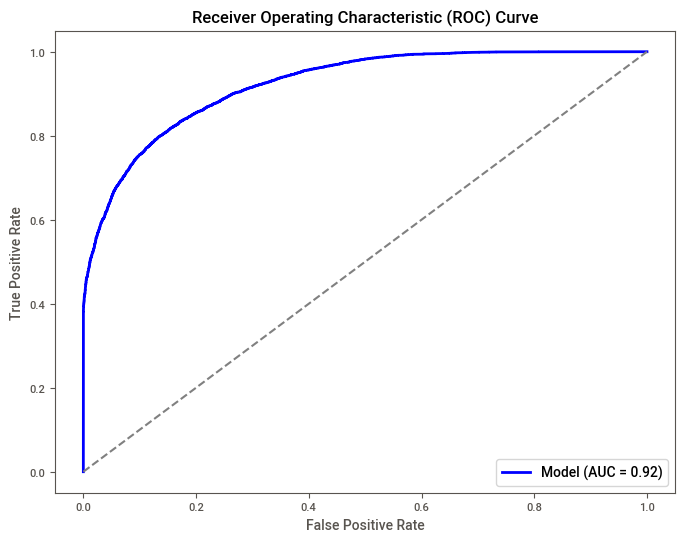

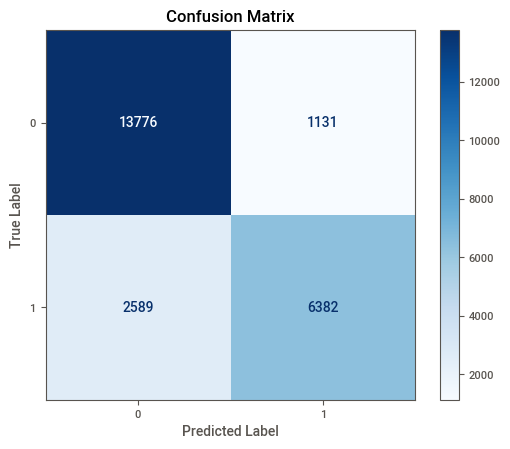

In [ ]:
# Define the ANN model
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))  # Input layer and first hidden layer
model.add(Dense(16, activation='relu'))  # Second hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
start_time = time.time()
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.1)
end_time = time.time()

# Predict on training data
y_train_pred_proba = model.predict(X_train_scaled).ravel()  # Predicted probabilities
y_train_pred = (y_train_pred_proba > 0.5).astype(int)  # Predicted classes

# Make predictions on the test data
y_pred_proba = model.predict(X_test_scaled).ravel()
y_pred = (y_pred_proba > 0.5).astype(int)

evaluate_model_ann(model,X_train_scaled,y_train, X_test_scaled,y_test, y_train_pred,y_pred, y_pred_proba)

**From the Confusion Matrix we can see that**

*   True Positive(TP): 6913

*   True Negative(TN): 13309

*   False Positive(FP): 1598

*   False Negative(FN): 2058

In [ ]:
training_time = end_time - start_time

# Calculate the number of parameters
total_params = model.count_params()

# Calculate the cost as training_time * total_params
cost = training_time * total_params

print(f'Training Time: {training_time:.2f} seconds')
print(f'Total Parameters: {total_params}')
print(f'Total Cost: {cost:.4f}')

Training Time: 211.42 seconds
Total Parameters: 1281
Total Cost: 270831.9957


**Therefore we can see that the ANN Classifier Model is costlier and also has low Accuracy.**

____

## User Interactive Test Case
### Here we are selecting the XG-Boost Classifier as the Test Case Model as we have seen from the Result Analysis that it is having a good balance between cost and accuracy

In [ ]:
# Dictionary of categorical feature encodings
category_mappings = {
    'country': {'ABW': 0, 'AGO': 1, 'AIA': 2, 'ALB': 3, 'AND': 4, 'ARE': 5, 'ARG': 6, 'ARM': 7, 'ASM': 8, 'ATA': 9,
                'ATF': 10, 'AUS': 11, 'AUT': 12, 'AZE': 13, 'BDI': 14, 'BEL': 15, 'BEN': 16, 'BFA': 17, 'BGD': 18,
                'BGR': 19, 'BHR': 20, 'BHS': 21, 'BIH': 22, 'BLR': 23, 'BOL': 24, 'BRA': 25, 'BRB': 26, 'BWA': 27,
                'CAF': 28, 'CHE': 29, 'CHL': 30, 'CHN': 31, 'CIV': 32, 'CMR': 33, 'CN': 34, 'COL': 35, 'COM': 36,
                'CPV': 37, 'CRI': 38, 'CUB': 39, 'CYM': 40, 'CYP': 41, 'CZE': 42, 'DEU': 43, 'DJI': 44, 'DMA': 45,
                'DNK': 46, 'DOM': 47, 'DZA': 48, 'ECU': 49, 'EGY': 50, 'ESP': 51, 'EST': 52, 'ETH': 53, 'FIN': 54,
                'FJI': 55, 'FRA': 56, 'FRO': 57, 'GAB': 58, 'GBR': 59, 'GEO': 60, 'GGY': 61, 'GHA': 62, 'GIB': 63,
                'GLP': 64, 'GNB': 65, 'GRC': 66, 'GTM': 67, 'GUY': 68, 'HKG': 69, 'HND': 70, 'HRV': 71, 'HUN': 72,
                'IDN': 73, 'IMN': 74, 'IND': 75, 'IRL': 76, 'IRN': 77, 'IRQ': 78, 'ISL': 79, 'ISR': 80, 'ITA': 81,
                'JAM': 82, 'JEY': 83, 'JOR': 84, 'JPN': 85, 'KAZ': 86, 'KEN': 87, 'KHM': 88, 'KIR': 89, 'KNA': 90,
                'KOR': 91, 'KWT': 92, 'LAO': 93, 'LBN': 94, 'LBY': 95, 'LCA': 96, 'LIE': 97, 'LKA': 98, 'LTU': 99,
                'LUX': 100, 'LVA': 101, 'MAC': 102, 'MAR': 103, 'MCO': 104, 'MDG': 105, 'MDV': 106, 'MEX': 107,
                'MKD': 108, 'MLI': 109, 'MLT': 110, 'MMR': 111, 'MNE': 112, 'MOZ': 113, 'MRT': 114, 'MUS': 115,
                'MWI': 116, 'MYS': 117, 'MYT': 118, 'NAM': 119, 'NCL': 120, 'NGA': 121, 'NIC': 122, 'NLD': 123,
                'NOR': 124, 'NPL': 125, 'NZL': 126, 'OMN': 127, 'PAK': 128, 'PAN': 129, 'PER': 130, 'PHL': 131,
                'PLW': 132, 'POL': 133, 'PRI': 134, 'PRT': 135, 'PRY': 136, 'PYF': 137, 'QAT': 138, 'ROU': 139,
                'RUS': 140, 'RWA': 141, 'SAU': 142, 'SDN': 143, 'SEN': 144, 'SGP': 145, 'SLE': 146, 'SLV': 147,
                'SMR': 148, 'SRB': 149, 'STP': 150, 'SUR': 151, 'SVK': 152, 'SVN': 153, 'SWE': 154, 'SYC': 155,
                'SYR': 156, 'TGO': 157, 'THA': 158, 'TJK': 159, 'TMP': 160, 'TUN': 161, 'TUR': 162, 'TWN': 163,
                'TZA': 164, 'UGA': 165, 'UKR': 166, 'UMI': 167, 'URY': 168, 'USA': 169, 'UZB': 170, 'VEN': 171,
                'VGB': 172, 'VNM': 173, 'ZAF': 174, 'ZMB': 175, 'ZWE': 176, np.nan: 177},
    'market_segment': {'Aviation': 0, 'Complementary': 1, 'Corporate': 2, 'Direct': 3, 'Groups': 4,
                       'Offline TA/TO': 5, 'Online TA': 6, 'Undefined': 7},
    'reserved_room_type': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'L': 8, 'P': 9},
    'assigned_room_type': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9,
                           'L': 10, 'P': 11},
    'deposit_type': {'No Deposit': 0, 'Non Refund': 1, 'Refundable': 2},
    'customer_type': {'Contract': 0, 'Group': 1, 'Transient': 2, 'Transient-Party': 3},
    'arrival_date_month': {'January': 0, 'February': 1, 'March': 2, 'April': 3, 'May': 4, 'June': 5, 'July': 6,
                           'August': 7, 'September': 8, 'October': 9, 'November': 10, 'December': 11},
}

# Define categorical and numerical columns
categorical_features = ['arrival_date_month', 'country', 'market_segment',
                        'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']

numeric_features = X.columns.difference(categorical_features).tolist()

# Example setup for label encoders
encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])
    encoders[feature] = le

# Fit the scaler on the numeric features of the training data
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

# Initialize the XGBoost classifier
#xgb_model = XGBClassifier(random_state=42, n_estimators=100, use_label_encoder=False, eval_metric='logloss')

# Train the model with the preprocessed data
xgb_model.fit(X, y)

# Function to take user input and predict cancellation
def predict_cancellation(xgb_model, scaler=None, encoders=None):
    print("\nWelcome to the Booking Cancellation Predictor!\n")
    print("Please enter the following details to predict if the booking will be canceled.\n")

    user_input = []

    # Collect user input for each feature
    for feature in X.columns:
        while True:
            if feature in numeric_features:
                try:
                    value = input(f"Enter value for {feature} (numeric): ")
                    value = float(value)
                    user_input.append(value)
                    break  # Exit the loop if input is valid
                except ValueError:
                    print(f"Invalid input for {feature}. Please enter a numeric value.")
            elif feature in categorical_features:
                value = input(f"Enter value for {feature} (categorical): ")
                # Map categorical values using category_mappings
                if value in category_mappings[feature]:
                    user_input.append(category_mappings[feature][value])
                    break  # Exit the loop if input is valid
                else:
                    print(f"Invalid input for {feature}. Please enter one of the valid values: {', '.join(category_mappings[feature].keys())}.")

    # Display the entered inputs for confirmation
    print("\nYou have entered the following details:")
    for feature, value in zip(X.columns, user_input):
        print(f"{feature}: {value}")

    # Confirm if the user wants to proceed or re-enter details
    while True:
        confirm = input("\nAre these details correct? (yes/no): ").strip().lower()
        if confirm == 'yes':
            break
        elif confirm == 'no':
            print("\nLet's enter the details again.\n")
            return predict_cancellation(xgb_model, scaler, encoders)  # Restart the input process
        else:
            print("Please enter 'yes' or 'no'.")

    # Convert user input into a DataFrame for prediction
    user_input_df = pd.DataFrame([user_input], columns=X.columns)

    # Apply preprocessing steps:
    # If the model requires scaling, apply the scaler
    if scaler:
        user_input_df[numeric_features] = scaler.transform(user_input_df[numeric_features])

    # Make prediction
    prediction = xgb_model.predict(user_input_df)
    prediction_proba = xgb_model.predict_proba(user_input_df)[:, 1]

    # Output the result
    if prediction[0] == 1:
        print(f"\nThe model predicts that the booking WILL be canceled with a probability of {prediction_proba[0]:.2f}.")
    else:
        print(f"\nThe model predicts that the booking WILL NOT be canceled with a probability of {1 - prediction_proba[0]:.2f}.")

# Call the prediction function
predict_cancellation(xgb_model, scaler, category_mappings)


Welcome to the Booking Cancellation Predictor!

Please enter the following details to predict if the booking will be canceled.



Enter value for lead_time (numeric):  85
Enter value for arrival_date_month (categorical):  July
Enter value for arrival_date_week_number (numeric):  27
Enter value for arrival_date_day_of_month (numeric):  1
Enter value for stays_in_weekend_nights (numeric):  0
Enter value for stays_in_week_nights (numeric):  3
Enter value for adults (numeric):  2
Enter value for children (numeric):  0
Enter value for country (categorical):  PRT
Enter value for market_segment (categorical):  Online TA
Enter value for previous_cancellations (numeric):  0
Enter value for previous_bookings_not_canceled (numeric):  0
Enter value for reserved_room_type (categorical):  A
Enter value for assigned_room_type (categorical):  A
Enter value for booking_changes (numeric):  0
Enter value for deposit_type (categorical):  No Deposit
Enter value for agent (numeric):  240
Enter value for company (numeric):  -1
Enter value for days_in_waiting_list (numeric):  0
Enter value for customer_type (categorical):  Transient
Ent


You have entered the following details:
lead_time: 85.0
arrival_date_month: 6
arrival_date_week_number: 27.0
arrival_date_day_of_month: 1.0
stays_in_weekend_nights: 0.0
stays_in_week_nights: 3.0
adults: 2.0
children: 0.0
country: 135
market_segment: 6
previous_cancellations: 0.0
previous_bookings_not_canceled: 0.0
reserved_room_type: 0
assigned_room_type: 0
booking_changes: 0.0
deposit_type: 0
agent: 240.0
company: -1.0
days_in_waiting_list: 0.0
customer_type: 2
required_car_parking_spaces: 0.0
total_of_special_requests: 1.0



Are these details correct? (yes/no):  yes



The model predicts that the booking WILL be canceled with a probability of 0.71.


**In our dataset also the class label of this input is 1 i.e the booking will be cancelled and out model has correctly predicted it.**

**The rows of company column containing missing values are dropped.**

In [ ]:
# Drop rows where the 'company' column has a value of -1
df = df[df['company'] != -1]

### Case 4: Here we are applying all the models after dropping the rows of company column which contains missing values.

## Logistic Regression

Training Accuracy: 0.8948
Testing Accuracy: 0.8831
Precision: 0.8971
Recall: 0.4569
F1 Score: 0.6055
ROC AUC Score: 0.8750

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1093
           1       0.90      0.46      0.61       267

    accuracy                           0.88      1360
   macro avg       0.89      0.72      0.77      1360
weighted avg       0.88      0.88      0.87      1360



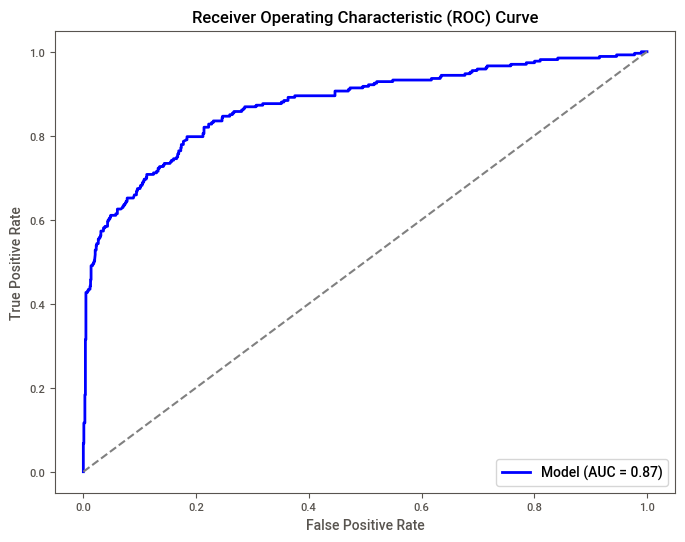

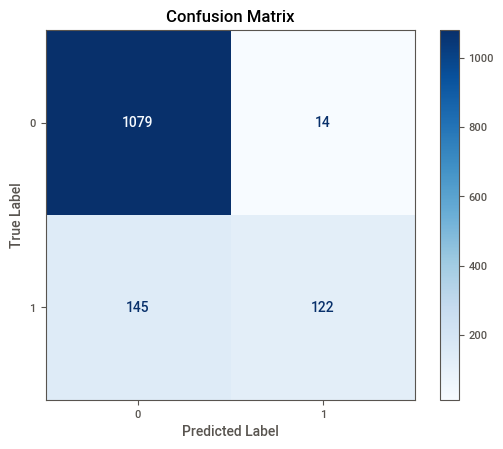

In [ ]:
# Split the data into features (X) and target (y)
X = df.drop('is_canceled', axis=1)  # Assuming 'is_canceled' is the target column
y = df['is_canceled']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Measure the start time
start_time = time.time()

# Fit the model on the training data
log_reg.fit(X_train_scaled, y_train)
# Measure the end time
end_time = time.time()

# Predict on training data
y_train_pred = log_reg.predict(X_train_scaled)
y_train_pred_proba = log_reg.predict_proba(X_train_scaled)[:, 1]


# Make predictions on the test data
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]  # For AUC-ROC score

evaluate_model(log_reg,X_train_scaled,y_train, X_test_scaled,y_test, y_train_pred,y_pred, y_pred_proba)

In [ ]:

# Calculate the training time
training_time = end_time - start_time

# Calculate the number of parameters
n_parameters = X_train_scaled.shape[1] + 1  # Number of features + 1 for the intercept

# Calculate the cost (arbitrary formula)
# Cost function could be customized as needed, e.g., proportional to training time and number of parameters
cost = training_time * n_parameters

# Print the training time, number of parameters, and cost
print(f'Training Time: {training_time:.4f} seconds')
print(f'Number of Parameters: {n_parameters}')
print(f'Cost of Logistic Regression: {cost:.4f}')

Training Time: 0.0509 seconds
Number of Parameters: 23
Cost of Logistic Regression: 1.1703


## Random Forest Classifier

Training Accuracy: 0.9932
Testing Accuracy: 0.9191
Precision: 0.9337
Recall: 0.6330
F1 Score: 0.7545
ROC AUC Score: 0.9293

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1093
           1       0.93      0.63      0.75       267

    accuracy                           0.92      1360
   macro avg       0.93      0.81      0.85      1360
weighted avg       0.92      0.92      0.91      1360



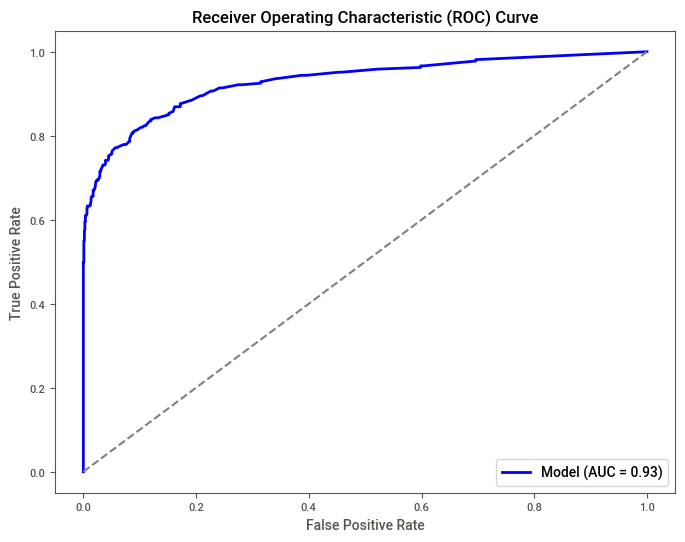

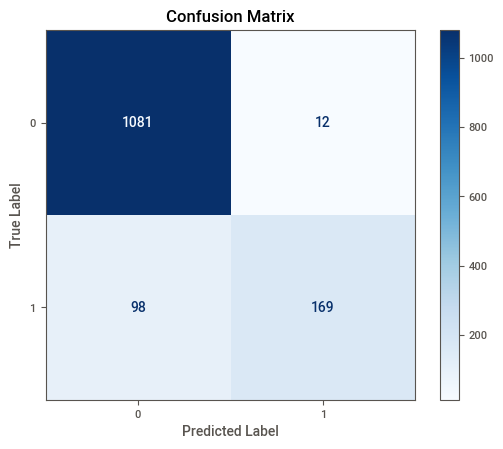

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)  # You can adjust n_estimators

# Measure the start time
start_time = time.time()

# Fit the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Measure the end time
end_time = time.time()

# Predict on training data
y_train_pred = rf_model.predict(X_train_scaled)
y_train_pred_proba = rf_model.predict_proba(X_train_scaled)[:, 1]


# Make predictions on the test data
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]  # For AUC-ROC score

evaluate_model(rf_model,X_train_scaled,y_train, X_test_scaled,y_test, y_train_pred,y_pred, y_pred_proba)

In [ ]:
# Calculate the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.4f} seconds")

# Calculate the total number of parameters (approximation)
n_trees = len(rf_model.estimators_)
n_features = X_train_scaled.shape[1]
n_nodes = sum(tree.tree_.node_count for tree in rf_model.estimators_)

# Total number of parameters is the number of nodes multiplied by the square root of the number of features
total_parameters = n_nodes * np.sqrt(n_features)

print(f"Total Number of Parameters: {total_parameters}")

# Example cost function (simplistic)
cost = training_time * total_parameters
print(f"Estimated Cost: {cost:.4f}")

Training Time: 0.6079 seconds
Total Number of Parameters: 506152.14547406597
Estimated Cost: 307706.1320


## XG-Boost Classifier

Training Accuracy: 0.9794
Testing Accuracy: 0.9162
Precision: 0.8964
Recall: 0.6479
F1 Score: 0.7522
ROC AUC Score: 0.9293

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1093
           1       0.90      0.65      0.75       267

    accuracy                           0.92      1360
   macro avg       0.91      0.81      0.85      1360
weighted avg       0.91      0.92      0.91      1360



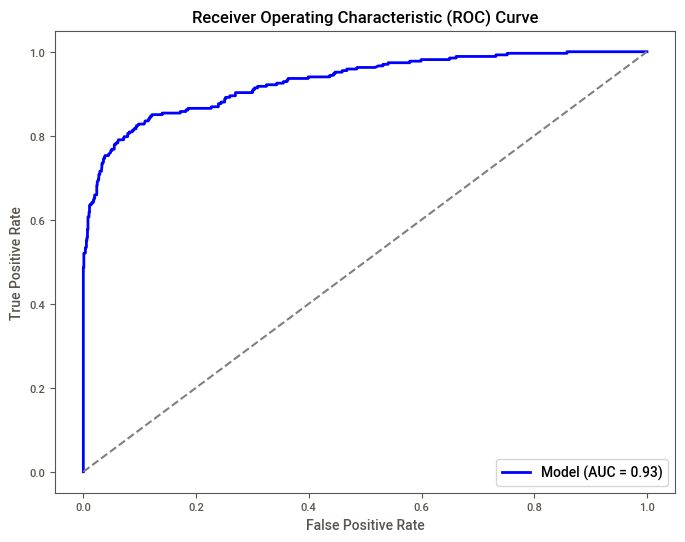

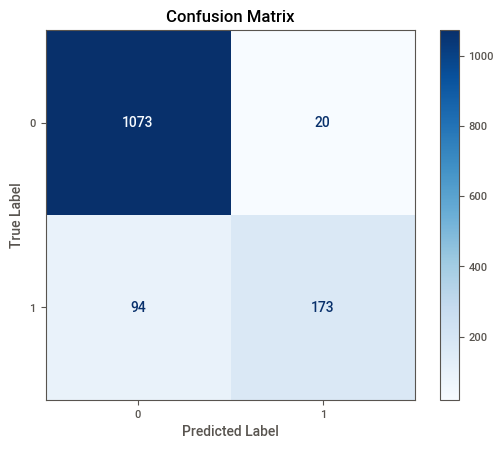

In [ ]:

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42, n_estimators=100, use_label_encoder=False, eval_metric='logloss')

# Start time before training
start_time = time.time()

# Fit the model on the training data
xgb_model.fit(X_train_scaled, y_train)

# End time after training
end_time = time.time()

# Predict on training data
y_train_pred = xgb_model.predict(X_train_scaled)
y_train_pred_proba = xgb_model.predict_proba(X_train_scaled)[:, 1]

# Make predictions on the test data
y_pred = xgb_model.predict(X_test_scaled)
y_pred_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]  # For AUC-ROC score

evaluate_model(xgb_model,X_train_scaled,y_train, X_test_scaled,y_test, y_train_pred,y_pred, y_pred_proba)

In [ ]:
# Calculate training time
training_time = end_time - start_time
print(f'Training Time: {training_time:.4f} seconds')

# Parse the model dump to count leaf nodes
model_dump = xgb_model.get_booster().get_dump(with_stats=True)
total_leaf_nodes = sum(tree.count('leaf') for tree in model_dump)

# Number of features
n_features = X_train_scaled.shape[1]

# Number of parameters as total leaf nodes multiplied by total number of features
num_parameters = total_leaf_nodes * n_features

print(f'Number of Parameters: {num_parameters}')

# Define a cost function (hypothetical example)
cost = training_time * num_parameters
print(f'Estimated Training Cost: {cost:.4f}')

Training Time: 0.1344 seconds
Number of Parameters: 57332
Estimated Training Cost: 7707.7656


## Neural Networks(ANN)

Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8142 - loss: 0.4723 - val_accuracy: 0.8254 - val_loss: 0.3393
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8677 - loss: 0.3352 - val_accuracy: 0.9099 - val_loss: 0.2720
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9018 - loss: 0.2780 - val_accuracy: 0.9191 - val_loss: 0.2487
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9102 - loss: 0.2561 - val_accuracy: 0.9154 - val_loss: 0.2437
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9132 - loss: 0.2353 - val_accuracy: 0.9173 - val_loss: 0.2453
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9043 - loss: 0.2470 - val_accuracy: 0.9228 - val_loss: 0.2415
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9098 - loss: 0.2272 - val_accuracy: 0.9173 - val_loss: 0.2370
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9131 - loss: 0.2249 - val_accuracy: 0.

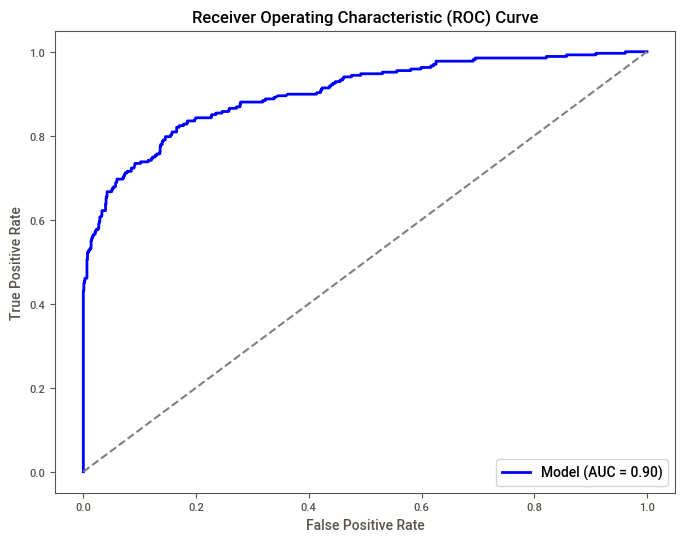

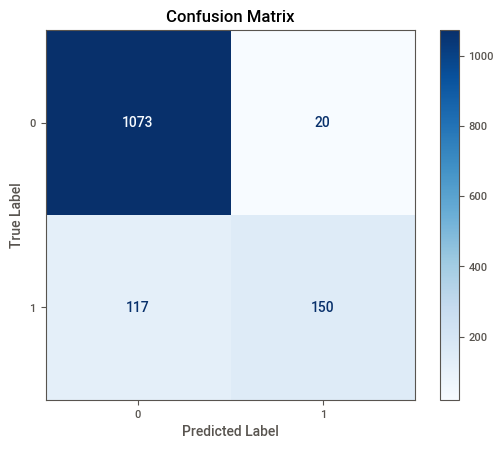

In [ ]:
# Define the ANN model
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))  # Input layer and first hidden layer
model.add(Dense(16, activation='relu'))  # Second hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.1)

end_time=time.time()
# Predict on training data
y_train_pred_proba = model.predict(X_train_scaled).ravel()  # Predicted probabilities
y_train_pred = (y_train_pred_proba > 0.5).astype(int)  # Predicted classes

# Make predictions on the test data
y_pred_proba = model.predict(X_test_scaled).ravel()
y_pred = (y_pred_proba > 0.5).astype(int)

evaluate_model_ann(model,X_train_scaled,y_train, X_test_scaled,y_test, y_train_pred,y_pred, y_pred_proba)

In [ ]:
training_time = end_time - start_time

# Calculate the number of parameters
total_params = model.count_params()

# Calculate the cost as training_time * total_params
cost = training_time * total_params

print(f'Training Time: {training_time:.2f} seconds')
print(f'Total Parameters: {total_params}')
print(f'Total Cost: {cost:.4f}')

Training Time: 15.77 seconds
Total Parameters: 1281
Total Cost: 20205.2212


In [ ]:
num_rows_after_dropping = df.shape[0]

print(f'Number of rows after dropping: {num_rows_after_dropping}')

Number of rows after dropping: 6797


# Result Analysis

## Case 1:

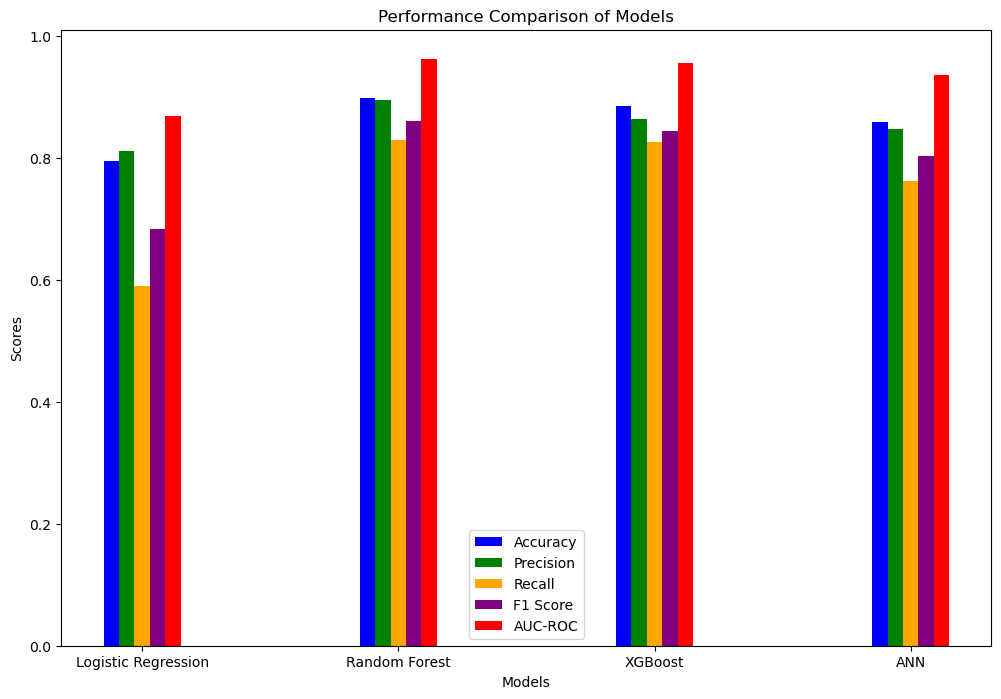

In [ ]:
# Define models and their corresponding performance metrics
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'ANN']
accuracy_scores = [0.7947, 0.8993, 0.8862, 0.8596]
precision_scores = [0.8117, 0.8948, 0.8641, 0.8481]
recall_scores = [0.5907, 0.8295, 0.8271, 0.7630]
f1_scores = [0.6838, 0.8609, 0.8452, 0.8033]
aucroc_scores = [0.8686, 0.9625, 0.9563, 0.9360]

# Define the width of each bar and the positions on the x-axis
bar_width = 0.15
x = np.arange(len(models))*2.5

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot bars for each metric
bars1 = ax.bar(x - 2*bar_width, accuracy_scores, bar_width, label='Accuracy', color='b')
bars2 = ax.bar(x - bar_width, precision_scores, bar_width, label='Precision', color='g')
bars3 = ax.bar(x, recall_scores, bar_width, label='Recall', color='orange')
bars4 = ax.bar(x + bar_width, f1_scores, bar_width, label='F1 Score', color='purple')
bars5 = ax.bar(x + 2*bar_width, aucroc_scores, bar_width, label='AUC-ROC', color='red')

# Set x-axis labels and ticks
ax.set_xticks(x)
ax.set_xticklabels(models)

# Set axis labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Models')

# Add legend
ax.legend()

# Display the plot
plt.show()

## Case 2:

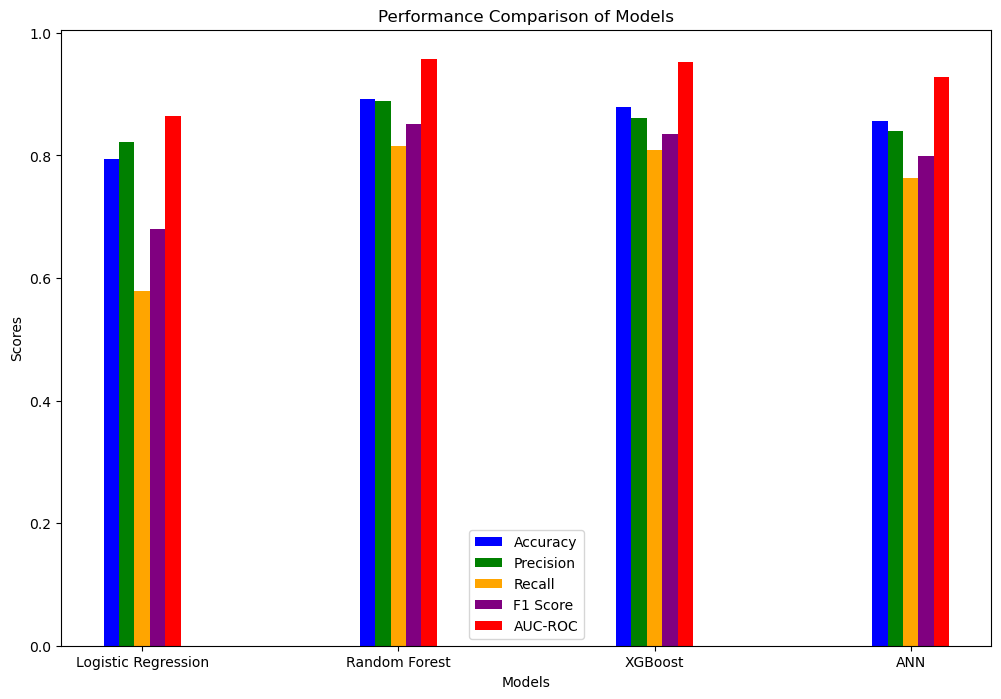

In [ ]:
# Define models and their corresponding performance metrics
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'ANN']
accuracy_scores = [0.7946, 0.8924, 0.8794, 0.8565]
precision_scores = [0.8214, 0.8885, 0.8613, 0.8402]
recall_scores = [0.5792, 0.8161, 0.8094, 0.7631]
f1_scores = [0.6793, 0.8507, 0.8345, 0.7998]
aucroc_scores = [0.8640, 0.9572, 0.9517, 0.9273]

# Define the width of each bar and the positions on the x-axis
bar_width = 0.15
x = np.arange(len(models))*2.5

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot bars for each metric
bars1 = ax.bar(x - 2*bar_width, accuracy_scores, bar_width, label='Accuracy', color='b')
bars2 = ax.bar(x - bar_width, precision_scores, bar_width, label='Precision', color='g')
bars3 = ax.bar(x, recall_scores, bar_width, label='Recall', color='orange')
bars4 = ax.bar(x + bar_width, f1_scores, bar_width, label='F1 Score', color='purple')
bars5 = ax.bar(x + 2*bar_width, aucroc_scores, bar_width, label='AUC-ROC', color='red')

# Set x-axis labels and ticks
ax.set_xticks(x)
ax.set_xticklabels(models)

# Set axis labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Models')

# Add legend
ax.legend()

# Display the plot
plt.show()

## Case 3:

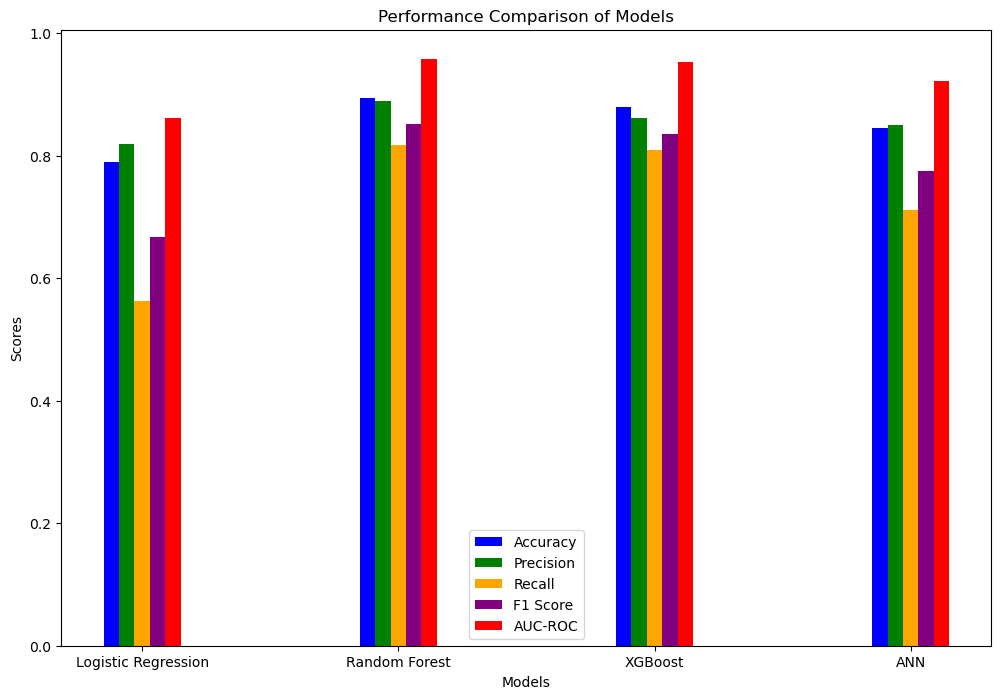

In [ ]:
# Define models and their corresponding performance metrics
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'ANN']
accuracy_scores = [0.7887, 0.8932, 0.8794, 0.8442]
precision_scores = [0.8185, 0.8896, 0.8610, 0.8495]
recall_scores = [0.5621, 0.8171, 0.8097, 0.7114]
f1_scores = [0.6665, 0.8518, 0.8346, 0.7743]
aucroc_scores = [0.8619, 0.9574, 0.9519, 0.9220]

# Define the width of each bar and the positions on the x-axis
bar_width = 0.15
x = np.arange(len(models))*2.5

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot bars for each metric
bars1 = ax.bar(x - 2*bar_width, accuracy_scores, bar_width, label='Accuracy', color='b')
bars2 = ax.bar(x - bar_width, precision_scores, bar_width, label='Precision', color='g')
bars3 = ax.bar(x, recall_scores, bar_width, label='Recall', color='orange')
bars4 = ax.bar(x + bar_width, f1_scores, bar_width, label='F1 Score', color='purple')
bars5 = ax.bar(x + 2*bar_width, aucroc_scores, bar_width, label='AUC-ROC', color='red')

# Set x-axis labels and ticks
ax.set_xticks(x)
ax.set_xticklabels(models)

# Set axis labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Models')

# Add legend
ax.legend()

# Display the plot
plt.show()

## Case 4:

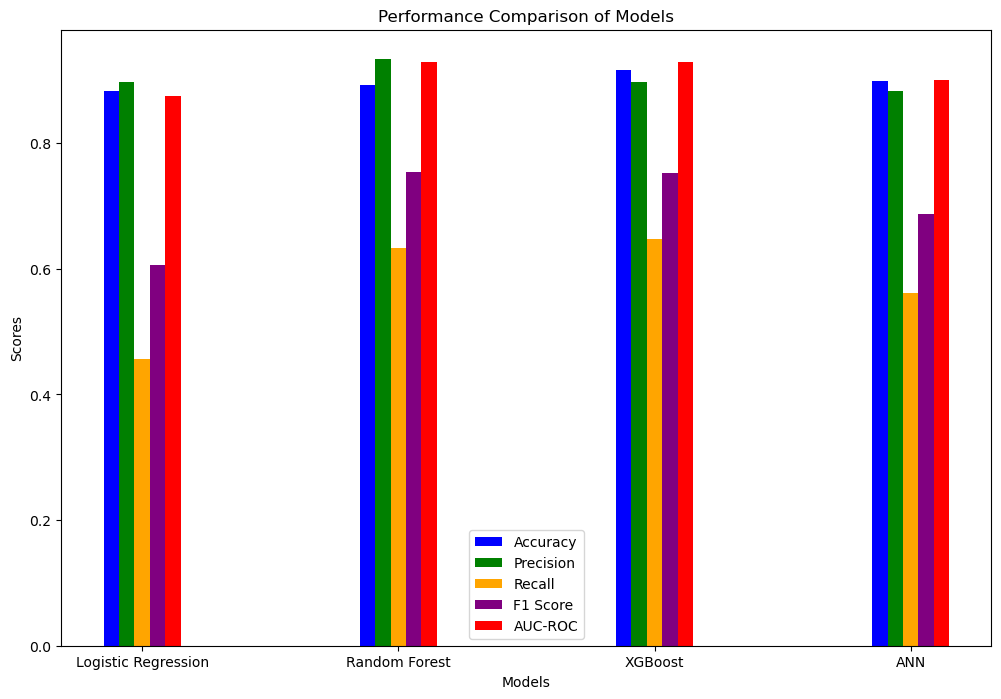

In [ ]:
# Define models and their corresponding performance metrics
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'ANN']
accuracy_scores = [0.8831, 0.89191, 0.9162, 0.8993]
precision_scores = [0.8971, 0.9337, 0.8964, 0.8824]
recall_scores = [0.4569, 0.6330, 0.6479, 0.5618]
f1_scores = [0.6055, 0.7545, 0.7522, 0.6865]
aucroc_scores = [0.8750, 0.9293, 0.9293, 0.9008]

# Define the width of each bar and the positions on the x-axis
bar_width = 0.15
x = np.arange(len(models))*2.5

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot bars for each metric
bars1 = ax.bar(x - 2*bar_width, accuracy_scores, bar_width, label='Accuracy', color='b')
bars2 = ax.bar(x - bar_width, precision_scores, bar_width, label='Precision', color='g')
bars3 = ax.bar(x, recall_scores, bar_width, label='Recall', color='orange')
bars4 = ax.bar(x + bar_width, f1_scores, bar_width, label='F1 Score', color='purple')
bars5 = ax.bar(x + 2*bar_width, aucroc_scores, bar_width, label='AUC-ROC', color='red')

# Set x-axis labels and ticks
ax.set_xticks(x)
ax.set_xticklabels(models)

# Set axis labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Models')

# Add legend
ax.legend()

# Display the plot
plt.show()

##  From the Model Analysis we conclude that

•   **Increasing Order of models performance based on accuracy and cost:-**
    **Logistic Regression -> Neural Networks(ANN) -> XG-Boost Classifier -> Random Forest Classifier**

##### • **The Random Forest Classifier model is performing the best among the four models based on the following considerations:**

   ##### -> **Highest F1 Score: 0.8518, indicating a good balance between precision and recall.**
   
   ##### -> **Highest Precision: 0.8896, showing the highest accuracy in predicting true positives.**
   
   ##### -> **High Recall: 0.8171, which is the second-highest recall score, indicating it captures a significant number of actual positives.**
   
   ##### -> **Highest ROC AUC Score: 0.9574, suggesting excellent discrimination capability between classes.**
   
   

•   **If we go by how accurate our model can predict whether the hotel booking is cancelled or not then Random Forest Model is the best one with accuracy(0.8932) and cost(148024517.8314) but if we also have to consider the cost required in our mind then we think that the XGBoost Classifier is a good one as it is having lowest cost(59626.0966) and also having an accuracy(0.8794) near to what Random Forest is giving.**


•   **Case - 3 dataset is the best dataset to be worked on and XG-Boost Classifier Model is the best Model as it is giving highest Accuracy(0.8794) in comparitively lower Cost(59626.0966).**


•   **Case - 4 dataset is giving the highest Accuracy(0.9191) but we cannot consider this as there is a huge information loss happening after dropping the missing values of company column.**

## Limitations Of Our Solution


*   **The confusion matrix is giving a very good True Negative(TN) value but not that good True Positive(TP) value for all our models. This means that our models are able to correctly classify the bookings which are not cancelled but it cannot correctly classify that much for the bookings which are cancelled. This is mainly because the is_cancelled feature is unbalanced i.e there are much less rows on is_cancelled equal to 1.**


*   **The company column has many missing values and it cannot be dropped as it is an important feature which is leading to lower accuracy for our models.**


## How we can improve our solution:-

*   **We can use some variations in our ANN architecture by increasing the number of hidden layers with a dropout of 0.2 in the final layer so that our model can capture more complex relationships and patterns within the data.**


*   **We can do Smote Analysis for the feature is_cancelled. This will make the column balanced and make our confusion matrix have good True Positive(TP) as well as True Negative(TN) values. This will help our model to more correctly classify the bookings that are not cancelled as well as the bookings that are cancelled.**

# Cancellation analysis on total of special requests feature.

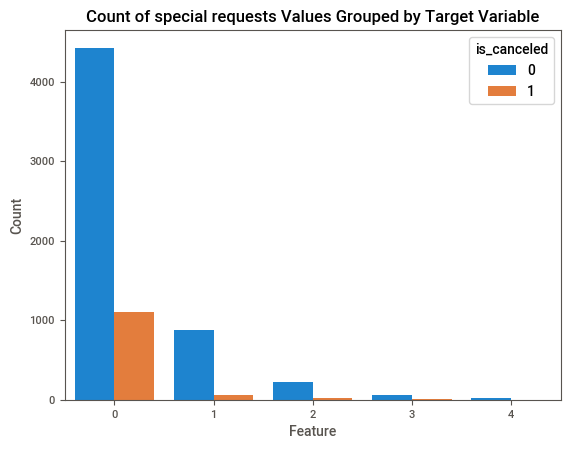

In [ ]:
sns.countplot(data=df, x='total_of_special_requests', hue='is_canceled')
plt.title('Count of special requests Values Grouped by Target Variable')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.show()

**Calculates and prints the cancellation rates for bookings with zero special requests and with one or more special requests, then computes and prints the difference in these cancellation rates. It does this by filtering the DataFrame for each condition, calculating the cancellation rates, and formatting the results as percentages.**

In [ ]:
def total_of_special_requests_analysis(df):
    no_special_requests = df[(df['total_of_special_requests'] == 0) & ((df['is_canceled'] == 0) | (df['is_canceled'] == 1))].shape[0]

    cancellation_no_special_requests = (df[(df['total_of_special_requests'] == 0) & (df['is_canceled'] == 1)].shape[0]) / no_special_requests
    print("Cancellation rate with zero special requests: {:.2f}%".format(cancellation_no_special_requests * 100))

    some_special_requests = df[(df['total_of_special_requests'] > 0) & ((df['is_canceled'] == 0) | (df['is_canceled'] == 1))].shape[0]

    cancellation_some_special_requests = (df[(df['total_of_special_requests'] > 0) & (df['is_canceled'] == 1)].shape[0]) / some_special_requests
    print("Cancellation rate with one or more special requests: {:.2f}%".format(cancellation_some_special_requests * 100))

    difference_in_cancellation_rate = cancellation_no_special_requests - cancellation_some_special_requests
    print("Difference in cancellation rate: {:.2f}%".format(difference_in_cancellation_rate * 100))


In [ ]:
total_of_special_requests_analysis(df)

Cancellation rate with zero special requests: 19.87%
Cancellation rate with one or more special requests: 7.32%
Difference in cancellation rate: 12.55%


**Therefore, we can see that hotel bookings with no special requests has higher
cancellation percent(19.87%) than booking with one or more special requests(7.32%).**

# Cancellation analysis on required car parking spaces feature.

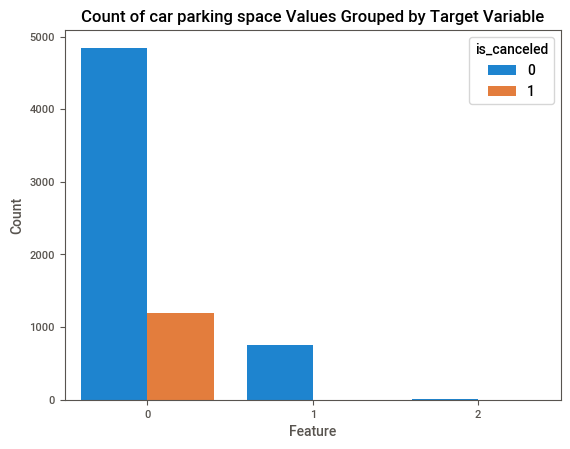

In [ ]:
sns.countplot(data=df, x='required_car_parking_spaces', hue='is_canceled')
plt.title('Count of car parking space Values Grouped by Target Variable')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.show()

**Calculates and prints the cancellation rates for bookings with zero required car parking spaces and those with one or more required parking spaces. It does this by filtering the DataFrame based on the number of required parking spaces and cancellation status, and then calculating and formatting the cancellation rates as percentages.**

In [ ]:
def required_car_parking_spaces_analysis(df):
    no_parking_spaces = df[(df['required_car_parking_spaces'] == 0) & ((df['is_canceled'] == 0) | (df['is_canceled'] == 1))].shape[0]

    cancellation_no_parking_spaces = (df[(df['required_car_parking_spaces'] == 0) & (df['is_canceled'] == 1)].shape[0]) / no_parking_spaces
    print("Cancellation rate with zero car parking spaces required: {:.2f}%".format(cancellation_no_parking_spaces * 100))

    some_parking_spaces = df[(df['required_car_parking_spaces'] > 0) & ((df['is_canceled'] == 0) | (df['is_canceled'] == 1))].shape[0]

    cancellation_some_parking_spaces = (df[(df['required_car_parking_spaces'] > 0) & (df['is_canceled'] == 1)].shape[0]) / some_parking_spaces
    print("Cancellation rate with one or more car parking spaces required: {:.2f}%".format(cancellation_some_parking_spaces * 100))

    difference_in_cancellation_rate = cancellation_no_parking_spaces - cancellation_some_parking_spaces
    print("Difference in cancellation rate: {:.2f}%".format(difference_in_cancellation_rate * 100))

In [ ]:
required_car_parking_spaces_analysis(df)

Cancellation rate with zero car parking spaces required: 19.73%
Cancellation rate with one or more car parking spaces required: 0.00%
Difference in cancellation rate: 19.73%


**Therefore we can see that hotel bookings with zero car parking spaces has higher cancellation rate(19.73%) than hotel bookings with one or more car parking spaces(0.00%).**

# Cancellation analysis on previous cancellations feature.

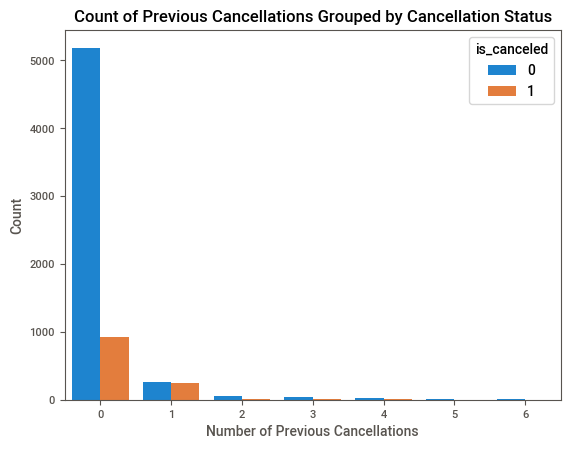

In [ ]:
sns.countplot(data=df, x='previous_cancellations', hue='is_canceled')
plt.title('Count of Previous Cancellations Grouped by Cancellation Status')
plt.xlabel('Number of Previous Cancellations')
plt.ylabel('Count')
plt.show()

**Calculates and prints the cancellation rates for bookings with zero previous cancellations versus those with one or more previous cancellations. It then computes and prints the increase in cancellation rate between these two groups by filtering the DataFrame based on previous cancellations and cancellation status.**

In [ ]:
def previous_cancellation_analysis(df):
    no_previous_cancellations = df[(df['previous_cancellations'] == 0) & ((df['is_canceled'] == 0) | (df['is_canceled'] == 1))].shape[0]

    cancellation_with_zero_previous_cancellations = (df[(df['previous_cancellations'] == 0) & (df['is_canceled'] == 1)].shape[0]) / no_previous_cancellations
    print("Cancellation with zero previous cancellations: {:.2f}%".format(cancellation_with_zero_previous_cancellations * 100))

    with_previous_cancellations = df[(df['previous_cancellations'] != 0) & ((df['is_canceled'] == 0) | (df['is_canceled'] == 1))].shape[0]

    cancellation_with_previous_cancellations = (df[(df['previous_cancellations'] != 0) & (df['is_canceled'] == 1)].shape[0]) / with_previous_cancellations
    print("Cancellation with previous cancellations: {:.2f}%".format(cancellation_with_previous_cancellations * 100))

    increase_in_cancellation_rate = cancellation_with_previous_cancellations - cancellation_with_zero_previous_cancellations
    print("Increase in cancellation rate: {:.2f}%".format(increase_in_cancellation_rate * 100))

In [ ]:
previous_cancellation_analysis(df)

Cancellation with zero previous cancellations: 15.09%
Cancellation with previous cancellations: 39.16%
Increase in cancellation rate: 24.07%


**Therefore, we can see that hotel bookings with previous cancellations has higher cancellation percent(39.16%) than booking with no previous cancellation(15.09%).**

# Cancellation analysis on lead time feature.

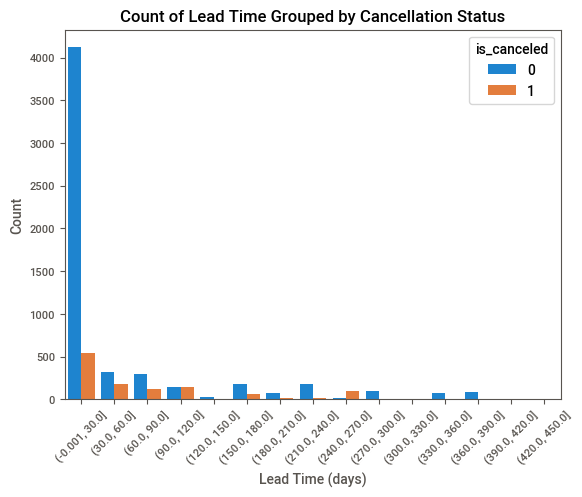

In [ ]:
lead_time_bins = pd.cut(df['lead_time'], bins=[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420, 450], include_lowest=True)
sns.countplot(data=df, x=lead_time_bins, hue='is_canceled')
plt.title('Count of Lead Time Grouped by Cancellation Status')
plt.xlabel('Lead Time (days)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


**Calculates and prints the cancellation rates for bookings with lead times shorter than 30 days versus those with lead times of 30 days or more. It then computes and prints the difference in cancellation rates between these two groups by filtering the DataFrame based on lead time and cancellation status.**

In [ ]:
def lead_time_analysis(df):
    threshold = 30

    short_lead_time = df[(df['lead_time'] < threshold) & ((df['is_canceled'] == 0) | (df['is_canceled'] == 1))].shape[0]

    cancellation_with_short_lead_time = (df[(df['lead_time'] < threshold) & (df['is_canceled'] == 1)].shape[0]) / short_lead_time
    print("Cancellation with lead time less than {} days: {:.2f}%".format(threshold, cancellation_with_short_lead_time * 100))

    long_lead_time = df[(df['lead_time'] >= threshold) & ((df['is_canceled'] == 0) | (df['is_canceled'] == 1))].shape[0]

    cancellation_with_long_lead_time = (df[(df['lead_time'] >= threshold) & (df['is_canceled'] == 1)].shape[0]) / long_lead_time
    print("Cancellation with lead time greater than or equal to {} days: {:.2f}%".format(threshold, cancellation_with_long_lead_time * 100))

    increase_in_cancellation_rate = cancellation_with_long_lead_time - cancellation_with_short_lead_time
    print("Difference in cancellation rate: {:.2f}%".format(increase_in_cancellation_rate * 100))


In [ ]:
lead_time_analysis(df)

Cancellation with lead time less than 30 days: 11.58%
Cancellation with lead time greater than or equal to 30 days: 30.29%
Difference in cancellation rate: 18.71%


**Therefore, we can see that hotel bookings with lead time greater than or equal to 30 days has higher cancellation percent(30.29%) than booking with lead time less than 30 days(11.58%).**

# Cancellation analysis on Booking changes feature.

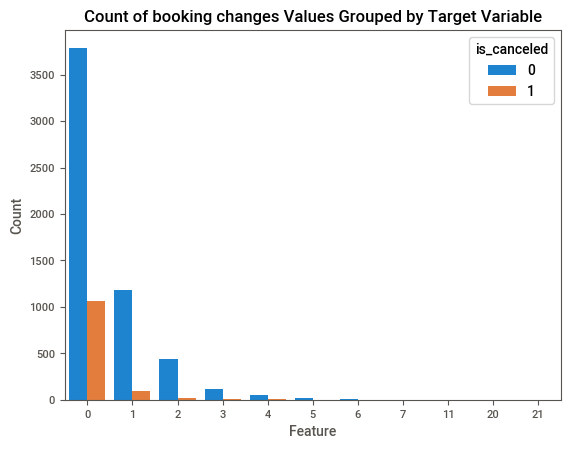

In [ ]:
sns.countplot(data=df, x='booking_changes', hue='is_canceled')
plt.title('Count of booking changes Values Grouped by Target Variable')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.show()

**Calculates and prints the cancellation rates for bookings with zero booking changes and those with non-zero booking changes. It then computes and prints the decrease in cancellation rates between these two groups by filtering the DataFrame based on booking changes and cancellation status.**

In [ ]:
def booking_changes_analysis(df):
  no_booking_changes = df[(df['booking_changes']==0) & ((df['is_canceled'] == 0) | (df['is_canceled'] == 1))].shape[0]
  cancellation_with_zero_booking_changes = (df[(df['booking_changes']==0) & (df['is_canceled'] == 1)].shape[0])/ (no_booking_changes)
  print("Cancellation with zero booking changes: {:.2f}%".format(cancellation_with_zero_booking_changes))

  with_booking_changes = df[(df['booking_changes']!=0) & ((df['is_canceled'] == 0) | (df['is_canceled'] == 1))].shape[0]
  cancellation_with_booking_changes =  (df[(df['booking_changes']!=0) & (df['is_canceled'] == 1)].shape[0])/ (with_booking_changes)
  print("Cancellation with non-zero booking changes: {:.2f}%".format(cancellation_with_booking_changes))

  decrease_in_cancellation_rate = cancellation_with_zero_booking_changes - cancellation_with_booking_changes
  print("Decrease in cancellation rate: {:.2f}%".format(decrease_in_cancellation_rate))

In [ ]:
booking_changes_analysis(df)

Cancellation with zero booking changes: 0.22%
Cancellation with non-zero booking changes: 0.06%
Decrease in cancellation rate: 0.15%


**Therefore, we can see that hotel bookings with no changes has higher cancellation percent(0.22%) than booking with changes(0.06%).**

# Cancellation analysis on agent feature.

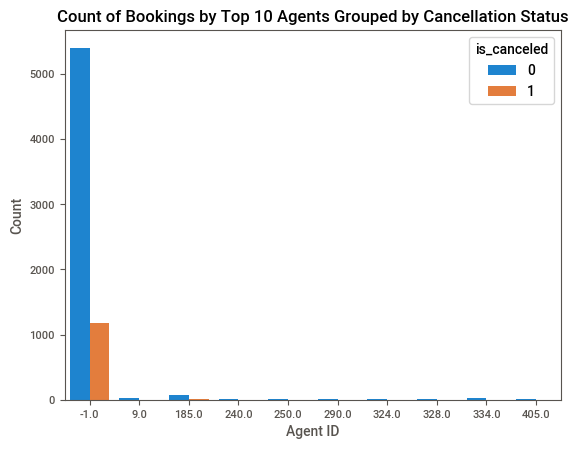

In [ ]:
top_10_agents = df['agent'].value_counts().nlargest(10).index
sns.countplot(data=df[df['agent'].isin(top_10_agents)], x='agent', hue='is_canceled')
plt.title('Count of Bookings by Top 10 Agents Grouped by Cancellation Status')
plt.xlabel('Agent ID')
plt.ylabel('Count')
plt.show()

**calculates and prints the cancellation rates for direct bookings (agent values -1 or 9) versus bookings made through agents (non-null, not 9). It then computes and prints the difference in cancellation rates between these two groups by filtering the DataFrame based on agent values and cancellation status.**

In [ ]:
def agent_analysis(df):
    direct_bookings = df[(df['agent']== -1) | (df['agent'] == 9) & ((df['is_canceled'] == 0) | (df['is_canceled'] == 1))].shape[0]

    cancellation_direct_bookings = (df[(df['agent']== -1) | (df['agent'] == 9) & (df['is_canceled'] == 1)].shape[0]) / direct_bookings
    print("Cancellation rate for direct bookings: {:.2f}%".format(cancellation_direct_bookings * 100))

    agent_bookings = df[(df['agent'].notnull()) & (df['agent'] != 9) & ((df['is_canceled'] == 0) | (df['is_canceled'] == 1))].shape[0]

    cancellation_agent_bookings = (df[(df['agent'].notnull()) & (df['agent'] != 9) & (df['is_canceled'] == 1)].shape[0]) / agent_bookings
    print("Cancellation rate for agent bookings: {:.2f}%".format(cancellation_agent_bookings * 100))

    difference_in_cancellation_rate =  cancellation_direct_bookings - cancellation_agent_bookings
    print("Difference in cancellation rate: {:.2f}%".format(difference_in_cancellation_rate * 100))

In [ ]:
agent_analysis(df)

Cancellation rate for direct bookings: 99.61%
Cancellation rate for agent bookings: 17.58%
Difference in cancellation rate: 82.03%


**Therefore, we can see that hotel bookings done directly has higher cancellation percent(99.61%) than booking done by agent(17.58%).**

# Cancellation analysis on arrival date month feature

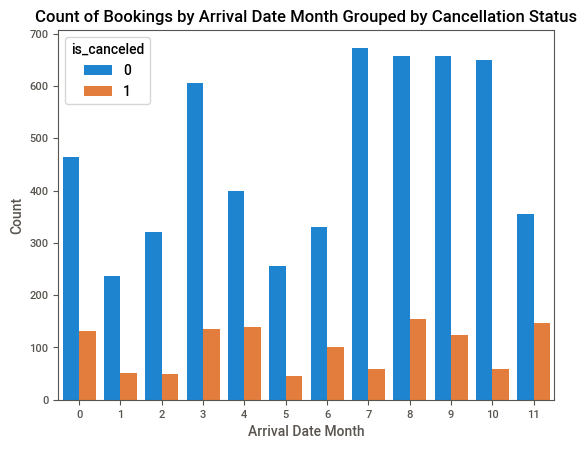

In [ ]:
#arrival_date_month_columns = [col for col in df.columns if col.startswith('arrival_date_month_')]
#df['arrival_date_month'] = df[arrival_date_month_columns].idxmax(axis=1)
#df['arrival_date_month'] = df['arrival_date_month'].str.replace('arrival_date_month_', '')

sns.countplot(data=df, x='arrival_date_month', hue='is_canceled')
plt.title('Count of Bookings by Arrival Date Month Grouped by Cancellation Status')
plt.xlabel('Arrival Date Month')
plt.ylabel('Count')
#plt.xticks(rotation=45)
plt.show()

**calculates and prints the cancellation rates for each month by iterating through unique months in the 'arrival_date_month' column, computing the total bookings and cancellations, and then calculating the cancellation rate as a percentage.**

In [ ]:
def arrival_date_month_analysis(df):
   # arrival_date_month_columns = [col for col in df.columns if col.startswith('arrival_date_month_')]
    #df['arrival_date_month'] = df[arrival_date_month_columns].idxmax(axis=1)
    #df['arrival_date_month'] = df['arrival_date_month'].str.replace('arrival_date_month_', '')

    months = df['arrival_date_month'].unique()

    for month in months:
        total_bookings = df[(df['arrival_date_month'] == month) & ((df['is_canceled'] == 0) | (df['is_canceled'] == 1))].shape[0]
        cancellations = df[(df['arrival_date_month'] == month) & (df['is_canceled'] == 1)].shape[0]
        cancellation_rate = (cancellations / total_bookings) * 100

        print(f"Month: {month}")
        print(f"Total Bookings: {total_bookings}")
        print(f"Cancellations: {cancellations}")
        print(f"Cancellation Rate: {cancellation_rate:.2f}%\n")

In [ ]:
arrival_date_month_analysis(df)

Month: 5
Total Bookings: 300
Cancellations: 45
Cancellation Rate: 15.00%

Month: 1
Total Bookings: 288
Cancellations: 51
Cancellation Rate: 17.71%

Month: 11
Total Bookings: 501
Cancellations: 146
Cancellation Rate: 29.14%

Month: 10
Total Bookings: 707
Cancellations: 58
Cancellation Rate: 8.20%

Month: 9
Total Bookings: 781
Cancellations: 124
Cancellation Rate: 15.88%

Month: 4
Total Bookings: 539
Cancellations: 139
Cancellation Rate: 25.79%

Month: 3
Total Bookings: 741
Cancellations: 135
Cancellation Rate: 18.22%

Month: 7
Total Bookings: 731
Cancellations: 58
Cancellation Rate: 7.93%

Month: 0
Total Bookings: 596
Cancellations: 131
Cancellation Rate: 21.98%

Month: 8
Total Bookings: 812
Cancellations: 155
Cancellation Rate: 19.09%

Month: 6
Total Bookings: 431
Cancellations: 100
Cancellation Rate: 23.20%

Month: 2
Total Bookings: 370
Cancellations: 49
Cancellation Rate: 13.24%



**Therefore we can see that the month of December has highest cancellation rate (29.14%) and the month of August has lowest cancellation rate(7.93%)**

# Cancellation analysis on Country Column


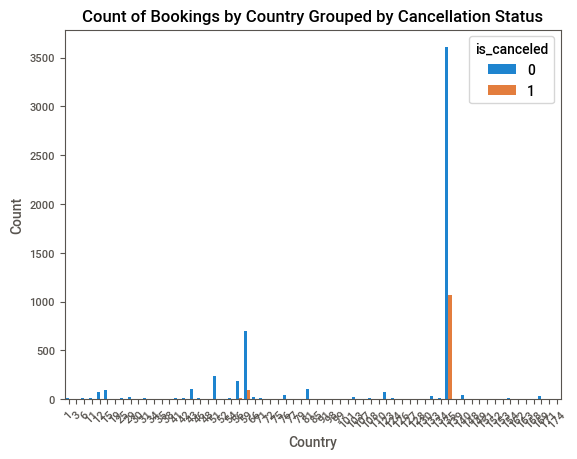

In [ ]:

sns.countplot(data=df, x='country', hue='is_canceled')
plt.title('Count of Bookings by Country Grouped by Cancellation Status')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**calculates and prints the cancellation rates for each country by iterating
through unique countries in the 'country' column, computing the total bookings and cancellations, and then calculating the cancellation rate as a percentage.**:

In [ ]:
def country_analysis(df):

    countries = df['country'].unique()

    for country in countries:
        total_bookings = df[(df['country'] == country) & ((df['is_canceled'] == 0) | (df['is_canceled'] == 1))].shape[0]
        cancellations = df[(df['country'] == country) & (df['is_canceled'] == 1)].shape[0]
        cancellation_rate = (cancellations / total_bookings) * 100

        print(f"Country: {country}")
        print(f"Total Bookings: {total_bookings}")
        print(f"Cancellations: {cancellations}")
        print(f"Cancellation Rate: {cancellation_rate:.2f}%\n")

In [ ]:
country_analysis(df)

Country: 56
Total Bookings: 194
Cancellations: 13
Cancellation Rate: 6.70%

Country: 135
Total Bookings: 4679
Cancellations: 1071
Cancellation Rate: 22.89%

Country: 29
Total Bookings: 21
Cancellations: 0
Cancellation Rate: 0.00%

Country: 76
Total Bookings: 39
Cancellations: 0
Cancellation Rate: 0.00%

Country: 81
Total Bookings: 108
Cancellations: 2
Cancellation Rate: 1.85%

Country: 148
Total Bookings: 1
Cancellations: 0
Cancellation Rate: 0.00%

Country: 59
Total Bookings: 794
Cancellations: 92
Cancellation Rate: 11.59%

Country: 43
Total Bookings: 104
Cancellations: 0
Cancellation Rate: 0.00%

Country: 12
Total Bookings: 72
Cancellations: 2
Cancellation Rate: 2.78%

Country: 51
Total Bookings: 237
Cancellations: 3
Cancellation Rate: 1.27%

Country: 15
Total Bookings: 91
Cancellations: 2
Cancellation Rate: 2.20%

Country: 42
Total Bookings: 13
Cancellations: 0
Cancellation Rate: 0.00%

Country: 123
Total Bookings: 72
Cancellations: 1
Cancellation Rate: 1.39%

Country: 133
Total Boo

**Therefore we can see that the encoded country 135 have the highest cancellation rate(22.89%) and the encoded countries 130, 77, 128, 72, 163, 98, 108, 101, 99, 379, 152, 110, 52 have the lowest cancellation rates(0.00%)**

# Cancellation analysis on market segment feature

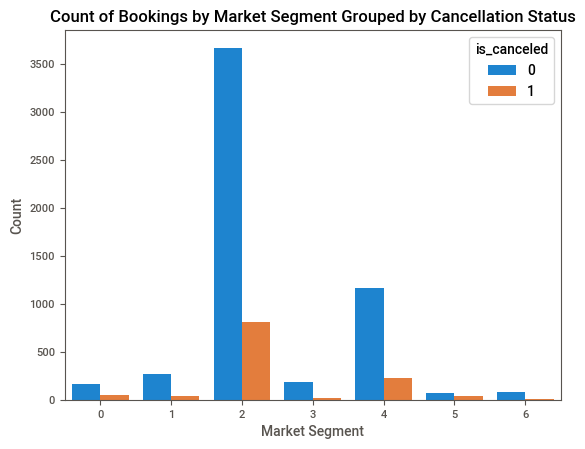

In [ ]:
def market_segment_analysis(df):


    sns.countplot(data=df, x='market_segment', hue='is_canceled')
    plt.title('Count of Bookings by Market Segment Grouped by Cancellation Status')
    plt.xlabel('Market Segment')
    plt.ylabel('Count')
    #plt.xticks(rotation=45)
    plt.show()
market_segment_analysis(df)

**calculates and prints the cancellation rates for each market segment by iterating through unique segments in the 'market_segment' column, computing the total bookings and cancellations, and then calculating the cancellation rate as a percentage. It then calls this function with the DataFrame df.**

In [ ]:
def market_segment_analysis(df):

    segments = df['market_segment'].unique()

    for segment in segments:
        total_bookings = df[(df['market_segment'] == segment) & ((df['is_canceled'] == 0) | (df['is_canceled'] == 1))].shape[0]
        cancellations = df[(df['market_segment'] == segment) & (df['is_canceled'] == 1)].shape[0]
        cancellation_rate = (cancellations / total_bookings) * 100

        print(f"Market Segment: {segment}")
        print(f"Total Bookings: {total_bookings}")
        print(f"Cancellations: {cancellations}")
        print(f"Cancellation Rate: {cancellation_rate:.2f}%\n")

market_segment_analysis(df)

Market Segment: 2
Total Bookings: 4471
Cancellations: 805
Cancellation Rate: 18.00%

Market Segment: 3
Total Bookings: 208
Cancellations: 22
Cancellation Rate: 10.58%

Market Segment: 6
Total Bookings: 96
Cancellations: 12
Cancellation Rate: 12.50%

Market Segment: 4
Total Bookings: 1391
Cancellations: 227
Cancellation Rate: 16.32%

Market Segment: 5
Total Bookings: 106
Cancellations: 36
Cancellation Rate: 33.96%

Market Segment: 1
Total Bookings: 313
Cancellations: 43
Cancellation Rate: 13.74%

Market Segment: 0
Total Bookings: 212
Cancellations: 46
Cancellation Rate: 21.70%



**Therefore we can see that encoded the market segment 5 has highest cancellation rate(33.96%) and the encoded market segment 3 has lowest cancellation rate(10.58%)**

# Cancellation analysis on assigned room type

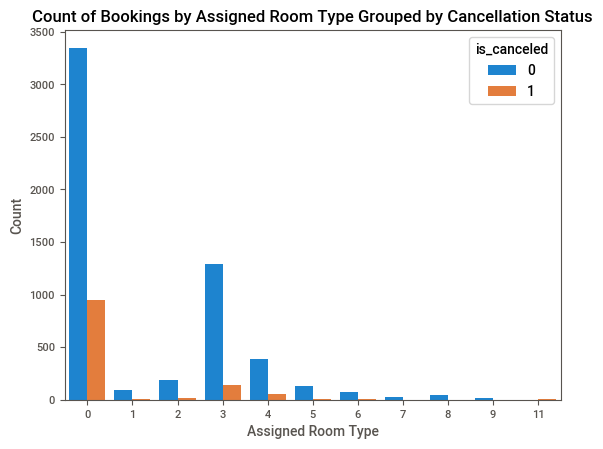

In [ ]:
def assigned_room_type_analysis(df):


    sns.countplot(data=df, x='assigned_room_type', hue='is_canceled')
    plt.title('Count of Bookings by Assigned Room Type Grouped by Cancellation Status')
    plt.xlabel('Assigned Room Type')
    plt.ylabel('Count')
    #plt.xticks(rotation=45)
    plt.show()

assigned_room_type_analysis(df)

**calculates and prints the cancellation rates for each assigned room type by iterating through unique room types in the 'assigned_room_type' column, computing the total bookings and cancellations, and then calculating the cancellation rate as a percentage. It then calls this function with the DataFrame df.**

In [ ]:
def assigned_room_type_analysis(df):

    room_types = df['assigned_room_type'].unique()

    for room_type in room_types:
        total_bookings = df[(df['assigned_room_type'] == room_type) & ((df['is_canceled'] == 0) | (df['is_canceled'] == 1))].shape[0]
        cancellations = df[(df['assigned_room_type'] == room_type) & (df['is_canceled'] == 1)].shape[0]
        cancellation_rate = (cancellations / total_bookings) * 100

        print(f"Room Type: {room_type}")
        print(f"Total Bookings: {total_bookings}")
        print(f"Cancellations: {cancellations}")
        print(f"Cancellation Rate: {cancellation_rate:.2f}%\n")

assigned_room_type_analysis(df)

Room Type: 6
Total Bookings: 81
Cancellations: 4
Cancellation Rate: 4.94%

Room Type: 0
Total Bookings: 4297
Cancellations: 949
Cancellation Rate: 22.09%

Room Type: 5
Total Bookings: 139
Cancellations: 10
Cancellation Rate: 7.19%

Room Type: 4
Total Bookings: 443
Cancellations: 52
Cancellation Rate: 11.74%

Room Type: 3
Total Bookings: 1426
Cancellations: 138
Cancellation Rate: 9.68%

Room Type: 2
Total Bookings: 207
Cancellations: 18
Cancellation Rate: 8.70%

Room Type: 7
Total Bookings: 28
Cancellations: 0
Cancellation Rate: 0.00%

Room Type: 8
Total Bookings: 47
Cancellations: 1
Cancellation Rate: 2.13%

Room Type: 11
Total Bookings: 10
Cancellations: 10
Cancellation Rate: 100.00%

Room Type: 1
Total Bookings: 98
Cancellations: 8
Cancellation Rate: 8.16%

Room Type: 9
Total Bookings: 21
Cancellations: 1
Cancellation Rate: 4.76%



**Therefore we can see that the encoded room type 11 has highest cancellation rate(100.00%) and the encoded room type 7 has lowest cancellation rate(0.00%)**

# Cancellation analysis on encoded deposit type

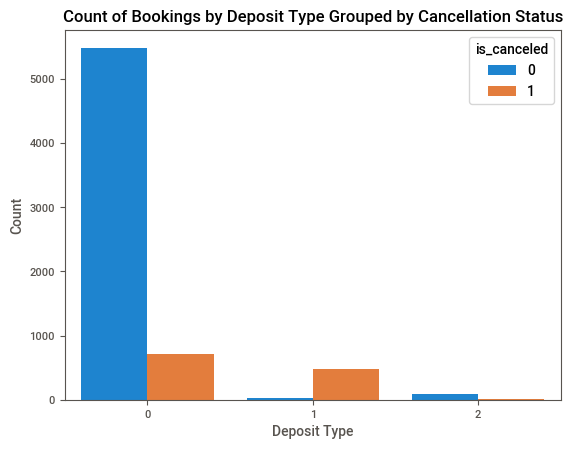

In [ ]:
def plot_encoded_deposit_type(df):

    sns.countplot(data=df, x='deposit_type', hue='is_canceled')
    plt.title('Count of Bookings by Deposit Type Grouped by Cancellation Status')
    plt.xlabel('Deposit Type')
    plt.ylabel('Count')
    #plt.xticks(rotation=45)
    plt.show()

# Run the plot function
plot_encoded_deposit_type(df)

**calculates and prints the cancellation rates for each deposit type by iterating through unique deposit types in the 'deposit_type' column, computing the total bookings and cancellations, and then calculating the cancellation rate as a percentage. It then calls this function with the DataFrame df.**

In [ ]:
def deposit_type_analysis(df):


    deposit_types = df['deposit_type'].unique()

    for deposit_type in deposit_types:
        total_bookings = df[(df['deposit_type'] == deposit_type) & ((df['is_canceled'] == 0) | (df['is_canceled'] == 1))].shape[0]
        cancellations = df[(df['deposit_type'] == deposit_type) & (df['is_canceled'] == 1)].shape[0]
        cancellation_rate = (cancellations / total_bookings) * 100

        print(f"Deposit Type: {deposit_type}")
        print(f"Total Bookings: {total_bookings}")
        print(f"Cancellations: {cancellations}")
        print(f"Cancellation Rate: {cancellation_rate:.2f}%\n")

deposit_type_analysis(df)

Deposit Type: 0
Total Bookings: 6196
Cancellations: 706
Cancellation Rate: 11.39%

Deposit Type: 2
Total Bookings: 95
Cancellations: 12
Cancellation Rate: 12.63%

Deposit Type: 1
Total Bookings: 506
Cancellations: 473
Cancellation Rate: 93.48%



**Therefore we can see that the hotel bookings with encoded deposit type 1
has highest cancellation rate(93.48%) and hotel bookings with encoded deposit type 0 has lowest cancellation rate(11.39%)**

# Cancellation analysis on customer type feature

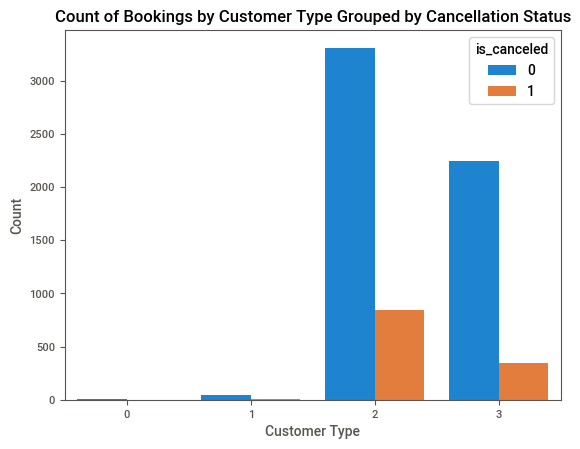

In [ ]:
def customer_type_analysis(df):

    sns.countplot(data=df, x='customer_type', hue='is_canceled')
    plt.title('Count of Bookings by Customer Type Grouped by Cancellation Status')
    plt.xlabel('Customer Type')
    plt.ylabel('Count')
    #plt.xticks(rotation=45)
    plt.show()

customer_type_analysis(df)

**calculates and prints the cancellation rates for each customer type by iterating through unique customer types in the 'customer_type' column, computing the total bookings and cancellations, and then calculating the cancellation rate as a percentage. It then calls this function with the DataFrame df.**

In [ ]:
def customer_type_analysis(df):

    customer_types = df['customer_type'].unique()

    for customer_type in customer_types:
        total_bookings = df[(df['customer_type'] == customer_type) & ((df['is_canceled'] == 0) | (df['is_canceled'] == 1))].shape[0]
        cancellations = df[(df['customer_type'] == customer_type) & (df['is_canceled'] == 1)].shape[0]
        cancellation_rate = (cancellations / total_bookings) * 100

        print(f"Customer Type: {customer_type}")
        print(f"Total Bookings: {total_bookings}")
        print(f"Cancellations: {cancellations}")
        print(f"Cancellation Rate: {cancellation_rate:.2f}%\n")

customer_type_analysis(df)

Customer Type: 2
Total Bookings: 4152
Cancellations: 841
Cancellation Rate: 20.26%

Customer Type: 1
Total Bookings: 49
Cancellations: 4
Cancellation Rate: 8.16%

Customer Type: 3
Total Bookings: 2591
Cancellations: 346
Cancellation Rate: 13.35%

Customer Type: 0
Total Bookings: 5
Cancellations: 0
Cancellation Rate: 0.00%



**Therefore we can see that the encoded customer type 2 has highest cancellation rate(20.26%) and encoded customer type 0 has lowest cancellation rate(0.00%).**

# Deployment of the Project

In [ ]:
# Define the S3 prefix and output path for logistic regression
prefix = 'logistic-regression-as-a-built-in-algo'
output_path = 's3://{}/{}/output'.format(bucket_name, prefix)

# Print the output path to verify
print(output_path)

s3://hotel-cancellation-prediction/logistic-regression-as-a-built-in-algo/output


In [ ]:
# this line automatically looks for the Logistic Regression image URI and builds an Logistic Regression container.
# specify the repo_version depending on your preference.
container = get_image_uri(boto3.Session().region_name,
                          'linear-learner',
                          repo_version='1.0-1')

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.0-1.


In [ ]:
hyperparameters = {
    "predictor_type": "binary_classifier",  # Type of prediction (binary classification)
    "epochs": "10",                         # Number of training epochs
    "mini_batch_size": "128",               # Mini-batch size for training
    "learning_rate": "0.01",                # Learning rate
    "l1": "0.0001",                        # L1 regularization strength
    "l2": "0.0001",                        # L2 regularization strength
    "optimizer": "auto",                   # Optimization algorithm
    "early_stopping": "true",              # Enable early stopping
    "early_stopping_patience": "5",        # Number of epochs to wait for improvement before stopping
    "eval_metric": "auc"                   # Evaluation metric
}

In [ ]:
# Create the Estimator
estimator = Estimator(image_uri=container,
                      hyperparameters=hyperparameters,
                      role=get_execution_role(),
                      train_instance_count=1,
                      train_instance_type='ml.t3.xlarge',
                      train_volume_size=5, # 5 GB
                      output_path=output_path,
                      train_use_spot_instances=True,
                      train_max_run=300,
                      train_max_wait=600,
                      base_job_name='logistic-regression-job')

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_max_run has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_use_spot_instances has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_max_wait has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_volume_size has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [ ]:
# Assuming you have defined bucket_name and prefix correctly
s3_input_train = TrainingInput(s3_data=f's3://{bucket_name}/{prefix}/train', content_type='csv')

# Fit the estimator using only the training data
estimator.fit({'train': s3_input_train})

INFO:sagemaker:Creating training-job with name: logistic-regression-job-2024-08-31-14-31-57-135


ResourceLimitExceeded: An error occurred (ResourceLimitExceeded) when calling the CreateTrainingJob operation: The account-level service limit 'ml.t3.xlarge for spot training job usage' is 0 Instances, with current utilization of 0 Instances and a request delta of 1 Instances. Please use AWS Service Quotas to request an increase for this quota. If AWS Service Quotas is not available, contact AWS support to request an increase for this quota.

In [ ]:
# set an output path where the trained model will be saved
prefix = 'xgboost-as-a-built-in-algo'
output_path ='s3://{}/{}/output'.format(bucket_name, prefix)
print(output_path)

s3://hotel-cancellation-prediction/xgboost-as-a-built-in-algo/output


In [ ]:
# this line automatically looks for the XGBoost image URI and builds an XGBoost container.
# specify the repo_version depending on your preference.
container = get_image_uri(boto3.Session().region_name,
                          'xgboost',
                          repo_version='1.0-1')

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker.image_uris:Defaulting to only available Python version: py3
INFO:sagemaker.image_uris:Defaulting to only supported image scope: cpu.


In [ ]:
hyperparameters = {
    "max_depth": "5",           # Maximum depth of a tree
    "eta": "0.1",               # Learning rate
    "gamma": "0",               # Minimum loss reduction required to make a further partition on a leaf node of the tree
    "min_child_weight": "1",    # Minimum sum of instance weight (hessian) needed in a child
    "subsample": "0.8",         # Subsample ratio of the training instances
    "colsample_bytree": "0.8",  # Subsample ratio of columns when constructing each tree
    "objective": "binary:logistic", # Binary classification objective
    "num_round": "100",         # Number of boosting rounds
    "scale_pos_weight": "1",    # Control balance of positive and negative weights, useful for unbalanced classes
    "eval_metric": "auc"        # Evaluation metric for validation data
}


In [ ]:
estimator = sagemaker.estimator.Estimator(image_uri=container,
                                          role=sagemaker.get_execution_role(),
                                          instance_count=1,
                                          instance_type='ml.t3.xlarge',
                                          volume_size=5, # 5 GB
                                          output_path=output_path,
                                          use_spot_instances=True,
                                          max_run=300,
                                          max_wait=600)

In [ ]:
# Assuming you have defined bucket_name and prefix correctly
s3_input_train = TrainingInput(s3_data=f's3://{bucket_name}/{prefix}/train', content_type='csv')

# Fit the estimator using only the training data
estimator.fit({'train': s3_input_train})

INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2024-08-31-14-32-12-671


ResourceLimitExceeded: An error occurred (ResourceLimitExceeded) when calling the CreateTrainingJob operation: The account-level service limit 'ml.t3.xlarge for spot training job usage' is 0 Instances, with current utilization of 0 Instances and a request delta of 1 Instances. Please use AWS Service Quotas to request an increase for this quota. If AWS Service Quotas is not available, contact AWS support to request an increase for this quota.

# Future Scope:-


*   **Real-Time Predictions: Implementing real-time prediction systems that can immediately assess the likelihood of cancellation as bookings are made, allowing for dynamic adjustments in pricing, promotions, and availability.**

*   **Personalized Customer Experience: Using the insights from cancellation predictions to personalize marketing strategies, offer customized deals, or provide targeted customer service to reduce cancellation rates and improve customer satisfaction.**


*   **Integration with Revenue Management Systems: Integrating the cancellation prediction model with hotel revenue management systems to optimize room pricing, overbooking strategies, and resource allocation based on predicted cancellation probabilities.**

*   **Expansion to Other Industries: Adapting the model for use in other industries where booking and cancellations are prevalent, such as airlines, car rentals, or event management, to improve operational efficiency and customer retention.**


*   **Ethical and Responsible AI: Ensuring the prediction model is developed with fairness, transparency, and bias mitigation in mind, potentially leading to research in explainable AI and the ethical implications of predictive modeling in the hospitality industry.**